In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm

In [4]:
#Dataset with 179 partcipants

Demographic_Clinical_Structural_Functional_T2 = pd.read_excel('/Users/eastvillage/Desktop/Tapasi/Model/Prediction of T2 scores/Functional_MRI/Demographic_Clinical_Structural_Functional_T2.xlsx')


In [5]:
Demographic_Clinical_Structural_Functional_T2

src_subject_id  Interview Age for T1  Female  \
0         BANDA001                   184       1   
1         BANDA002                   169       1   
2         BANDA003                   177       0   
3         BANDA004                   188       0   
4         BANDA005                   191       0   
..             ...                   ...     ...   
173       BANDA206                   192       1   
174       BANDA207                   176       0   
175       BANDA208                   169       0   
176       BANDA210                   193       0   
177       BANDA211                   196       1   

     Major Depression Total Score for T1  Social Phobia Total Score for T1  \
0                                      3                                19   
1                                      2                                 8   
2                                      1                                 3   
3                                      7                                11   
4                                      3                                 0   
..                                   ...                               ...   
173                                   18                                20   
174                                    2                                 4   
175                                    0                                 0   
176                                    5                                11   
177                                   16                                15   

     Panic Disorder Total Score for T1  Separation Anxiety Total Score for T1  \
0                                    1                                      2   
1                                    4                                      0   
2                                    0                                      0   
3                                    2                                      0   
4                                    0                                      0   
..                                 ...                                    ...   
173                                 10                                      6   
174                                  2                                      3   
175                                  0                                      0   
176                                  6                                      7   
177                                  9                                      3   

     Generalized Anxiety Total Score for T1  \
0                                         2   
1                                         1   
2                                         0   
3                                         1   
4                                         1   
..                                      ...   
173                                      10   
174                                       1   
175                                       0   
176                                       5   
177                                       9   

     Obsessive_Compulsive Total Score for T1  Total Anxiety Score for T1  ...  \
0                                          0                          24  ...   
1                                          1                          14  ...   
2                                          0                           3  ...   
3                                          3                          17  ...   
4                                          0                           1  ...   
..                                       ...                         ...  ...   
173                                        4                          50  ...   
174                                        0                          10  ...   
175                                        0                           0  ...   
176                                        1                          30  ...   
177          

In [23]:
Demographic_Clinical_Structural_Functional_T2.iloc[:,range(31,99)].values.shape

(178, 68)

In [5]:
#In Progress:Functional (TOGETHER)

def Modeling(dataset,r):
    
    predicting = int(input("Enter 1 to predict 'Major Depression Total Score for T2' or \n  Enter 2 to predict 'Total Anxiety Score for T2'."))
    print("\n")
    #Defining target
    
    if predicting == 1:
        
        df_target = np.array(dataset['Major Depression Total Score for T2'])
        
    else:
        
        df_target = np.array(dataset['Total Anxiety Score for T2'])
        
    #Collating Features (Predictors)
    print("\n")
    input_str = input("Enter a comma-separated list of predictors: \n Enter 1 for 'Interview Age for T1'.\n Enter 2 for 'Sex'.\n Enter 11 for 'Interview Age for T2'.\n Enter 3 for 'Major Depression Total Score for T1'.\n Enter 4 for 'Social Phobia Total Score for T1'.\n Enter 9 for 'Total Anxiety Score for T1'.\n Enter 20 for 'Estimated Total Intra-Cranial Volume'.\n Enter 21 for 'Left-Thalamus-Proper Volume'.\n Enter 22 for 'Right-Thalamus-Proper Volume'.\n Enter 23 for 'Left-Putamen Volume'.\n Enter 24 for 'Right-Putamen Volume'.\n Enter 25 for 'Left-Caudate Volume'.\n Enter 26 for 'Right-Caudate Volume'.\n Enter 27 for 'Left-Accumbens-area Volume'.\n Enter 28 for 'Right-Accumbens-area Volume'.\n Enter 29 for 'Left-Amygdala Volume'.\n Enter 30 for 'Right-Amygdala Volume'.\n")
    print("\n")
    print("INPUTS FOR FUNCTIONAL MRI DATA:")
    print("\n")
    func_str = input("Enter N to exclude functional MRI data or \n  Enter C to include cortical functional MRI data or \n Enter S to include subcortical functional MRI data or \n Enter B to include both cortical and subcortical data.")
    
    input_list = input_str.split(",")
    input_columns = [int(x) for x in input_list]

    input_columns = np.array(input_columns)
    
    if predicting == 1:
        
        Model_Label = 'Predicting Major Depression Total Score for T2 using:'
        
    else:
        
        Model_Label = 'Predicting Total Anxiety Score for T2 using'
        
    for i in input_columns:
        
        Model_Label = Model_Label + dataset.columns[i] + ','
        
    if func_str == 'C':
        
        Model_Label = Model_Label + ' Cortical functional data'
        
    elif func_str == 'S':
        
        Model_Label = Model_Label + ' Subcortical functional data'
        
    elif func_str == 'B':
        
        Model_Label = Model_Label + ' Cortical and Subcortical functional data'
        
    print("\033[1;30;48m\033[2J \033[1;32;48m",   Model_Label   ,"\033[0m")
    
    print("\n")
        
    df_data_demographic_clinical = np.array(dataset.iloc[:,input_columns[input_columns<12]].values) #demographic_clinical features
    df_data_structural = np.array(dataset.iloc[:,input_columns[input_columns>19]].values) #structural features
    
    #functional features
    if func_str == 'C':
        
        df_data_functional = np.array(dataset.iloc[:,range(31,99)].values) #cortical features
        func_columns = np.array(range(31,99))
        
    elif func_str == 'S':
        
        df_data_functional = np.array(dataset.iloc[:,range(99,157)].values) #subcortical features
        func_columns = np.array(range(99,157))
        
    elif func_str == 'B':
        
        df_data_functional = np.array(dataset.iloc[:,range(31,157)].values) #cortical and subcortical features
        func_columns = np.array(range(31,157))
        
    if func_str != 'N': #if functional predictors are entered
        
        df_data = np.concatenate((df_data_demographic_clinical , df_data_structural, df_data_functional), axis = 1)
        
    else:
        
        df_data = np.concatenate((df_data_demographic_clinical , df_data_structural), axis = 1)
    
    #Test-Train Split after merging Clinical_Demographic, Structural, Functional data
    train_data, test_data, train_lbl, test_lbl = train_test_split(df_data, df_target, test_size=1/5, random_state=r)
    
    #Separating Clinical_Demographic, Structural, Functional data for scaling and PCA
    train_data_demographic_clinical = train_data[:, 0:df_data_demographic_clinical.shape[1]]
    test_data_demographic_clinical = test_data[:, 0:df_data_demographic_clinical.shape[1]]

    train_data_structural = train_data[:, df_data_demographic_clinical.shape[1]:df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]]
    test_data_structural = test_data[:, df_data_demographic_clinical.shape[1]:df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]]

    if func_str != 'N': #if functional predictors are entered
        train_data_functional = train_data[:, df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]:]
        test_data_functional = test_data[:, df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]:]
    
    #Feature Scaling
    train_data_demographic_clinical = StandardScaler().fit_transform(train_data_demographic_clinical)
    test_data_demographic_clinical = StandardScaler().fit_transform(test_data_demographic_clinical)
    
    if any(i > 19 for i in input_columns): #if structural predictors are entered
        
        train_data_structural = StandardScaler().fit_transform(train_data_structural)
        test_data_structural = StandardScaler().fit_transform(test_data_structural)
        
    if func_str != 'N': #if functional predictors are entered
        
        train_data_functional = StandardScaler().fit_transform(train_data_functional)
        test_data_functional = StandardScaler().fit_transform(test_data_functional)
        
        #Merging structural and functional test and train data before PCA  
        train_data_structural_functional = np.concatenate((train_data_structural, train_data_functional), axis = 1)
        test_data_structural_functional = np.concatenate((test_data_structural, test_data_functional), axis = 1)
        
        str_fun_columns = np.concatenate((input_columns[input_columns>19], func_columns))
        col = dataset.columns[str_fun_columns]
        col_function = dataset.columns[func_columns]
        
    else:
        
        train_data_structural_functional = train_data_structural
        test_data_structural_functional = test_data_structural
        
        col = dataset.columns[input_columns[input_columns>19]]

    print("\n")
    
    #Merging Clinical, Demographic, and Structural data to get final train and test data
    train_data = np.concatenate((train_data_demographic_clinical , train_data_structural_functional), axis = 1)
    test_data = np.concatenate((test_data_demographic_clinical , test_data_structural_functional), axis = 1)

    #Cross Validation to determine best alpha and coefficients
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    lr_cv = LassoCV(cv=kf,max_iter=10000, tol=0.0001)

    # Fit the model to the training data
    lr_cv.fit(train_data, train_lbl)

    # Get the best alpha and coefficients
    best_alpha = lr_cv.alpha_
    coefficients_best = lr_cv.coef_
    
    # Create a Lasso model with the best alpha
    lr = Lasso(alpha=best_alpha)

    # Calculate the mean squared error (MSE) for each fold
    mse_scores = []
    for train_index, val_index in kf.split(train_data):
        
        X_fold_train, y_fold_train = train_data[train_index], train_lbl[train_index]
   
        X_fold_val, y_fold_val = train_data[val_index], train_lbl[val_index]

        # Fit the model to the training data
        lr.fit(X_fold_train, y_fold_train)

        # Predict on the validation data
        y_pred_val = lr.predict(X_fold_val)

        # Calculate the MAE for the current fold
        mse = mean_squared_error(y_fold_val, y_pred_val)
        mse_scores.append(mse)

    # Calculate the average MAE across all folds
    average_mse = np.mean(mse_scores)
    std_mse = np.std(mse_scores)

    print("\nBest Alpha:", best_alpha)
    print("Average MSE across folds with the best alpha:: {:.2f} +/- {:.2f}".format(average_mse, std_mse))
    print("Coefficients with Best Alpha:", coefficients_best)
    
    #Final Validation: R squared
    lr_fit = lr.fit(train_data, train_lbl)
    lr_fit.score(test_data, test_lbl)

    R2 = lr_fit.score(test_data, test_lbl)
    print("\n")
    print("R squared of model: ", R2)
    
    #Final Validation: MSE
    pred = lr_fit.predict(test_data)
    mse = mean_squared_error(test_lbl, pred) 
    rmse = np.sqrt(mean_squared_error(test_lbl,pred))

    print("Root mean Squared Error of model: ", rmse)

    return dataset, predicting, input_columns, func_str, best_alpha, R2, rmse
    

In [8]:
dataset, predicting, input_columns, func_str, best_alpha, R2, rmse = Modeling(Demographic_Clinical_Structural_Functional_T2, r=0)

Enter 1 to predict 'Major Depression Total Score for T2' or 
  Enter 2 to predict 'Total Anxiety Score for T2'.1




Enter a comma-separated list of predictors: 
 Enter 1 for 'Interview Age for T1'.
 Enter 2 for 'Sex'.
 Enter 11 for 'Interview Age for T2'.
 Enter 3 for 'Major Depression Total Score for T1'.
 Enter 4 for 'Social Phobia Total Score for T1'.
 Enter 9 for 'Total Anxiety Score for T1'.
 Enter 20 for 'Estimated Total Intra-Cranial Volume'.
 Enter 21 for 'Left-Thalamus-Proper Volume'.
 Enter 22 for 'Right-Thalamus-Proper Volume'.
 Enter 23 for 'Left-Putamen Volume'.
 Enter 24 for 'Right-Putamen Volume'.
 Enter 25 for 'Left-Caudate Volume'.
 Enter 26 for 'Right-Caudate Volume'.
 Enter 27 for 'Left-Accumbens-area Volume'.
 Enter 28 for 'Right-Accumbens-area Volume'.
 Enter 29 for 'Left-Amygdala Volume'.
 Enter 30 for 'Right-Amygdala Volume'.
1,2,3,20,21,22,23,24,25,26,27,28,29,30


INPUTS FOR FUNCTIONAL MRI DATA:


Enter N to exclude functional MRI data or 
  Enter C to include

In [11]:
#In Progress (TOGETHER)
from scipy import stats
def Permutation_Test():
    
    RMSE_both_array = []
    R2_permutations = []
    r2_from_mse= []
    
    df2 = dataset.copy()
    
    #Defining target
    if predicting == 1:
        
        df_target = np.array(df2['Major Depression Total Score for T2'])
        
    else:
        
        df_target = np.array(df2['Total Anxiety Score for T2'])
    
    for i in range(1000): #1000 permutations   
        
        df_data_demographic_clinical = np.array(df2.iloc[:,input_columns[input_columns<12]].values) #demographic features
        df_data_structural = np.array(df2.iloc[:,input_columns[input_columns>19]].values) #structural features

        #functional features
        if func_str == 'C':

            df_data_functional = np.array(dataset.iloc[:,range(31,99)].values) #cortical features
            func_columns = np.array(range(31,99))

        elif func_str == 'S':

            df_data_functional = np.array(dataset.iloc[:,range(99,157)].values) #subcortical features
            func_columns = np.array(range(99,157))

        elif func_str == 'B':

            df_data_functional = np.array(dataset.iloc[:,range(31,157)].values) #cortical and subcortical features
            func_columns = np.array(range(31,157))

        train_data_demographic_clinical, test_data_demographic_clinical, train_lbl, test_lbl = train_test_split(df_data_demographic_clinical, df_target, test_size=1/5, random_state=0)
        train_data_structural, test_data_structural, train_lbl, test_lbl = train_test_split(df_data_structural, df_target, test_size=1/5, random_state=0)

        
        if func_str != 'N': #if functional predictors are entered
            
            train_data_functional, test_data_functional, train_lbl, test_lbl = train_test_split(df_data_functional, df_target, test_size=1/5, random_state=0)


        #Randomly shuffling the feature to be predicted in each permutation while keeping predictor columns the same
        shuffled_idx = np.random.permutation(np.arange(len(train_lbl)))
        train_lbl = train_lbl[shuffled_idx]

        pca_permutations = PCA(0.8)

        #Feature Scaling
        train_data_demographic_clinical = StandardScaler().fit_transform(train_data_demographic_clinical)
        test_data_demographic_clinical = StandardScaler().fit_transform(test_data_demographic_clinical)
        
        if any(i > 19 for i in input_columns): #if structural predictors are entered
            
            train_data_structural = StandardScaler().fit_transform(train_data_structural)
            test_data_structural = StandardScaler().fit_transform(test_data_structural)
            
        if func_str != 'N': #if functional predictors are entered
        
            train_data_functional = StandardScaler().fit_transform(train_data_functional)
            test_data_functional = StandardScaler().fit_transform(test_data_functional)

            #Merging structural and functional test and train data before PCA  
            train_data_structural_functional = np.concatenate((train_data_structural, train_data_functional), axis = 1)
            test_data_structural_functional = np.concatenate((test_data_structural, test_data_functional), axis = 1)

            str_fun_columns = np.concatenate((input_columns[input_columns>19], func_columns))
            col = dataset.columns[str_fun_columns]
            col_function = dataset.columns[func_columns]

        else:

            train_data_structural_functional = train_data_structural
            test_data_structural_functional = test_data_structural

            col = dataset.columns[input_columns[input_columns>19]]

        #Merging Clinical, Demographic,Structural, functional data to get final train and test data
        train_data = np.concatenate((train_data_demographic_clinical , train_data_structural_functional), axis = 1)
        test_data = np.concatenate((test_data_demographic_clinical , test_data_structural_functional), axis = 1)
        
        #Lasso Regression: Determining best alpha
        #Cross Validation to determine best alpha and coefficients
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        lr_cv = LassoCV(cv=kf,max_iter=20000, tol=0.0001)

        # Fit the model to the training data
        lr_cv.fit(train_data, train_lbl)

        # Get the best alpha and coefficients
        best_alpha = lr_cv.alpha_
        coefficients_best = lr_cv.coef_

        # Create a Lasso model with the best alpha
        lr_permutations = Lasso(alpha=best_alpha)
        
        lr_fit_permutations = lr_permutations.fit(train_data, train_lbl)

        r2_permutations = lr_fit_permutations.score(test_data, test_lbl)

        pred = lr_fit_permutations.predict(test_data)
        mse_permutations = mean_squared_error(test_lbl, pred) 
        rmse_permutations = np.sqrt(mse_permutations)
        R2_permutations.append(r2_permutations)
        RMSE_both_array.append(rmse_permutations)

    n_permutations = 1000
    
    p_value_R2 = (np.sum(np.abs(R2_permutations) >= np.abs(R2) + 1)) / (n_permutations + 1)
    if p_value_R2 == 0:
        p_value_R2 = 1 / (n_permutations + 1)
    print("p-value for R2:", p_value_R2)

    p_value_RMSE = (np.sum(RMSE_both_array <= rmse) + 1) / (n_permutations + 1)
    if p_value_RMSE == 0:
        p_value_RMSE = 1 / (n_permutations + 1)
    print("p-value for RMSE:", p_value_RMSE)
    
    #Relationship between RMSE and R2 scores of permutations
    plt.plot(RMSE_both_array,R2_permutations , 'o')

    plt.xlabel("RMSE")
        
    plt.ylabel("R2")
        
    plt.title("R2 vs. RMSE of 1000 permutations")

    plt.show()

    print("The correlation coeficient between R2 and RMSE of 1000 permutations is = ",np.corrcoef(RMSE_both_array, R2_permutations)[0,1],"\n")
    
    RMSE_both_array = np.array(RMSE_both_array)
    
    print("Permutations RMSE:",stats.describe(RMSE_both_array),"\n")

    print("Permutations R2:",stats.describe(R2_permutations),"\n")
    
    #RMSE Histogram
    
    col = dataset.columns[input_columns]

    fig, axs = plt.subplots(2, 1, figsize=(15, 15))
    
    n, bins, patches = axs[0].hist(x=RMSE_both_array, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    axs[0].grid(axis='y', alpha=0.75)
    axs[0].set_xlabel('Root Mean Square Error',fontsize=16)
    axs[0].set_ylabel('Frequency',fontsize=16)
    
    if predicting == 1:
        
        Permutation_Histogram_Title = 'T2 MDD prediction using:'
        
        for i in input_columns:
            
            if i < 12:
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + dataset.columns[i] + ','
            
        if 20 in input_columns:
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + 'ROI Volumes (with Total Cranial Volume)'
                
        elif any(item > 19 for item in input_columns):
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + 'ROI Volumes (without Total Cranial Volume)'
                
    else:
        
        Permutaion_Histogram_Title = 'T2 Total Anxiety prediction using:'
        
        for i in input_columns:
            
            if i < 12:
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + dataset.columns[i] + ','
            
        if 20 in input_columns:
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + 'ROI Volumes (with Total Cranial Volume)'
                
        elif any(item > 19 for item in input_columns):
                
                Permutation_Histogram_Title = Permutation_Histogram_Title + 'ROI Volumes (without Total Cranial Volume)'
          
    if func_str != 'N': #if functional predictors are entered

        Permutation_Histogram_Title = Permutation_Histogram_Title + ', functional data'

    Permutation_Histogram_Title_RMSE = Permutation_Histogram_Title + ': RMSE for different permutations'
            
    axs[0].set_title(Permutation_Histogram_Title_RMSE)
    axs[0].axvline(rmse, ls="--", color="r")
    
    #Percentage pf permutations with RMSE less than actual RMSE

    count_less_RMSE = 0
    for i in range(0,len(RMSE_both_array)):
    
        if RMSE_both_array[i] < rmse:
        
            count_less_RMSE = count_less_RMSE + 1
        
    print("Percentage of permutations with RMSE less than the actual RMSE is =", count_less_RMSE /len(RMSE_both_array)* 100,"\n")

    n, bins, patches = axs[1].hist(x=R2_permutations, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    axs[1].grid(axis='y', alpha=0.75)
    axs[1].set_xlabel('R-squared',fontsize=16)
    axs[1].set_ylabel('Frequency',fontsize=16)
    Permutation_Histogram_Title_R_Squared = Permutation_Histogram_Title + ': R-squared for different permutations'
    axs[1].set_title(Permutation_Histogram_Title_R_Squared)
    axs[1].axvline(R2, ls="--", color="r")
    
    #Percentage pf permutations with R2 greater than actual RMSE
    count_greater_R2 = 0
    for i in range(0,len(R2_permutations)):
    
        if R2_permutations[i] > R2:
        
            count_greater_R2 = count_greater_R2 + 1
        
    print("Percentage of permutations with R-squared greater than the actual R-squared is =", count_greater_R2 /len(R2_permutations) * 100,"\n")


/Users/eastvillage/opt/anaconda3/envs/Tapasi_Brahma/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.706e-01, tolerance: 4.832e-01
  model = cd_fast.enet_coordinate_descent(


p-value for R2: 0.000999000999000999
p-value for RMSE: 0.000999000999000999


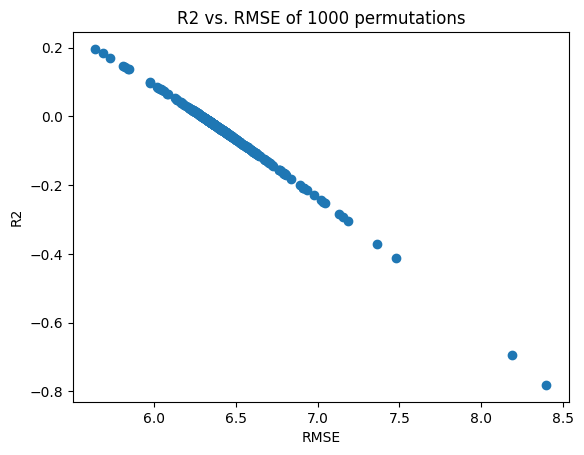

The correlation coeficient between R2 and RMSE of 1000 permutations is =  -0.9979534052524925 

Permutations RMSE: DescribeResult(nobs=1000, minmax=(5.641798902411023, 8.397567744333772), mean=6.379891100480365, variance=0.02552717596432398, skewness=4.618010835984803, kurtosis=48.65646357461619) 

Permutations R2: DescribeResult(nobs=1000, minmax=(-0.7812584908941056, 0.19600172034772145), mean=-0.02877040003895857, variance=0.002979286186303124, skewness=-5.694958741003354, kurtosis=64.38664151463072) 

Percentage of permutations with RMSE less than the actual RMSE is = 0.0 

Percentage of permutations with R-squared greater than the actual R-squared is = 0.0 



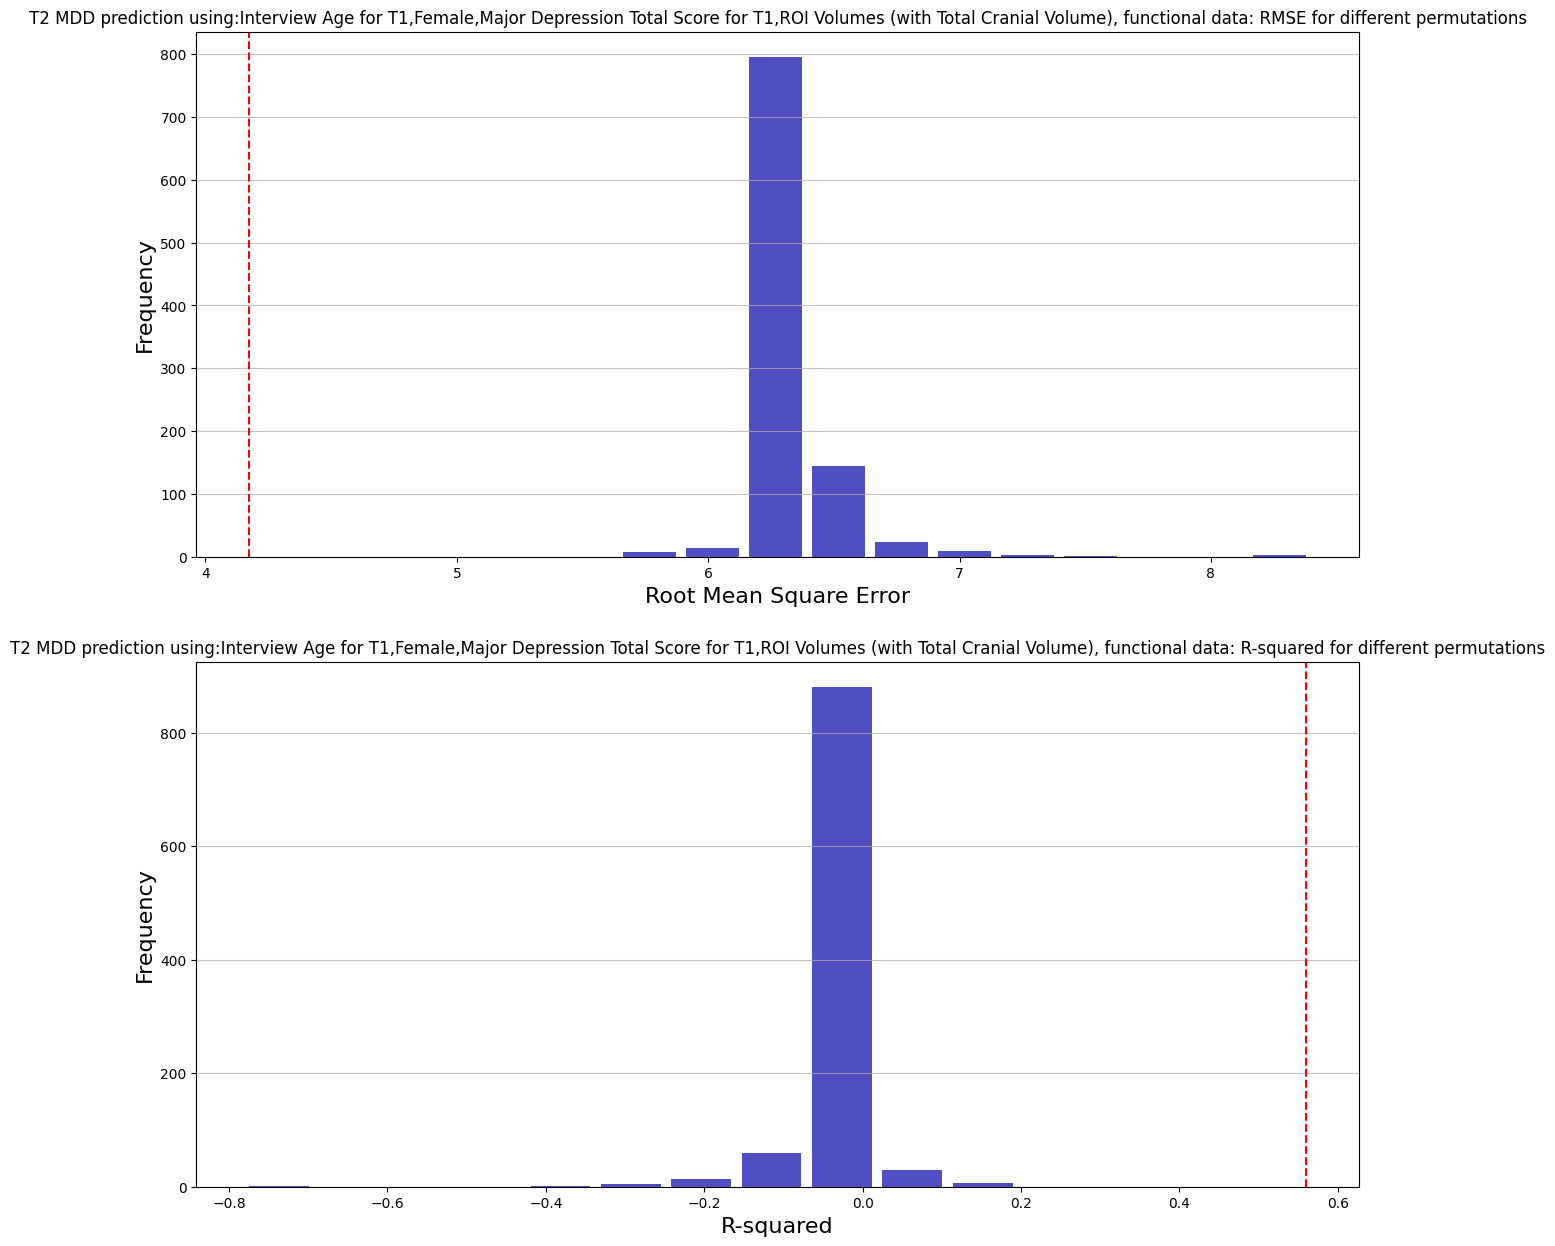

In [12]:
Permutation_Test()

In [195]:
Clinical_Structural_Functional_Data_Clean_for_corr = Demographic_Clinical_Structural_Functional_T2.drop(['src_subject_id', 'Female'], axis = 1)

corr_array_only_scales = Clinical_Structural_Functional_Data_Clean_for_corr.corr()

corr_array_only_scales

Interview Age for T1  \
Interview Age for T1                               1.000000   
Major Depression Total Score for T1                0.209326   
Social Phobia Total Score for T1                   0.176830   
Panic Disorder Total Score for T1                  0.195193   
Separation Anxiety Total Score for T1              0.022256   
...                                                     ...   
Substantia nigra pars compacta_Right               0.133475   
Ventral tegmental area_Right                       0.179363   
Mammillary bodies_Right                           -0.057394   
Septal nuclei_Right                               -0.095228   
Nucleus basalis_Right                              0.005362   

                                       Major Depression Total Score for T1  \
Interview Age for T1                                              0.209326   
Major Depression Total Score for T1                               1.000000   
Social Phobia Total Score for T1                                  0.721257   
Panic Disorder Total Score for T1                                 0.736119   
Separation Anxiety Total Score for T1                             0.636523   
...                                                                    ...   
Substantia nigra pars compacta_Right                              0.119322   
Ventral tegmental area_Right                                      0.058692   
Mammillary bodies_Right                                           0.008242   
Septal nuclei_Right                                              -0.143103   
Nucleus basalis_Right                                            -0.002599   

                                       Social Phobia Total Score for T1  \
Interview Age for T1                                           0.176830   
Major Depression Total Score for T1                            0.721257   
Social Phobia Total Score for T1                               1.000000   
Panic Disorder Total Score for T1                              0.726655   
Separation Anxiety Total Score for T1                          0.633147   
...                                                                 ...   
Substantia nigra pars compacta_Right                           0.042424   
Ventral tegmental area_Right                                  -0.067292   
Mammillary bodies_Right                                        0.020812   
Septal nuclei_Right                                           -0.116648   
Nucleus basalis_Right                                         -0.026049   

                                       Panic Disorder Total Score for T1  \
Interview Age for T1                                            0.195193   
Major Depression Total Score for T1                             0.736119   
Social Phobia Total Score for T1                                0.726655   
Panic Disorder Total Score for T1                               1.000000   
Separation Anxiety Total Score for T1                           0.721648   
...                                                                  ...   
Substantia nigra pars compacta_Right                            0.077892   
Ventral tegmental area_Right                                   -0.035916   
Mammillary bodies_Right                                        -0.009700   
Septal nuclei_Right                                            -0.028429   
Nucleus basalis_Right                                          -0.088814   

                                       Separation Anxiety Total Score for T1  \
Interview Age for T1                                                0.022256   
Major Depression Total Score for T1                                 0.636523   
Social Phobia Total Score for T1                                    0.633147   
Panic Disorder Total Score for T1                                   0.721648   
Separation Anxiety Total Score for T1                               1.000000   
...                                                

In [196]:
#In progress
from scipy.stats import pointbiserialr

def plots(): 
    
    plot_str = input("Enter a comma-separated list of predictors to plot: \n Enter 1 for 'Interview Age for T1'.\n Enter 11 for 'Interview Age for T2'.\n Enter 3 for 'Major Depression Total Score for T1'.\n Enter 4 for 'Social Phobia Total Score for T1'.\n Enter 9 for 'Total Anxiety Score for T1'.\n Enter 20 for 'Estimated Total Intra-Cranial Volume'.\n Enter 21 for 'Left-Thalamus-Proper Volume'.\n Enter 22 for 'Right-Thalamus-Proper Volume'.\n Enter 23 for 'Left-Putamen Volume'.\n Enter 24 for 'Right-Putamen Volume'.\n Enter 25 for 'Left-Caudate Volume'.\n Enter 26 for 'Right-Caudate Volume'.\n Enter 27 for 'Left-Accumbens-area Volume'.\n Enter 28 for 'Right-Accumbens-area Volume'.\n Enter 29 for 'Left-Amygdala Volume'.\n Enter 30 for 'Right-Amygdala Volume'.\n")
    print("\n")
    plot_list = plot_str.split(",")
    plot_columns = [int(x) for x in plot_list]
    
    cortical_functional_plot_str = input("Enter 'YES' for cortical ROIs' functional data and 'NO' otherwise")
    subcortical_functional_plot_str = input("Enter 'YES' for subcortical ROIs' functional data and 'NO' otherwise")

    if predicting == 1:
        
        dependent_variable = dataset['Major Depression Total Score for T2']
        
        Scatterplot_title = 'Major Depressive Disorder Total Score for T2'
        
        data1 = dataset[dataset['Female'] ==1]['Major Depression Total Score for T2']
        data2 = dataset[dataset['Female'] ==0]['Major Depression Total Score for T2']
        
        # Calculate the point-biserial correlation coefficient #r_pb = (M1 - M0) / (SD * sqrt(p * (1 - p)))
        r_pb, p_value = pointbiserialr(dataset['Female'], dataset['Major Depression Total Score for T2'])

        
    else:
        
        dependent_variable = dataset['Total Anxiety Score for T2']
        
        Scatterplot_title = 'Total Anxiety Score for T2'
        
        data1 = dataset[dataset['Female'] ==1]['Total Anxiety Score for T2']
        data2 = dataset[dataset['Female'] ==0]['Total Anxiety Score for T2']
        
        # Calculate the point-biserial correlation coefficient #r_pb = (M1 - M0) / (SD * sqrt(p * (1 - p)))
        r_pb, p_value = pointbiserialr(dataset['Female'], dataset['Total Anxiety Score for T2'])

        
    #dataset_for_plots = dataset[dataset.columns[plot_indices]]

    for i in plot_columns:
    
        corr = np.corrcoef(dataset.iloc[:,i], dependent_variable)
        
        print("The Pearson's Correlation Co-efficient between",dataset.columns[i] , "and " + Scatterplot_title+ "=", corr[0,1], ".")
    
        fig, ax = plt.subplots(1,1)
            
        plt.plot(dataset.iloc[:,i],dependent_variable ,'o')
        
        #obtain m (slope) and b(intercept) of linear regression line
        m, b = np.polyfit(dataset.iloc[:,i],dependent_variable, 1)
        
        #add linear regression line to scatterplot 
        plt.plot(dataset.iloc[:,i], m*dataset.iloc[:,i]+b, label = 'Linear Regression Line')
        
        plt.xlabel(dataset.columns[i])
        
        plt.ylabel(Scatterplot_title)
        
        plt.title(dataset.columns[i]+" Vs." + Scatterplot_title)
            
        plt.show() 
        
    if cortical_functional_plot_str == 'YES':
        
        for i in range(31,99):
    
            corr = np.corrcoef(dataset.iloc[:,i], dependent_variable)

            print("The Pearson's Correlation Co-efficient between",dataset.columns[i] , "and " + Scatterplot_title+ "=", corr[0,1], ".")

            fig, ax = plt.subplots(1,1)

            plt.plot(dataset.iloc[:,i],dependent_variable ,'o')

            #obtain m (slope) and b(intercept) of linear regression line
            m, b = np.polyfit(dataset.iloc[:,i],dependent_variable, 1)

            #add linear regression line to scatterplot 
            plt.plot(dataset.iloc[:,i], m*dataset.iloc[:,i]+b, label = 'Linear Regression Line')

            plt.xlabel(dataset.columns[i])

            plt.ylabel(Scatterplot_title)

            plt.title(dataset.columns[i]+" Vs." + Scatterplot_title)

            plt.show() 
            
    if subcortical_functional_plot_str == 'YES':
        
        for i in range(99,157):
    
            corr = np.corrcoef(dataset.iloc[:,i], dependent_variable)

            print("The Pearson's Correlation Co-efficient between",dataset.columns[i] , "and " + Scatterplot_title+ "=", corr[0,1], ".")

            fig, ax = plt.subplots(1,1)

            plt.plot(dataset.iloc[:,i],dependent_variable ,'o')

            #obtain m (slope) and b(intercept) of linear regression line
            m, b = np.polyfit(dataset.iloc[:,i],dependent_variable, 1)

            #add linear regression line to scatterplot 
            plt.plot(dataset.iloc[:,i], m*dataset.iloc[:,i]+b, label = 'Linear Regression Line')

            plt.xlabel(dataset.columns[i])

            plt.ylabel(Scatterplot_title)

            plt.title(dataset.columns[i]+" Vs." + Scatterplot_title)

            plt.show() 
        
    #Box plot for Sex
    data=[data1, data2]

    s_box = sns.boxplot(data, showmeans=True, meanline=True)
    s_box.set(xlabel = "Sex", ylabel = Scatterplot_title, title = "Box plots of " + Scatterplot_title+ " for different genders")
    s_box.set_xticklabels(['Male', 'Female'])

    means = [np.mean(d) for d in data]
    stds = [np.std(d) for d in data]

    print("The point-biserial correlation coefficient between Sex and "+ Scatterplot_title + "=",r_pb,".")
    print("The mean and standard deviation of " + Scatterplot_title +" for female participants are",means[1], "and", stds[1],"respectively.")
    print("The mean and standard deviation of "+ Scatterplot_title + " for male participants are",means[0], "and", stds[0],"respectively.")

 
    

Enter a comma-separated list of predictors to plot: 
 Enter 1 for 'Interview Age for T1'.
 Enter 11 for 'Interview Age for T2'.
 Enter 3 for 'Major Depression Total Score for T1'.
 Enter 4 for 'Social Phobia Total Score for T1'.
 Enter 9 for 'Total Anxiety Score for T1'.
 Enter 20 for 'Estimated Total Intra-Cranial Volume'.
 Enter 21 for 'Left-Thalamus-Proper Volume'.
 Enter 22 for 'Right-Thalamus-Proper Volume'.
 Enter 23 for 'Left-Putamen Volume'.
 Enter 24 for 'Right-Putamen Volume'.
 Enter 25 for 'Left-Caudate Volume'.
 Enter 26 for 'Right-Caudate Volume'.
 Enter 27 for 'Left-Accumbens-area Volume'.
 Enter 28 for 'Right-Accumbens-area Volume'.
 Enter 29 for 'Left-Amygdala Volume'.
 Enter 30 for 'Right-Amygdala Volume'.
1,11,20


Enter 'YES' for cortical ROIs' functional data and 'NO' otherwiseYES
Enter 'YES' for subcortical ROIs' functional data and 'NO' otherwiseYES
The Pearson's Correlation Co-efficient between Interview Age for T1 and Major Depressive Disorder Total Score for T2

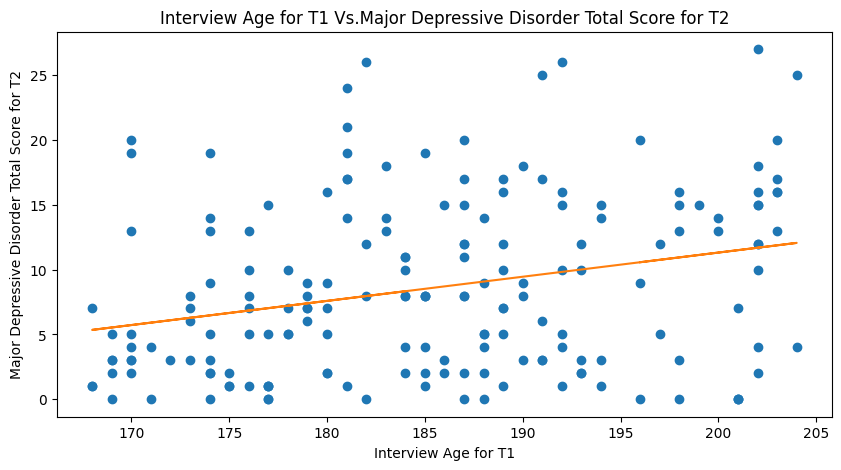

The Pearson's Correlation Co-efficient between Interview Age for T2 and Major Depressive Disorder Total Score for T2= 0.28645749960095923 .


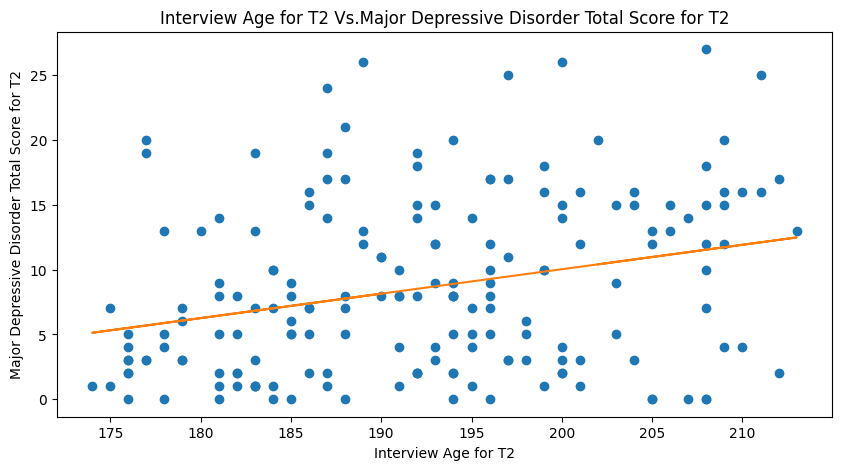

The Pearson's Correlation Co-efficient between EstimatedTotalIntraCranialVol and Major Depressive Disorder Total Score for T2= -0.2807033265197846 .


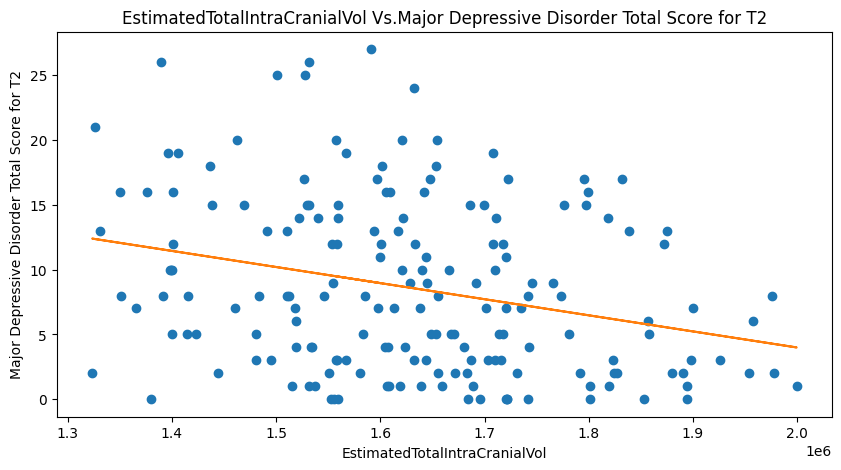

The Pearson's Correlation Co-efficient between Anterior_Agranular_Insula_Complex_Left and Major Depressive Disorder Total Score for T2= -0.0009472512147148151 .


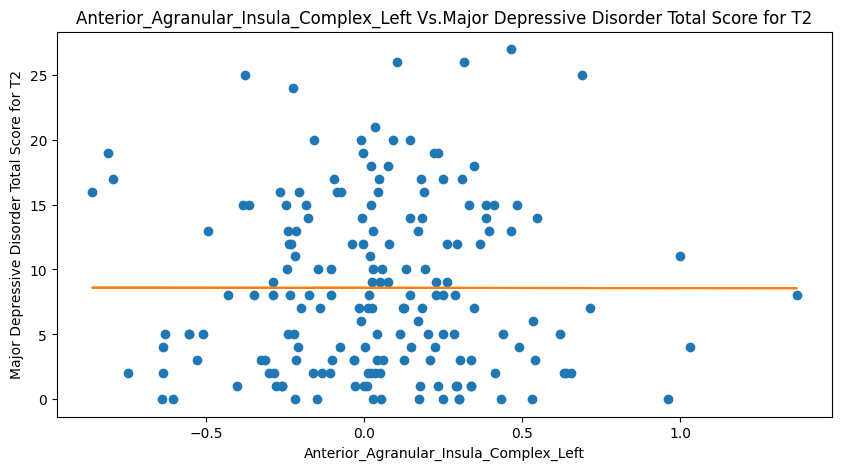

The Pearson's Correlation Co-efficient between Anterior_Ventral_Insular_Area_Left and Major Depressive Disorder Total Score for T2= 0.04814988977680788 .


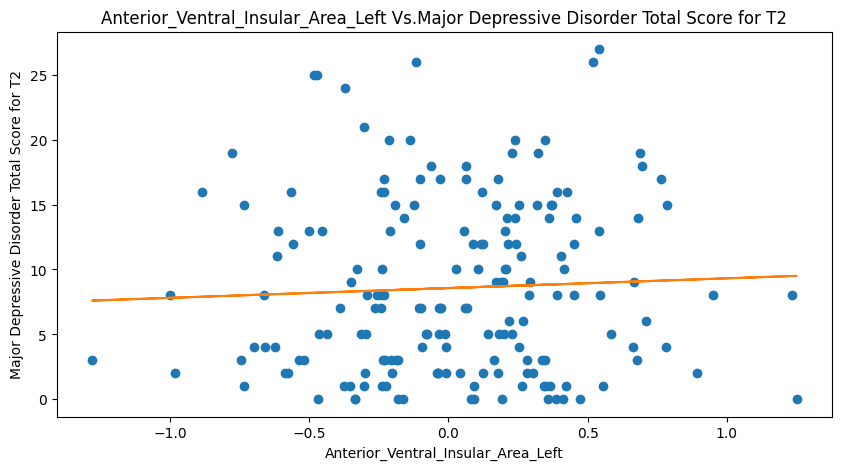

The Pearson's Correlation Co-efficient between Middle_Insular_Area_Left and Major Depressive Disorder Total Score for T2= 0.07346567840577482 .


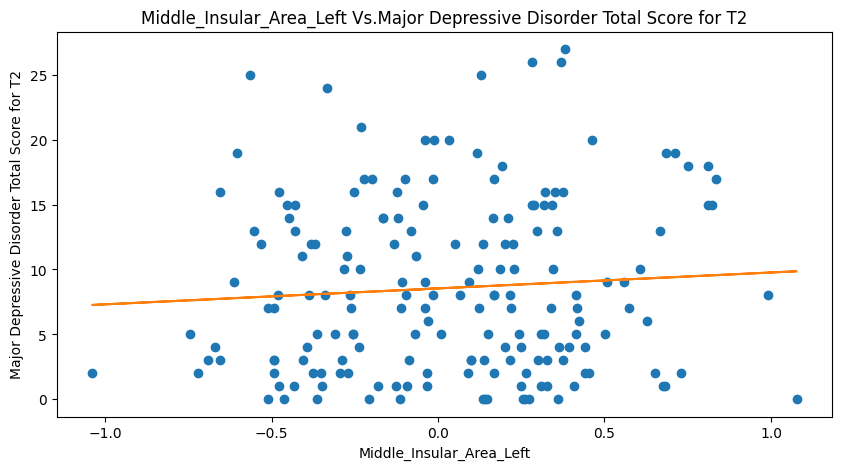

The Pearson's Correlation Co-efficient between Hippocampus_Left and Major Depressive Disorder Total Score for T2= -0.1542960908416784 .


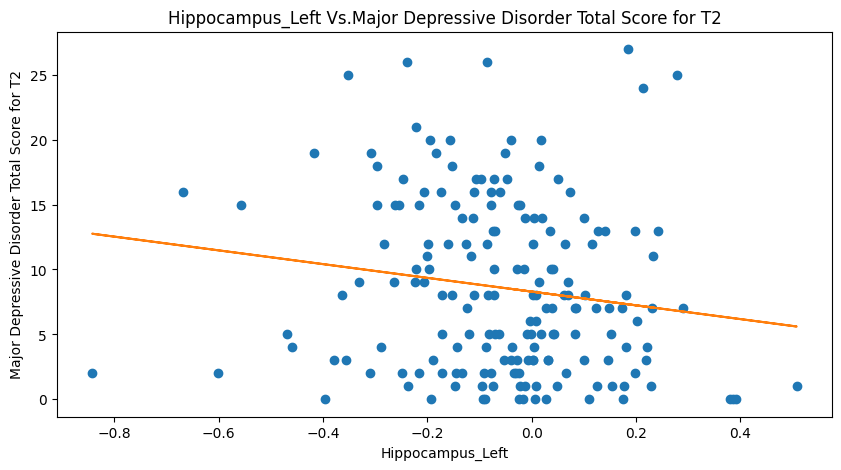

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_1_Left and Major Depressive Disorder Total Score for T2= -0.04413575480578757 .


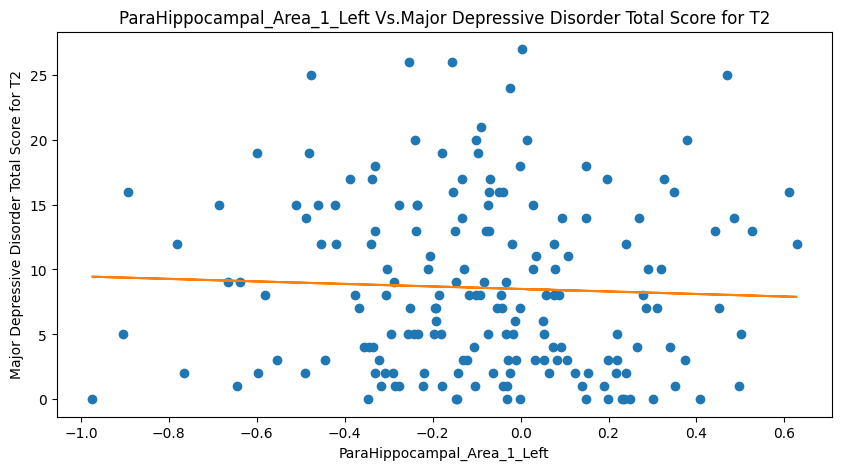

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_2_Left and Major Depressive Disorder Total Score for T2= -0.12313262962219393 .


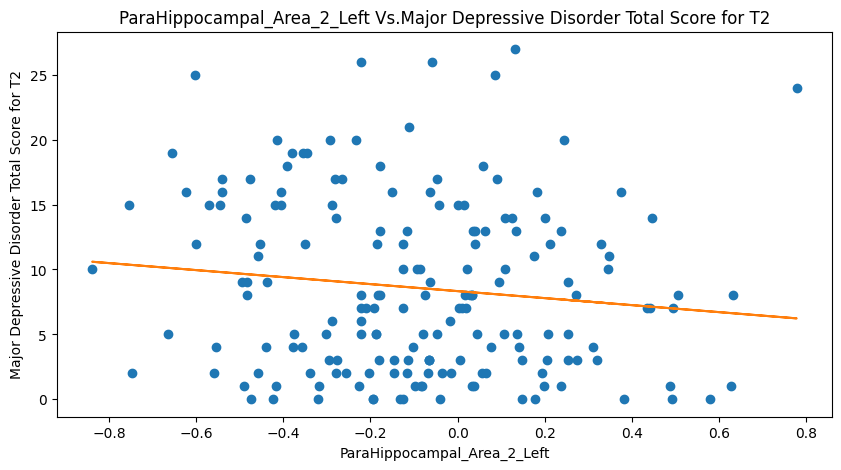

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_3_Left and Major Depressive Disorder Total Score for T2= -0.03660268300359234 .


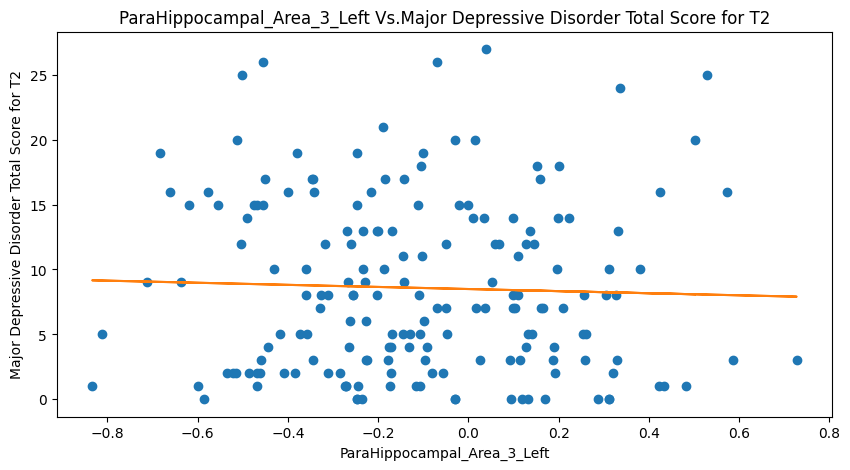

The Pearson's Correlation Co-efficient between Area_10r_Left and Major Depressive Disorder Total Score for T2= -0.06879897191780653 .


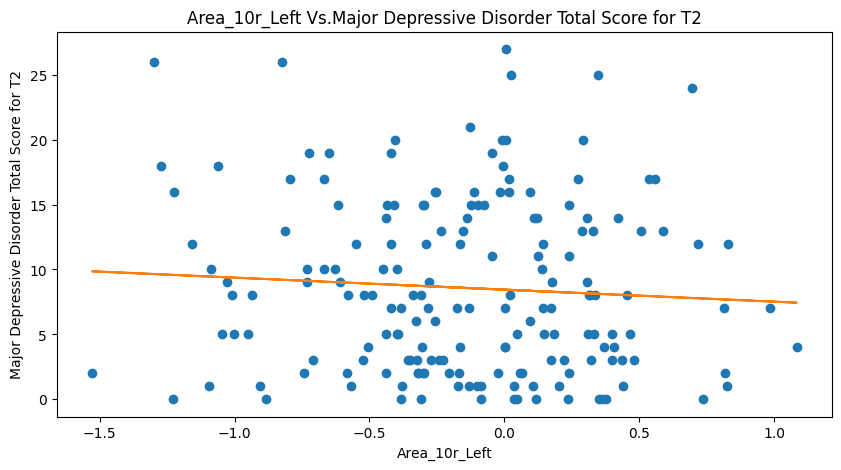

The Pearson's Correlation Co-efficient between Area_10v_Left and Major Depressive Disorder Total Score for T2= -0.10803303985632551 .


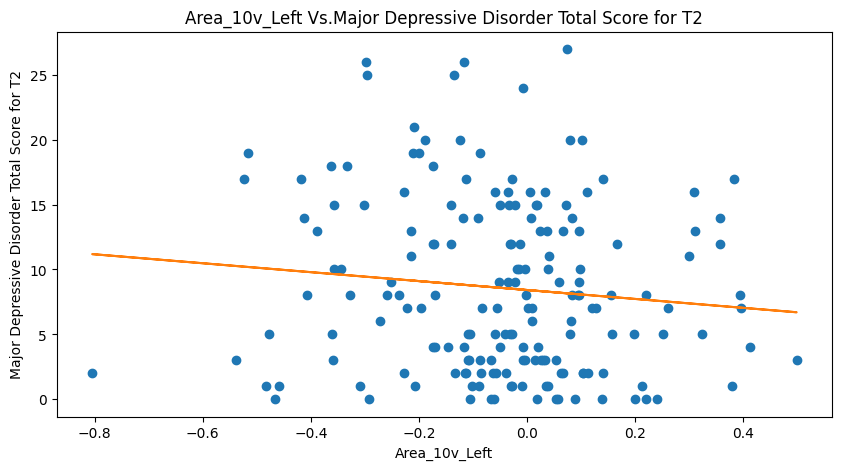

The Pearson's Correlation Co-efficient between Area_25_Left and Major Depressive Disorder Total Score for T2= -0.06009463063539504 .


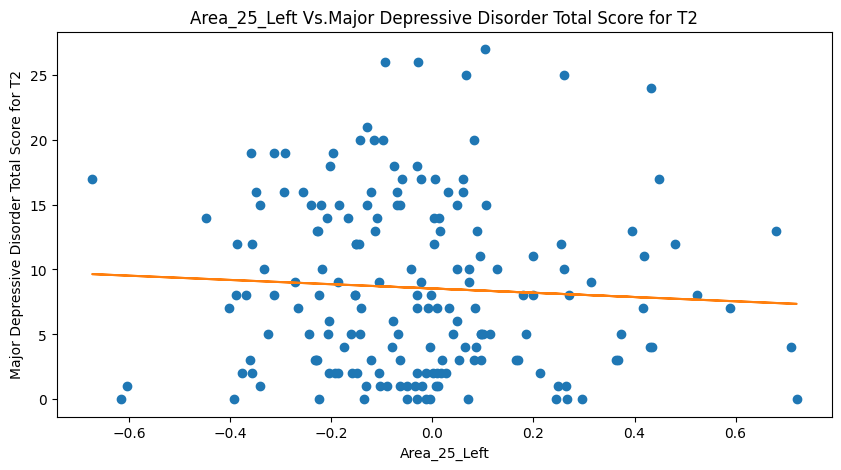

The Pearson's Correlation Co-efficient between Area_33_prime_Left and Major Depressive Disorder Total Score for T2= 0.05130919102959656 .


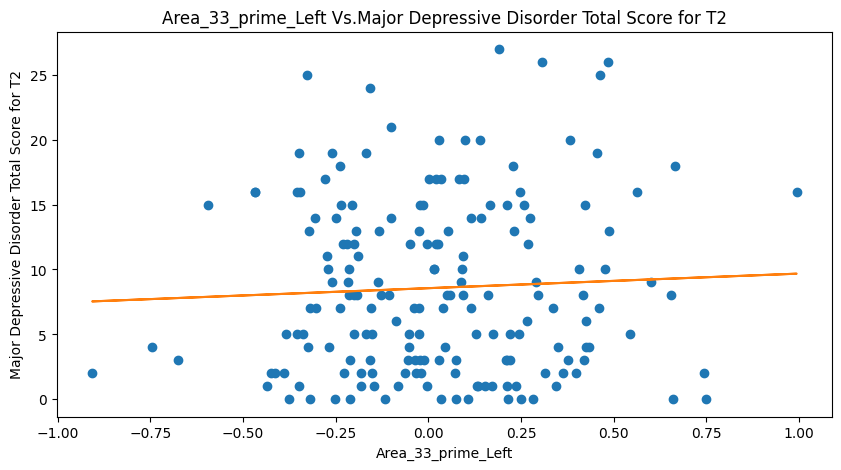

The Pearson's Correlation Co-efficient between Area_8BM_Left and Major Depressive Disorder Total Score for T2= 0.035417123344545574 .


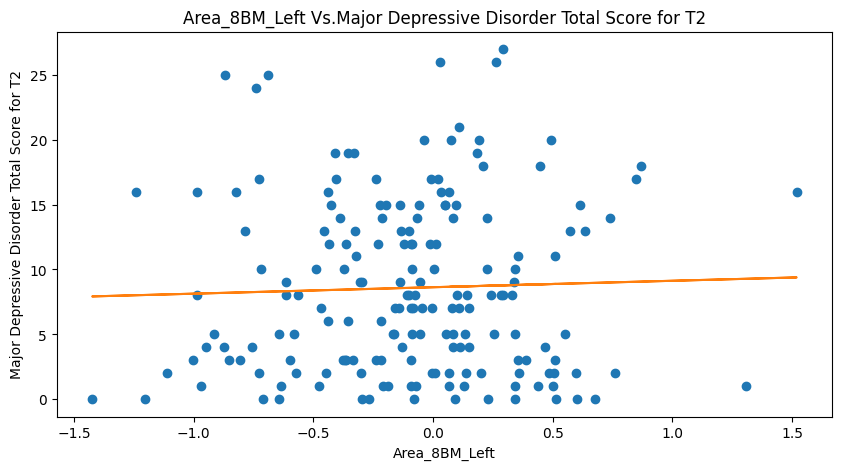

The Pearson's Correlation Co-efficient between Area_9_Middle_Left and Major Depressive Disorder Total Score for T2= -0.09550739457600457 .


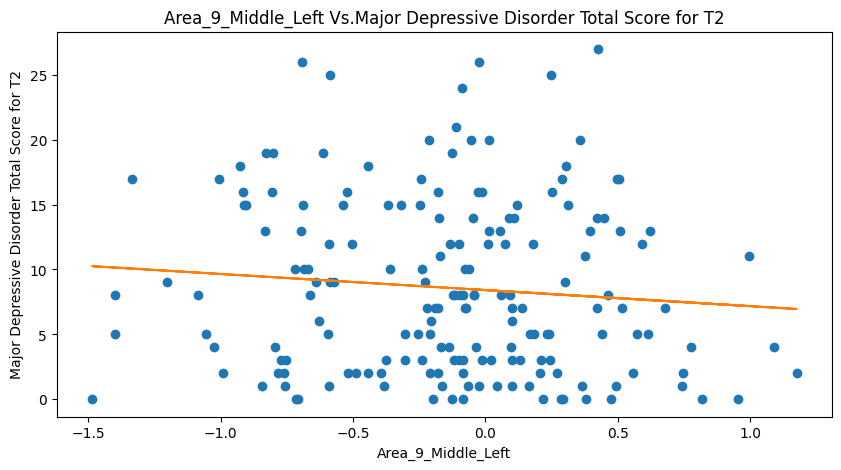

The Pearson's Correlation Co-efficient between Area_a24_Left and Major Depressive Disorder Total Score for T2= -0.059748810686509356 .


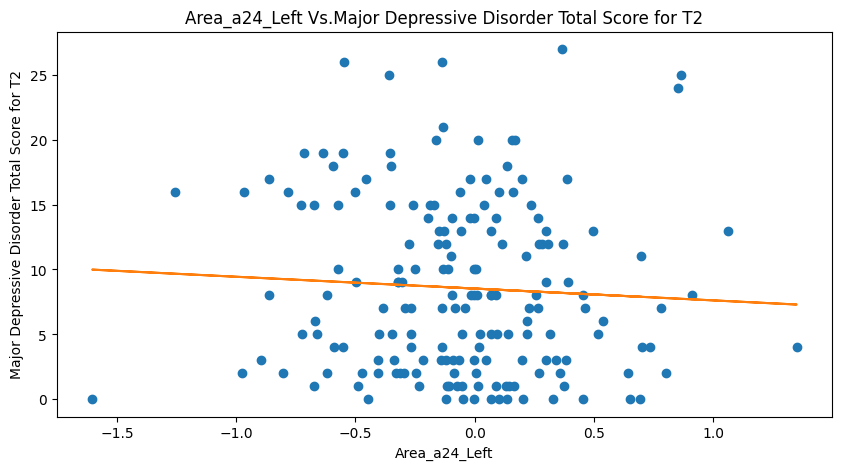

The Pearson's Correlation Co-efficient between Anterior_24_prime_Left and Major Depressive Disorder Total Score for T2= 0.010568248701624688 .


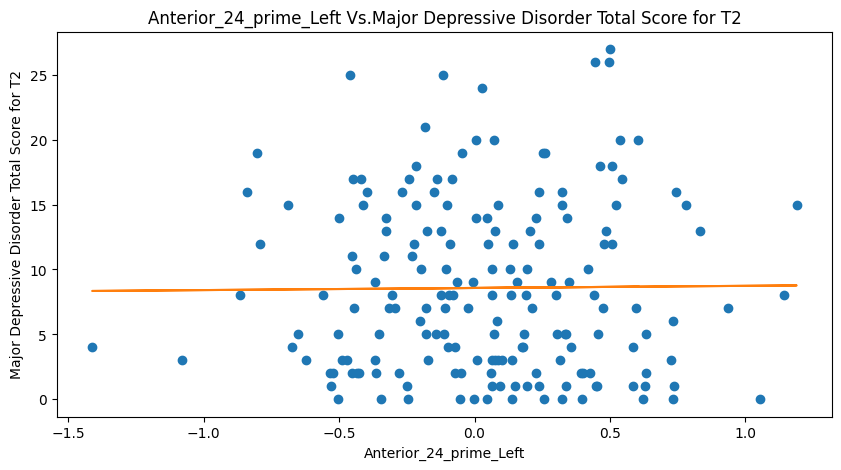

The Pearson's Correlation Co-efficient between Area_anterior_32_prime_Left and Major Depressive Disorder Total Score for T2= 0.0745848457421067 .


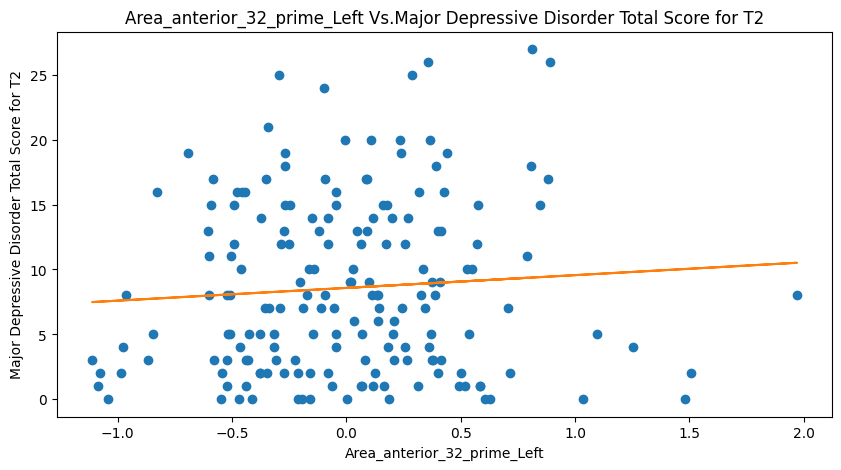

The Pearson's Correlation Co-efficient between Area_dorsal_32_Left and Major Depressive Disorder Total Score for T2= 0.06316080305344032 .


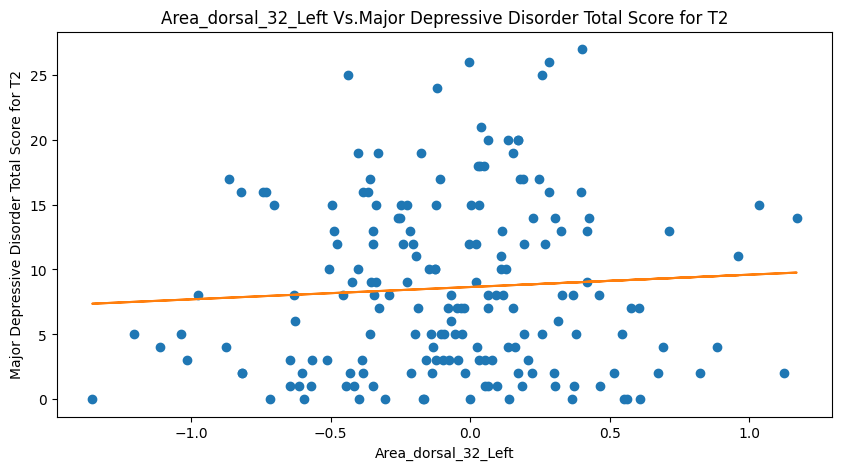

The Pearson's Correlation Co-efficient between Area_posterior_24_Left and Major Depressive Disorder Total Score for T2= -0.010761844783679442 .


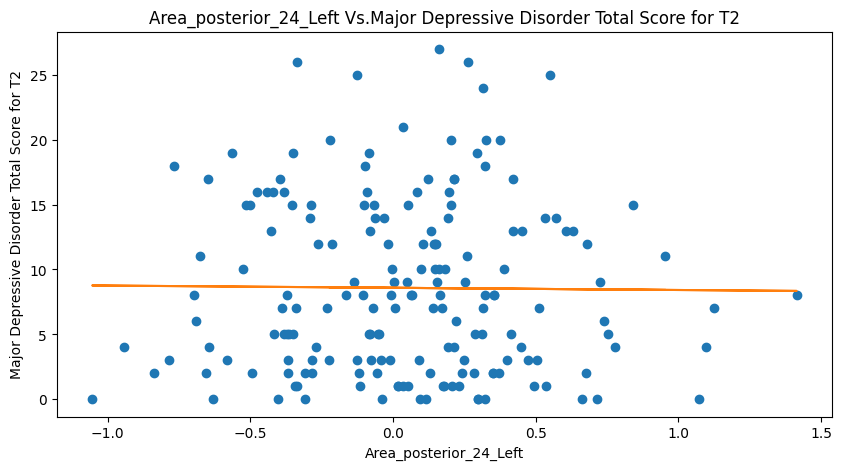

The Pearson's Correlation Co-efficient between Area_Posterior_24_prime_Left and Major Depressive Disorder Total Score for T2= -0.04240712351494834 .


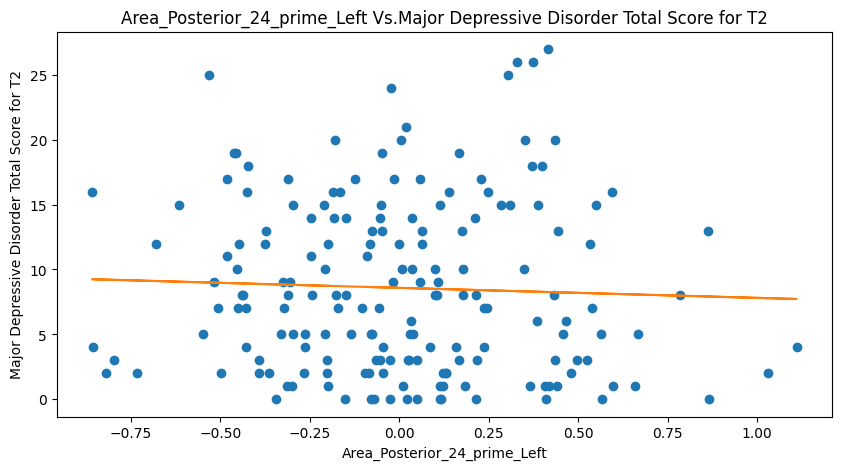

The Pearson's Correlation Co-efficient between Area_p32_Left and Major Depressive Disorder Total Score for T2= -0.01137945573100053 .


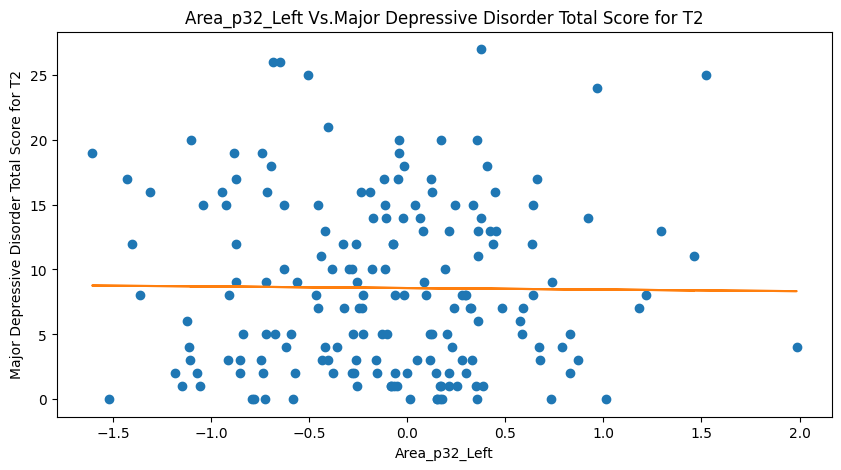

The Pearson's Correlation Co-efficient between Area_p32_prime_Left and Major Depressive Disorder Total Score for T2= -0.028836970959454096 .


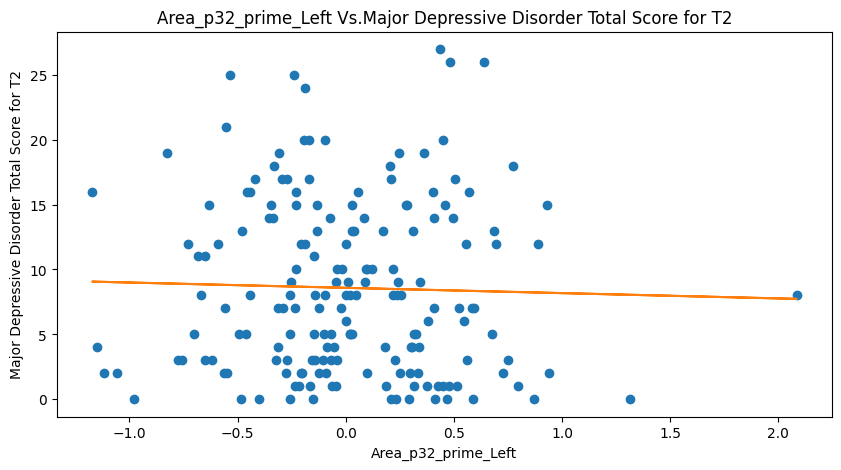

The Pearson's Correlation Co-efficient between Posterior_OFC_Complex_Left and Major Depressive Disorder Total Score for T2= -0.013677799104514318 .


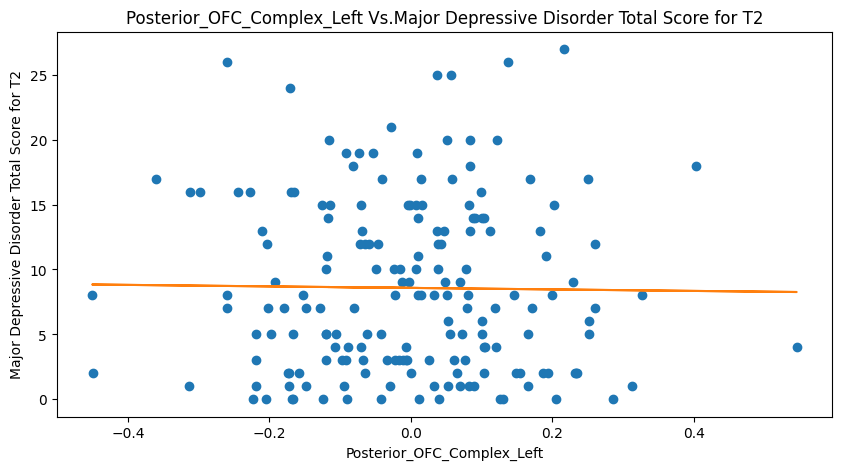

The Pearson's Correlation Co-efficient between Area_s32_Left and Major Depressive Disorder Total Score for T2= 0.005176017101949263 .


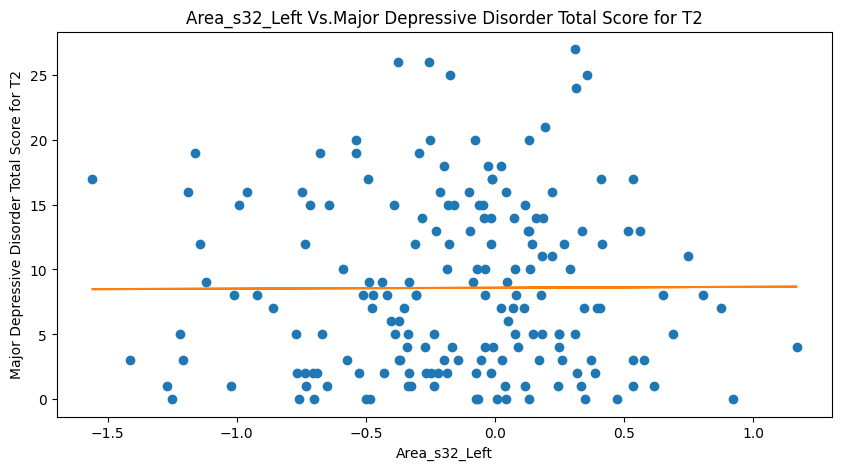

The Pearson's Correlation Co-efficient between Area_47l_(47_lateral)_Left and Major Depressive Disorder Total Score for T2= -0.039592015661980805 .


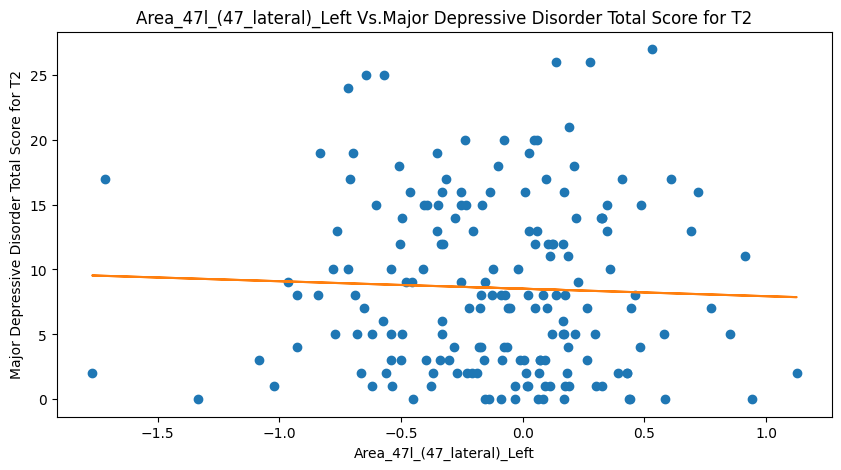

The Pearson's Correlation Co-efficient between Area_anterior_47r_Left and Major Depressive Disorder Total Score for T2= 0.05313950734715024 .


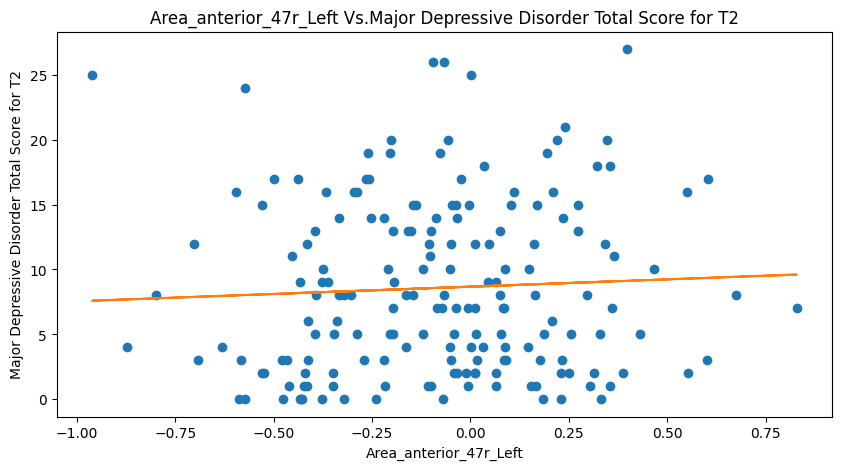

The Pearson's Correlation Co-efficient between Area_IFJa_Left and Major Depressive Disorder Total Score for T2= -0.020718541865228954 .


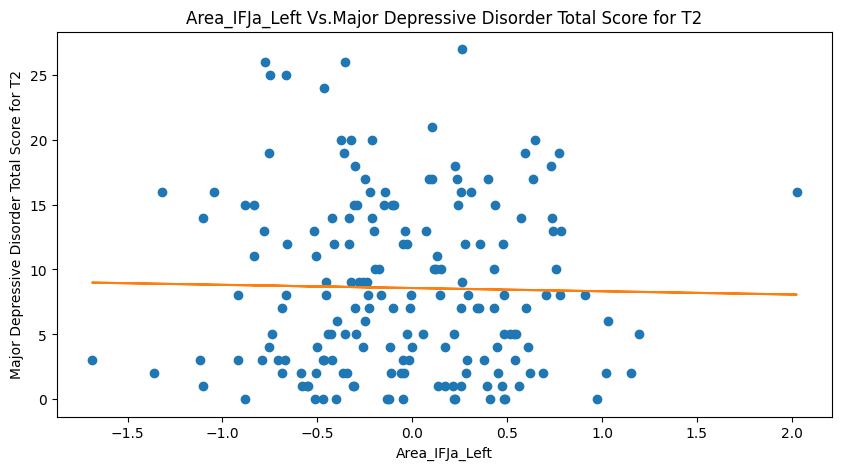

The Pearson's Correlation Co-efficient between Area_IFJp_Left and Major Depressive Disorder Total Score for T2= -0.07490605778031592 .


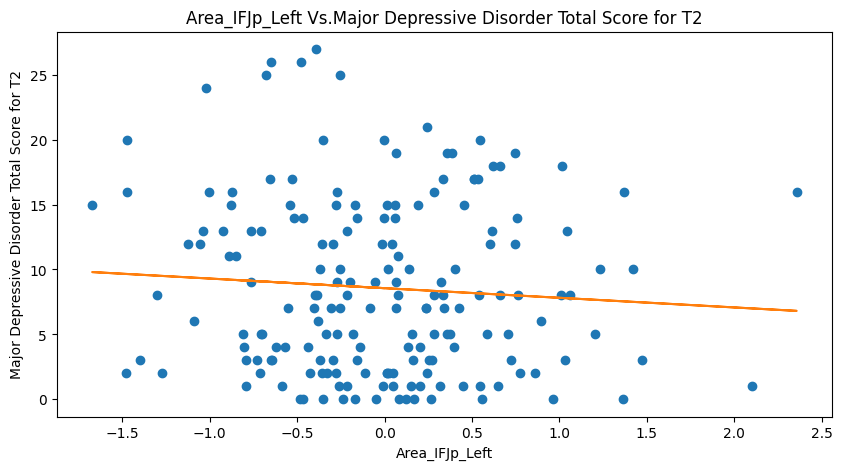

The Pearson's Correlation Co-efficient between Area_IFSa_Left and Major Depressive Disorder Total Score for T2= -0.10679375285304797 .


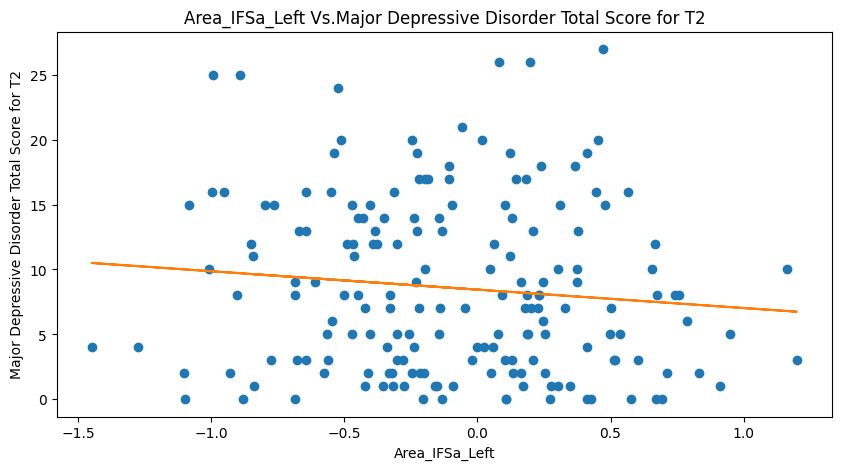

The Pearson's Correlation Co-efficient between Area_IFSp_Left and Major Depressive Disorder Total Score for T2= -0.10192376491547019 .


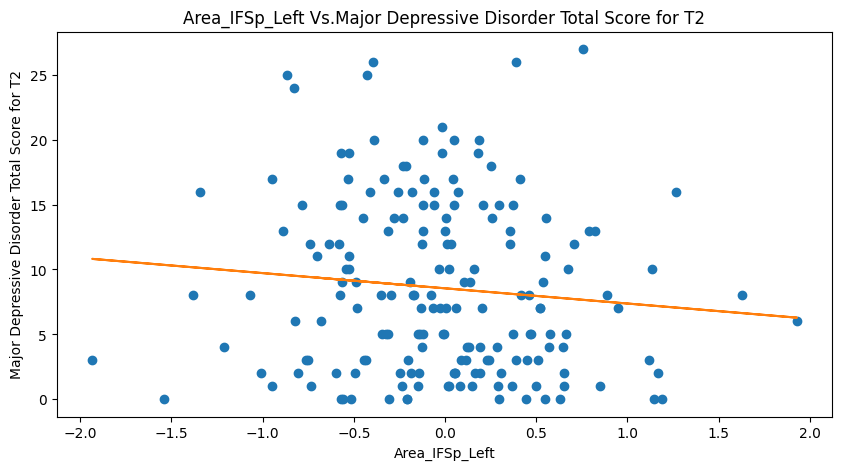

The Pearson's Correlation Co-efficient between Area_posterior_47r_Left and Major Depressive Disorder Total Score for T2= 0.006866208692637405 .


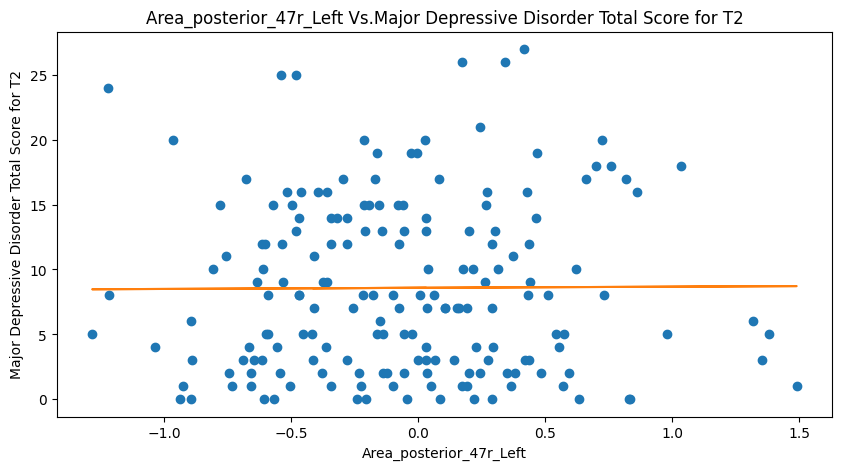

The Pearson's Correlation Co-efficient between Area_8B_Lateral_Left and Major Depressive Disorder Total Score for T2= -0.07879304906449454 .


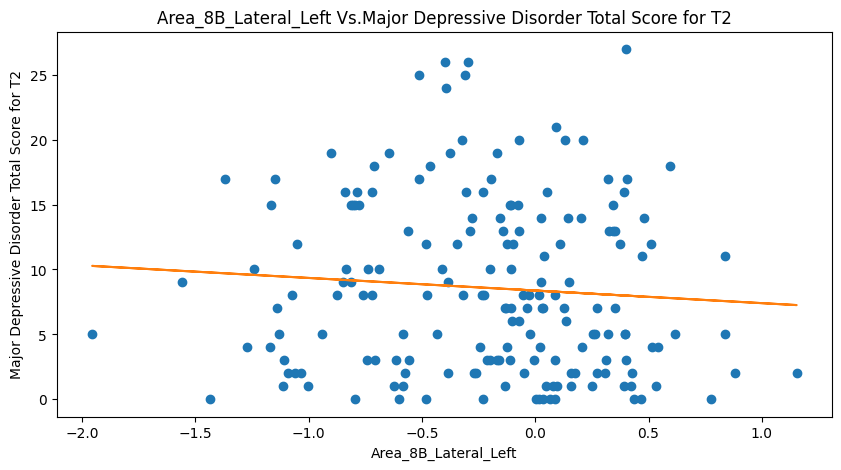

The Pearson's Correlation Co-efficient between Area_8C_Left and Major Depressive Disorder Total Score for T2= -0.09553280926736223 .


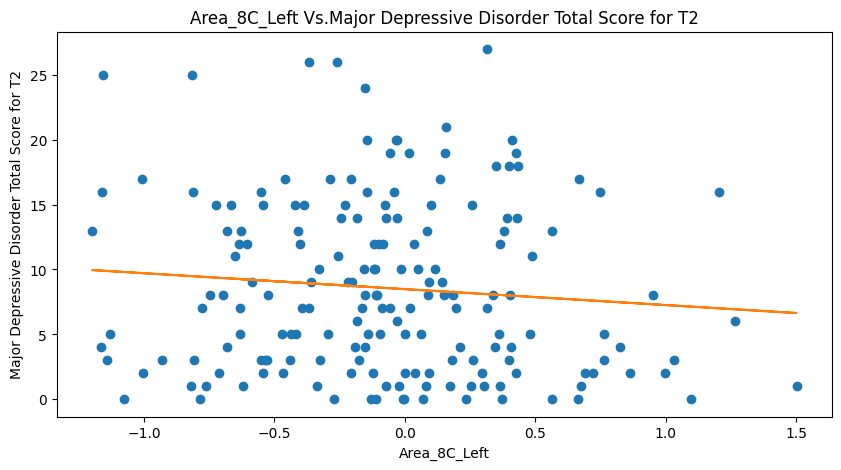

The Pearson's Correlation Co-efficient between Inferior_6-8_Transitional_Area_Left and Major Depressive Disorder Total Score for T2= -0.09744103025182706 .


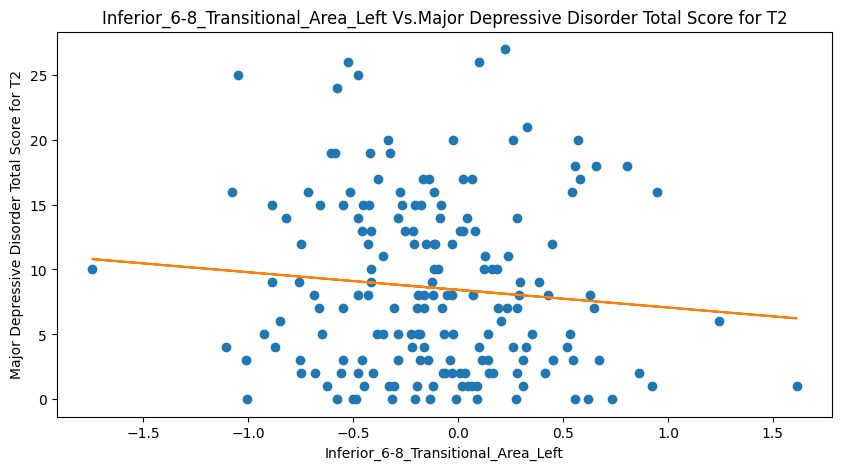

The Pearson's Correlation Co-efficient between Superior_6-8_Transitional_Area_Left and Major Depressive Disorder Total Score for T2= -0.061381778754423105 .


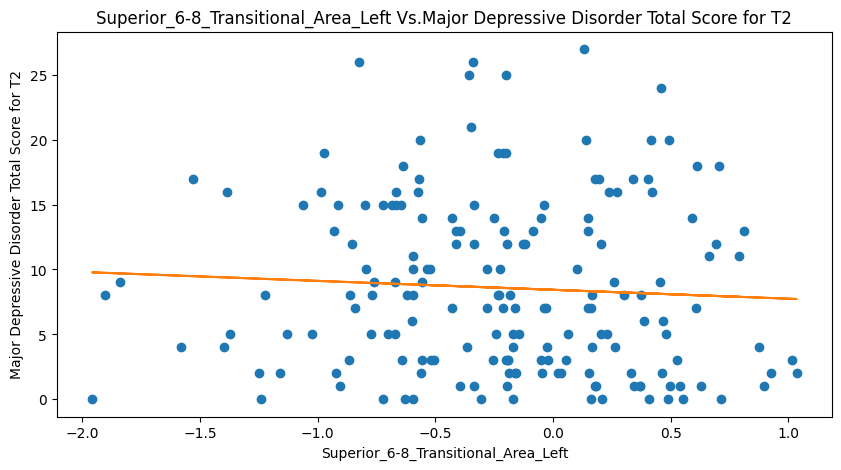

The Pearson's Correlation Co-efficient between Anterior_Agranular_Insula_Complex_Right and Major Depressive Disorder Total Score for T2= -0.016922793475359535 .


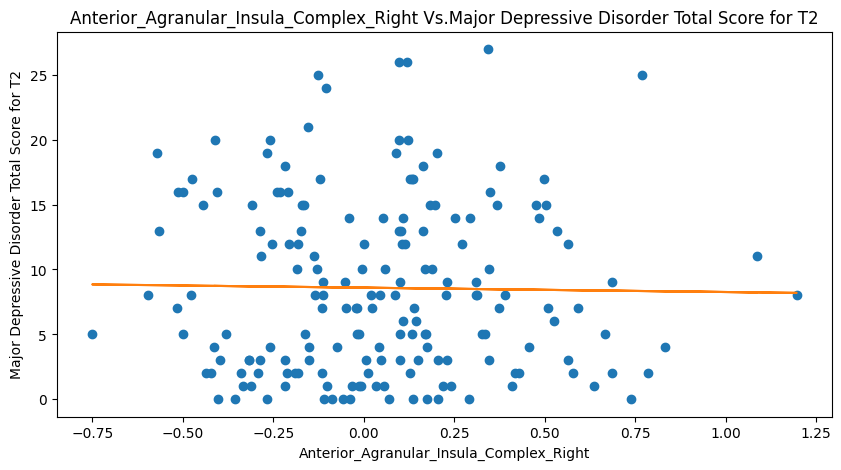

The Pearson's Correlation Co-efficient between Anterior_Ventral_Insular_Area_Right and Major Depressive Disorder Total Score for T2= 0.05994474919585517 .


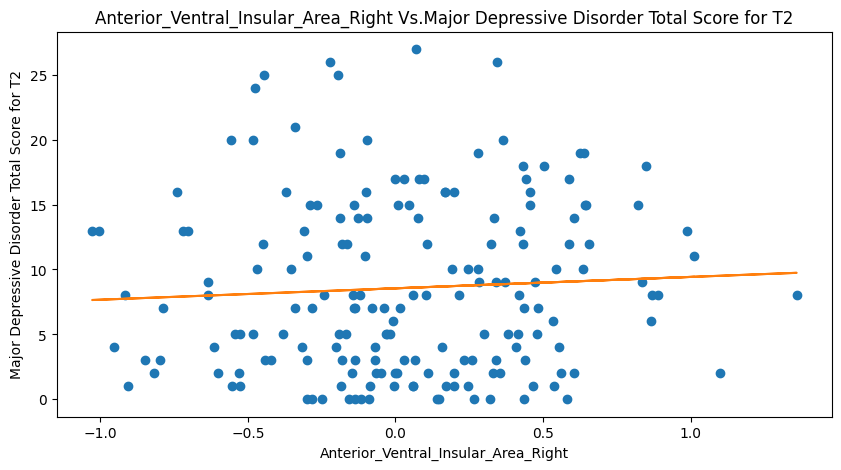

The Pearson's Correlation Co-efficient between Middle_Insular_Area_Right and Major Depressive Disorder Total Score for T2= 0.08148918757674219 .


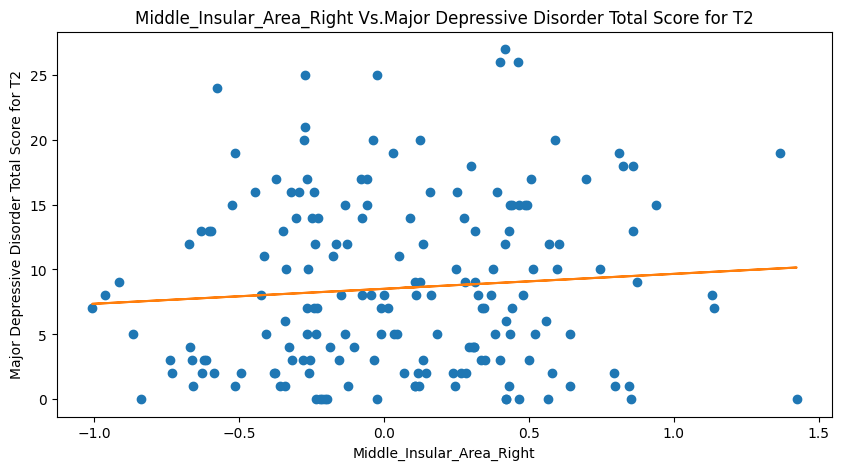

The Pearson's Correlation Co-efficient between Hippocampus_Right and Major Depressive Disorder Total Score for T2= -0.02527931595016571 .


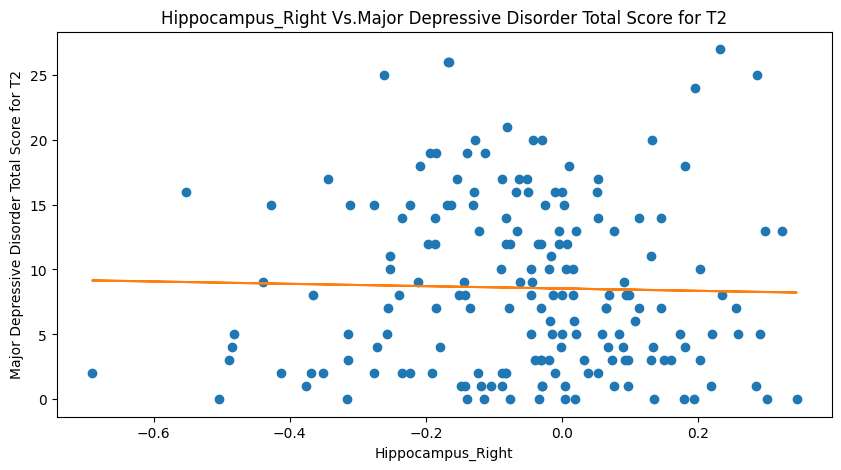

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_1_Right and Major Depressive Disorder Total Score for T2= -0.03757570011937852 .


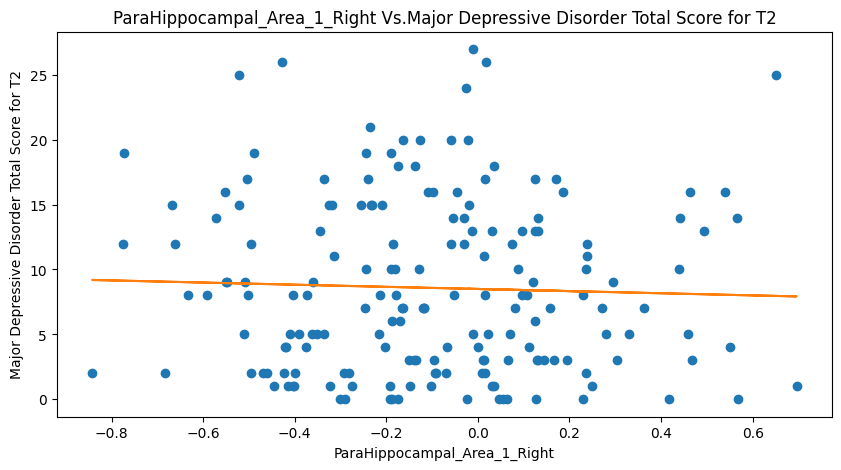

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_2_Right and Major Depressive Disorder Total Score for T2= 0.03906722365041322 .


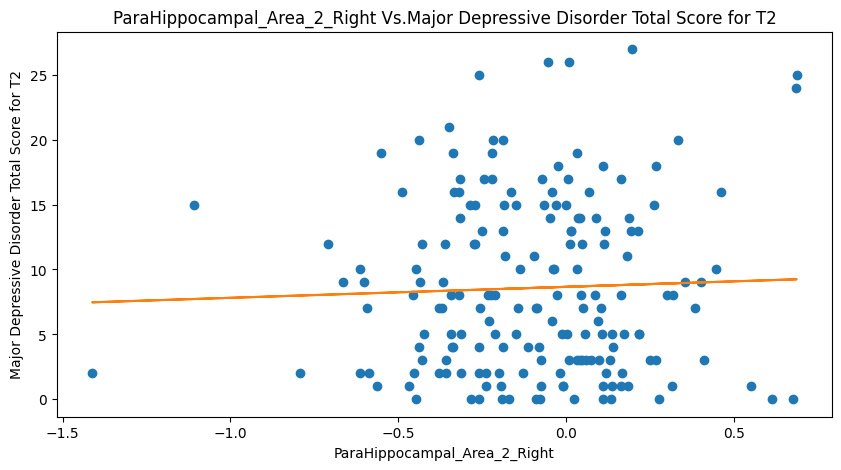

The Pearson's Correlation Co-efficient between ParaHippocampal_Area_3_Right and Major Depressive Disorder Total Score for T2= 0.01473030378450665 .


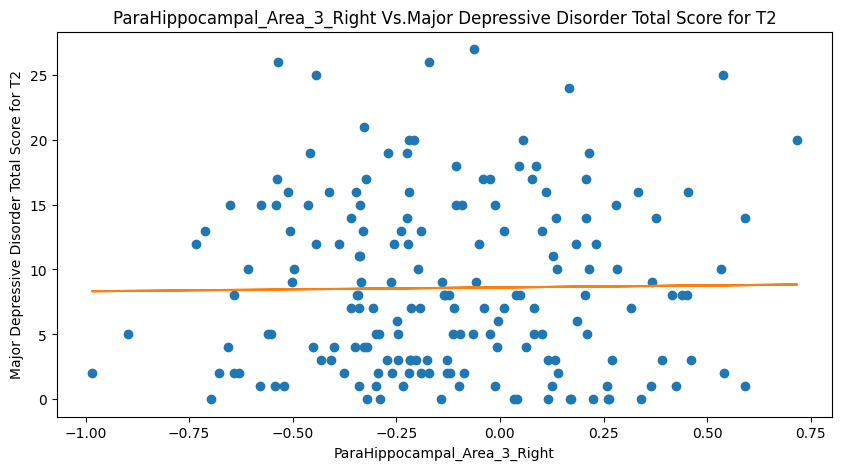

The Pearson's Correlation Co-efficient between Area_10r_Right and Major Depressive Disorder Total Score for T2= -0.10573558780838004 .


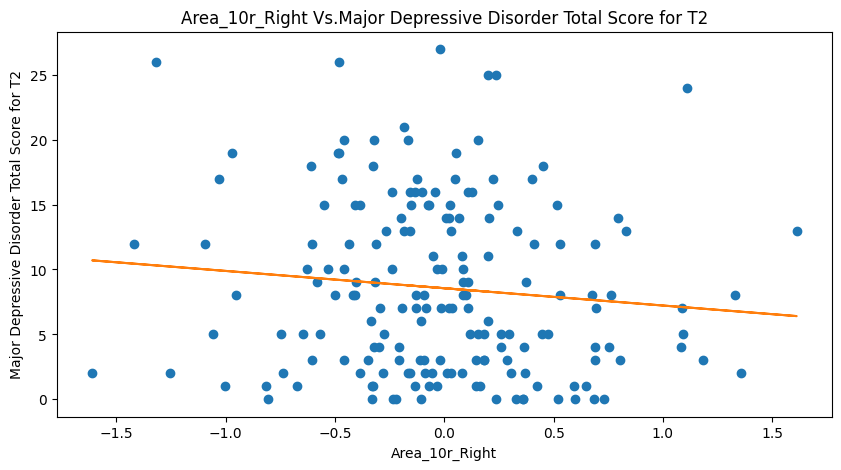

The Pearson's Correlation Co-efficient between Area_10v_Right and Major Depressive Disorder Total Score for T2= -0.16293710373917653 .


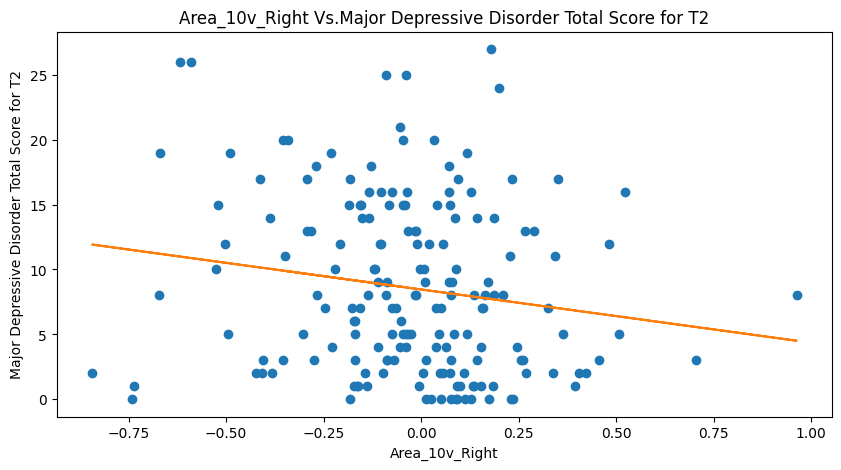

The Pearson's Correlation Co-efficient between Area_25_Right and Major Depressive Disorder Total Score for T2= -0.1188169929442202 .


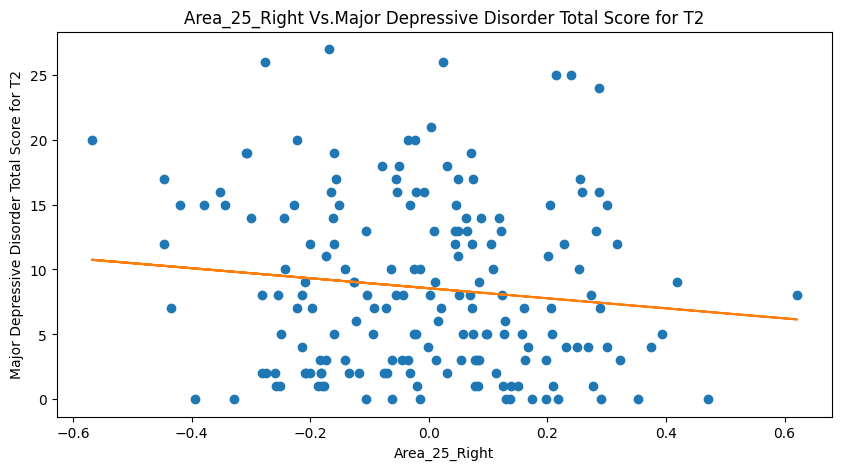

The Pearson's Correlation Co-efficient between Area_33_prime_Right and Major Depressive Disorder Total Score for T2= -0.044201773929219666 .


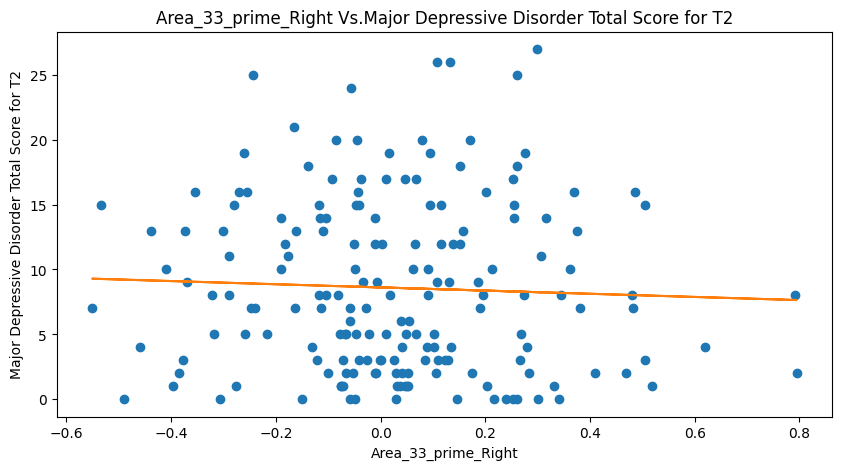

The Pearson's Correlation Co-efficient between Area_8BM_Right and Major Depressive Disorder Total Score for T2= 0.0005435257726007642 .


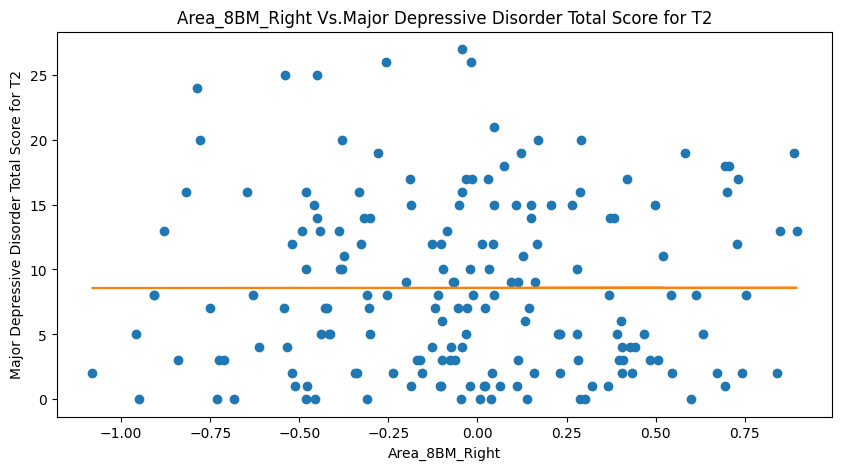

The Pearson's Correlation Co-efficient between Area_9_Middle_Right and Major Depressive Disorder Total Score for T2= -0.13847409053541243 .


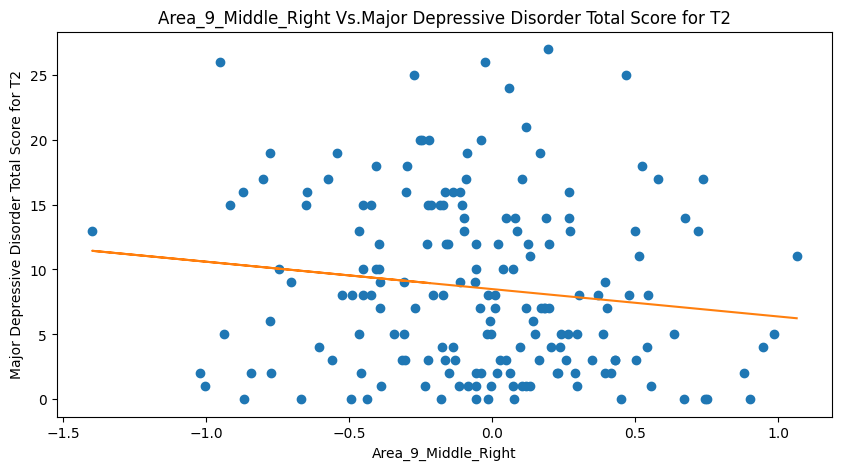

The Pearson's Correlation Co-efficient between Area_a24_Right and Major Depressive Disorder Total Score for T2= -0.04546229698988648 .


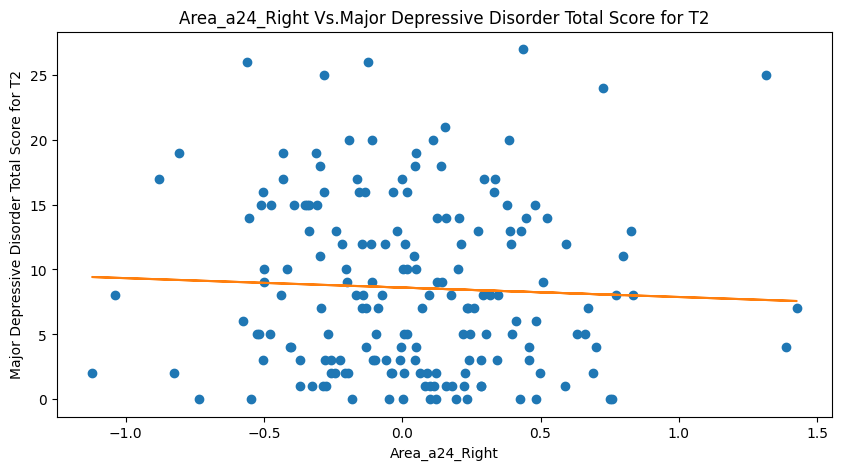

The Pearson's Correlation Co-efficient between Anterior_24_prime_Right and Major Depressive Disorder Total Score for T2= 0.003713825449336092 .


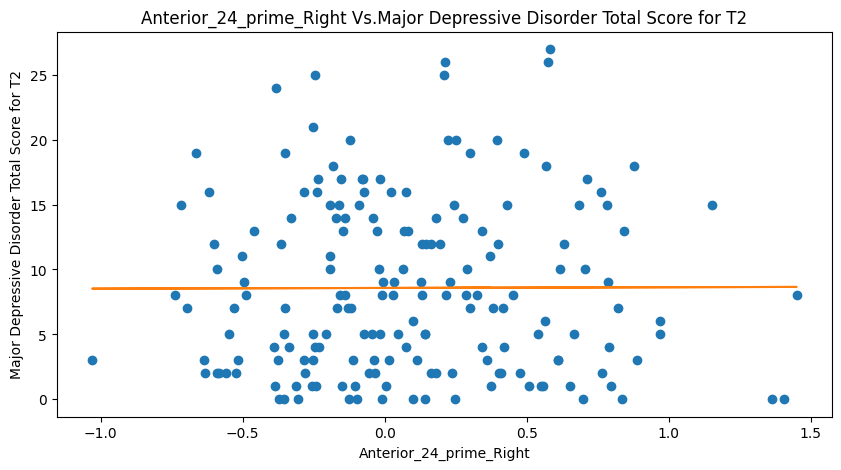

The Pearson's Correlation Co-efficient between Area_anterior_32_prime_Right and Major Depressive Disorder Total Score for T2= 0.10487740228845453 .


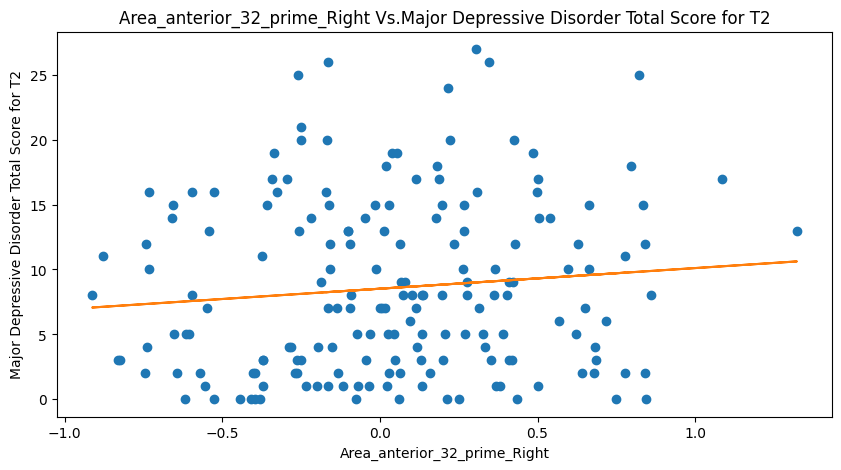

The Pearson's Correlation Co-efficient between Area_dorsal_32_Right and Major Depressive Disorder Total Score for T2= 0.027830684108260575 .


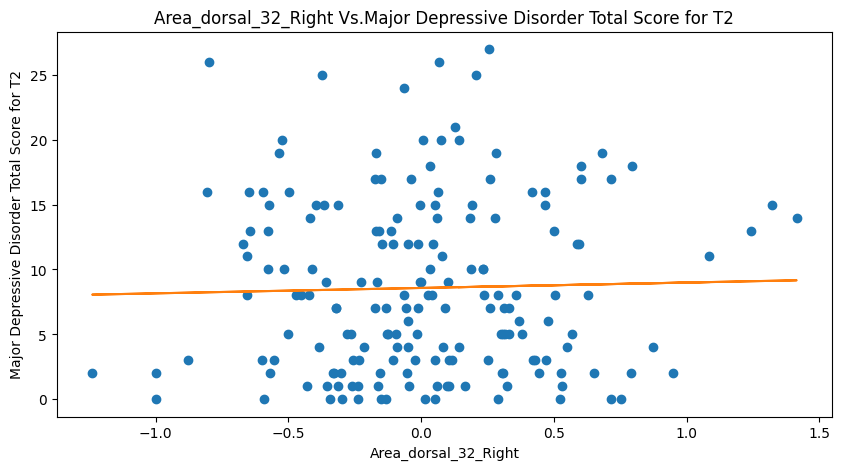

The Pearson's Correlation Co-efficient between Area_posterior_24_Right and Major Depressive Disorder Total Score for T2= 0.08186421294286218 .


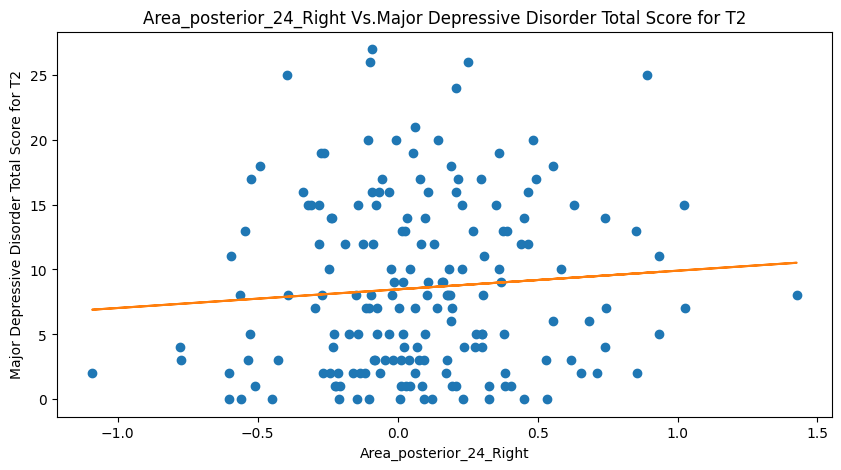

The Pearson's Correlation Co-efficient between Area_Posterior_24_prime_Right and Major Depressive Disorder Total Score for T2= -0.026757069096026084 .


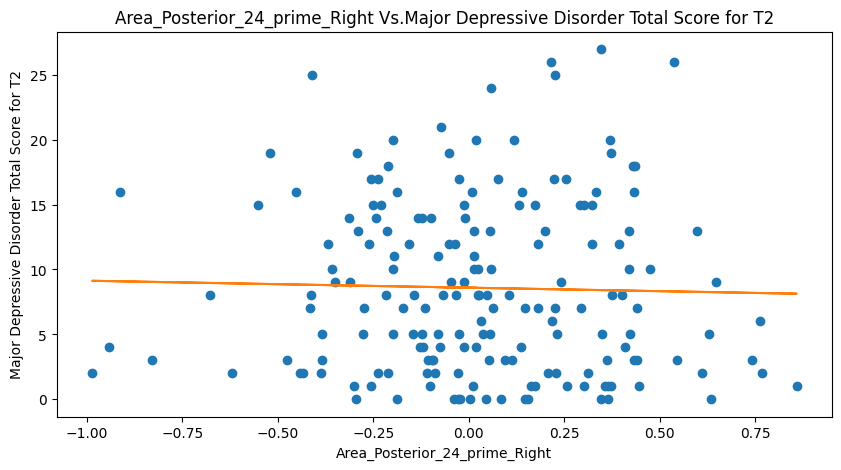

The Pearson's Correlation Co-efficient between Area_p32_Right and Major Depressive Disorder Total Score for T2= -0.06460501217094738 .


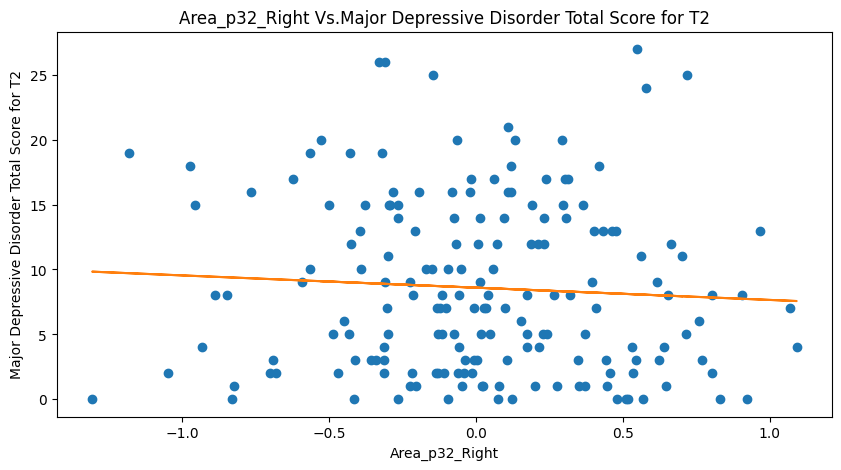

The Pearson's Correlation Co-efficient between Area_p32_prime_Right and Major Depressive Disorder Total Score for T2= 0.0035871212238574464 .


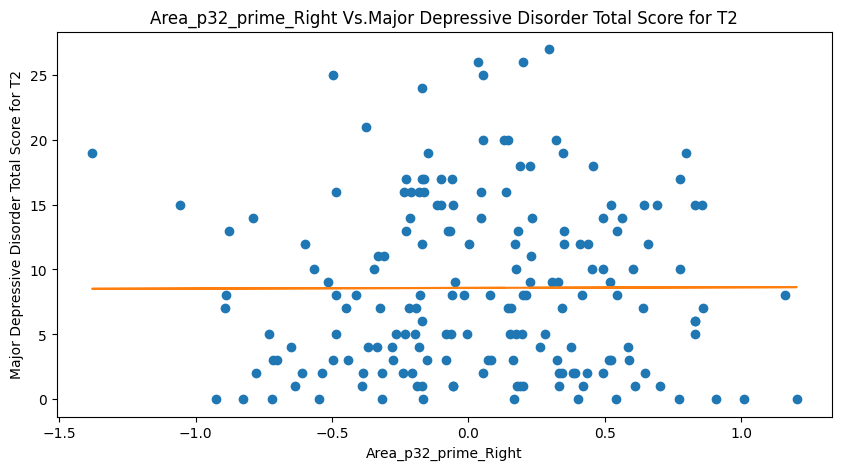

The Pearson's Correlation Co-efficient between Posterior_OFC_Complex_Right and Major Depressive Disorder Total Score for T2= 0.03326550033587464 .


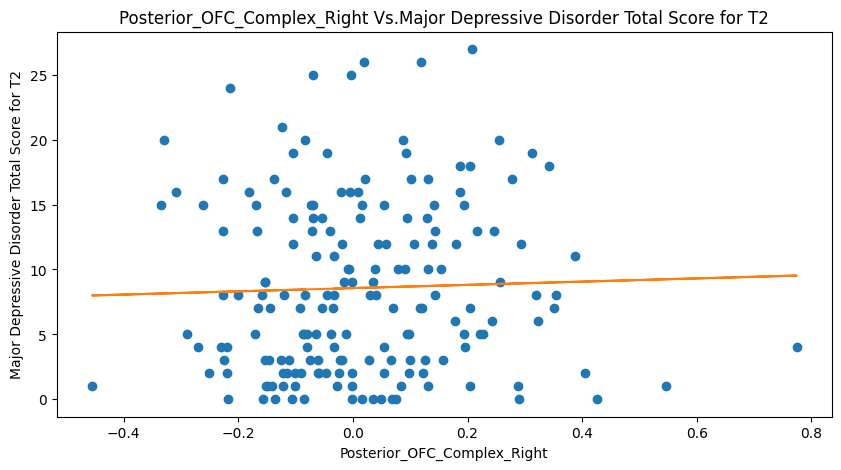

The Pearson's Correlation Co-efficient between Area_s32_Right and Major Depressive Disorder Total Score for T2= -0.11439202539452324 .


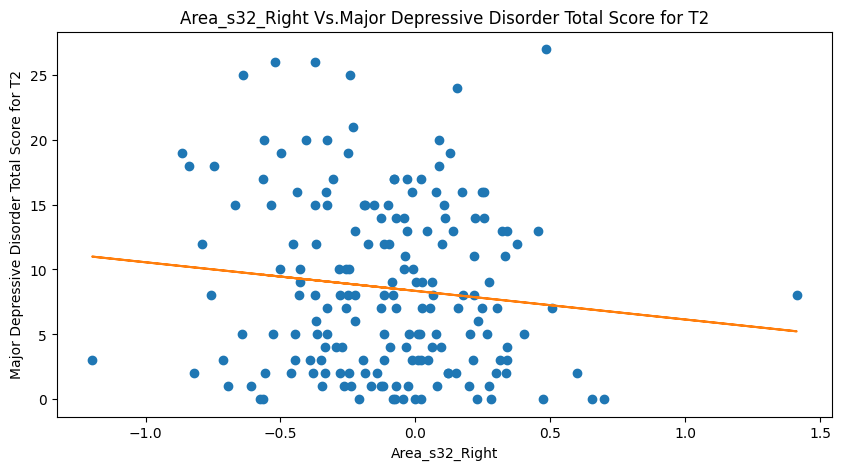

The Pearson's Correlation Co-efficient between Area_47l_(47_lateral)_Right and Major Depressive Disorder Total Score for T2= -0.05649321493060517 .


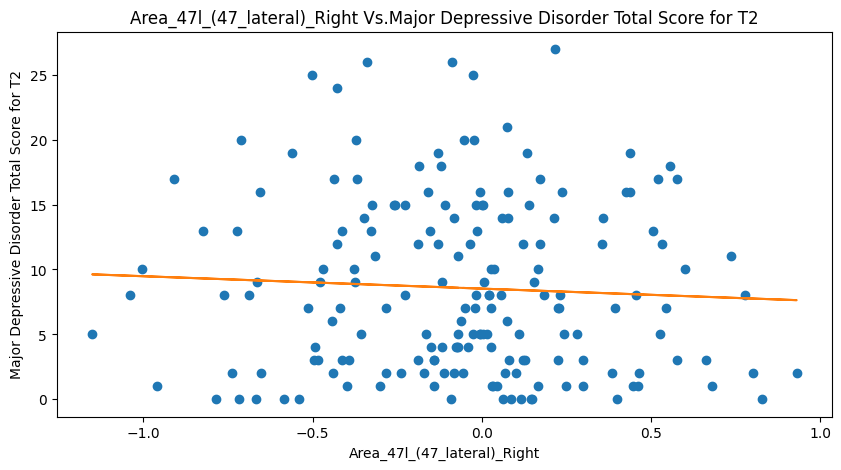

The Pearson's Correlation Co-efficient between Area_anterior_47r_Right and Major Depressive Disorder Total Score for T2= -0.011328972253235954 .


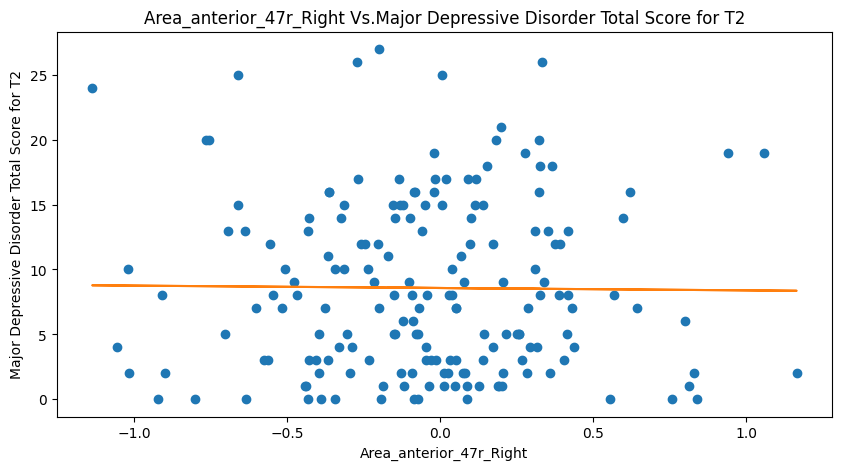

The Pearson's Correlation Co-efficient between Area_IFJa_Right and Major Depressive Disorder Total Score for T2= -0.011551516966234143 .


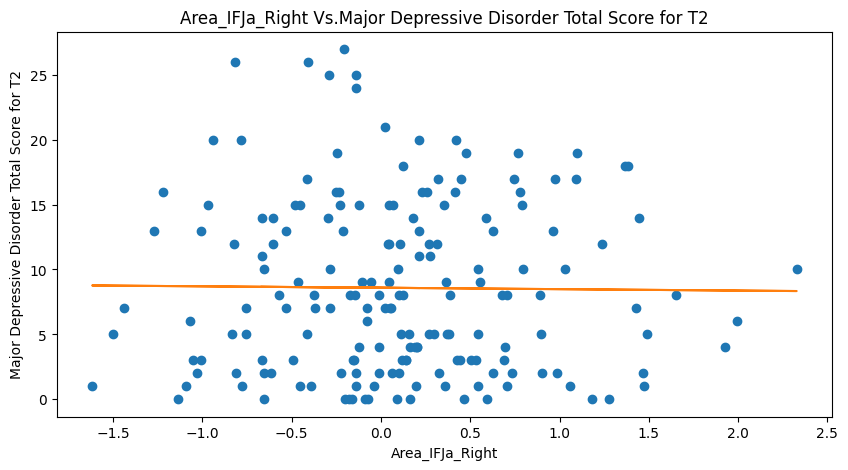

The Pearson's Correlation Co-efficient between Area_IFJp_Right and Major Depressive Disorder Total Score for T2= 0.0020257125332497215 .


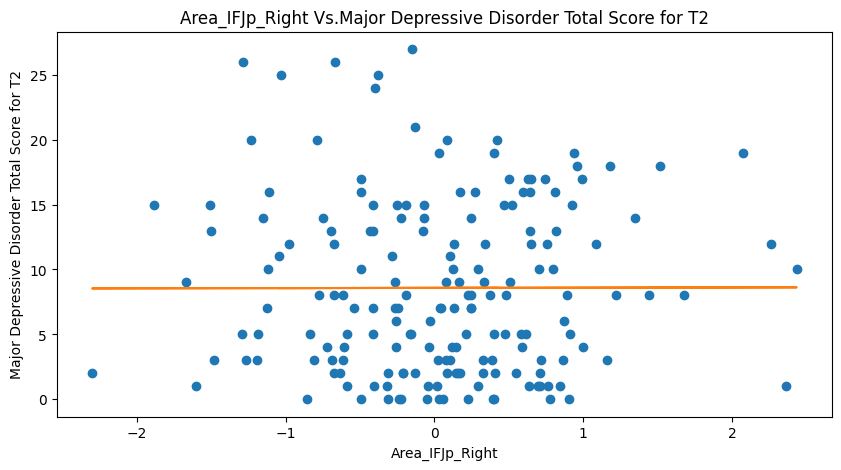

The Pearson's Correlation Co-efficient between Area_IFSa_Right and Major Depressive Disorder Total Score for T2= 0.039384095300743105 .


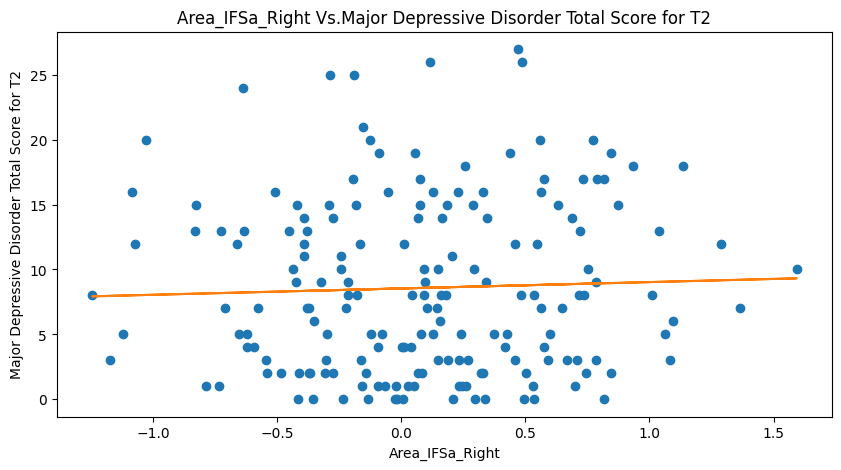

The Pearson's Correlation Co-efficient between Area_IFSp_Right and Major Depressive Disorder Total Score for T2= -0.06411230530267736 .


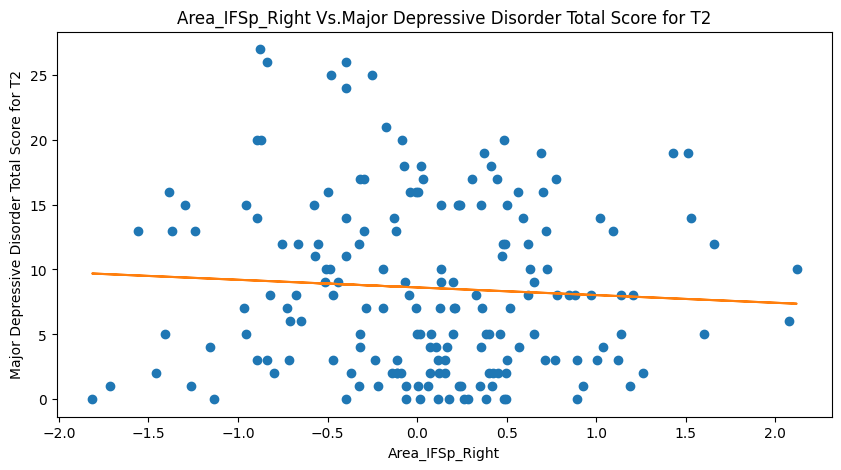

The Pearson's Correlation Co-efficient between Area_posterior_47r_Right and Major Depressive Disorder Total Score for T2= 0.028281141658053552 .


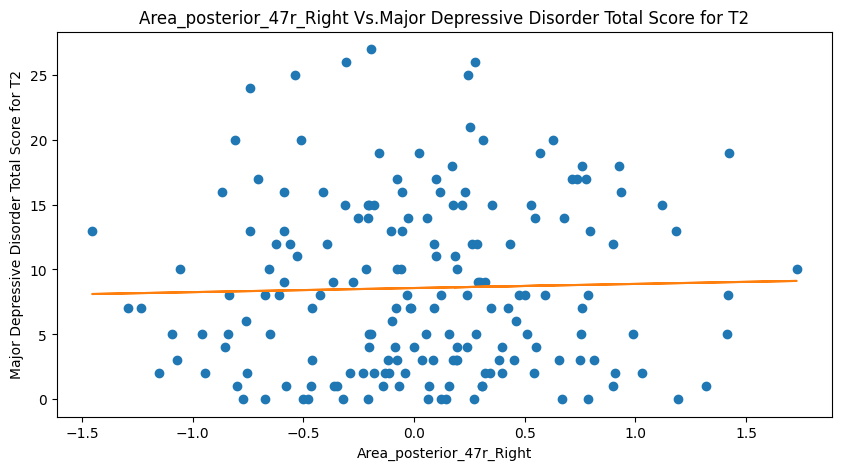

The Pearson's Correlation Co-efficient between Area_8B_Lateral_Right and Major Depressive Disorder Total Score for T2= -0.1496639772617073 .


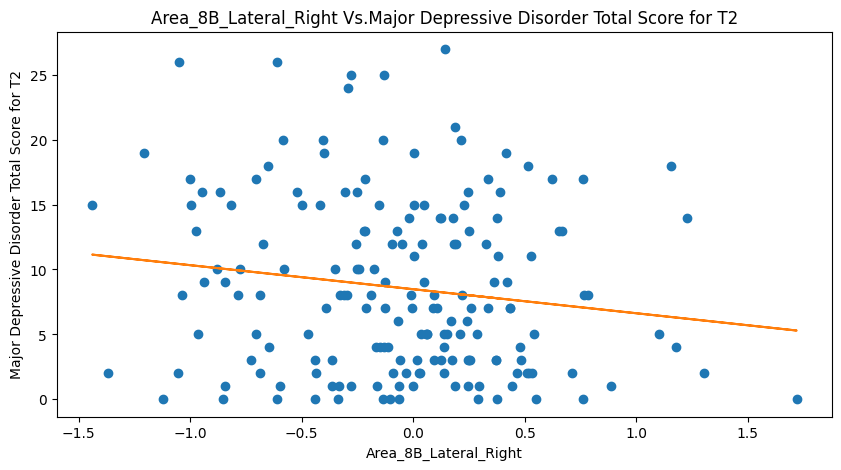

The Pearson's Correlation Co-efficient between Area_8C_Right and Major Depressive Disorder Total Score for T2= -0.11653203312334891 .


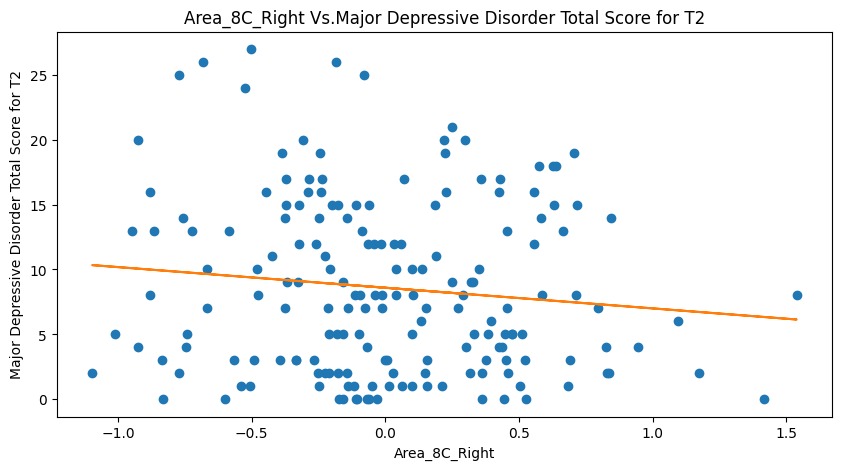

The Pearson's Correlation Co-efficient between Inferior_6-8_Transitional_Area_Right and Major Depressive Disorder Total Score for T2= -0.07725664752886391 .


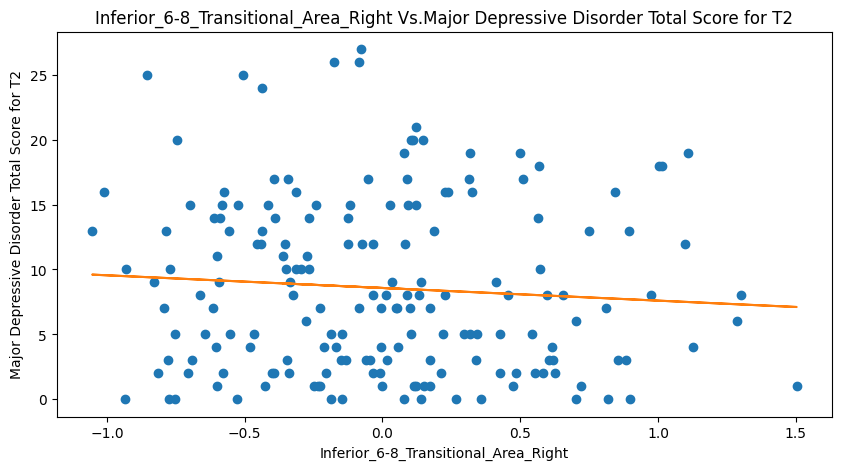

The Pearson's Correlation Co-efficient between Superior_6-8_Transitional_Area_Right and Major Depressive Disorder Total Score for T2= -0.09530598350597788 .


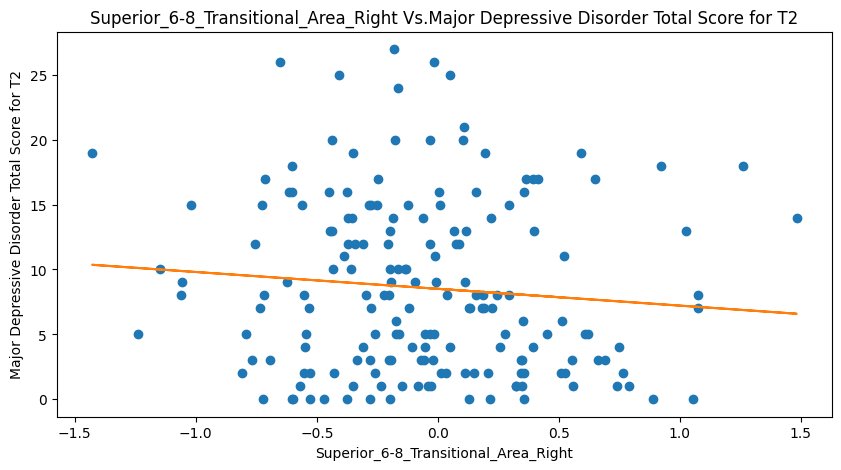

The Pearson's Correlation Co-efficient between Thalamus: Anteroventral Nucleus_Left and Major Depressive Disorder Total Score for T2= -0.0691497999047393 .


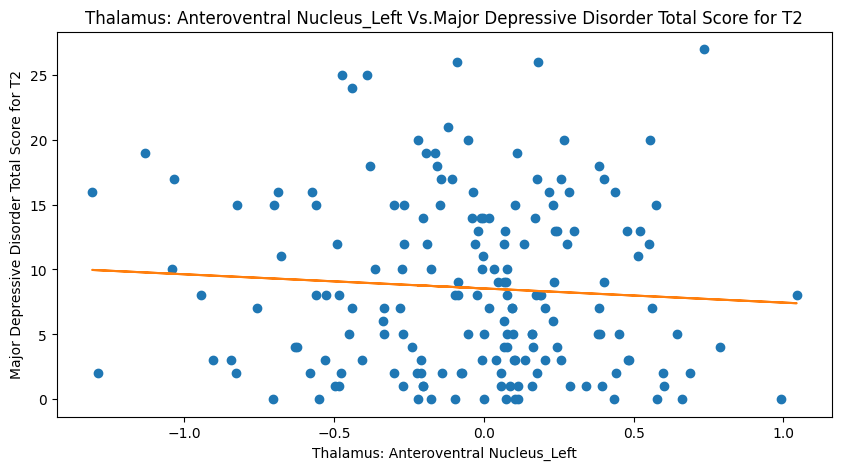

The Pearson's Correlation Co-efficient between Thalamus: Central medial_Left and Major Depressive Disorder Total Score for T2= -0.04295484489288909 .


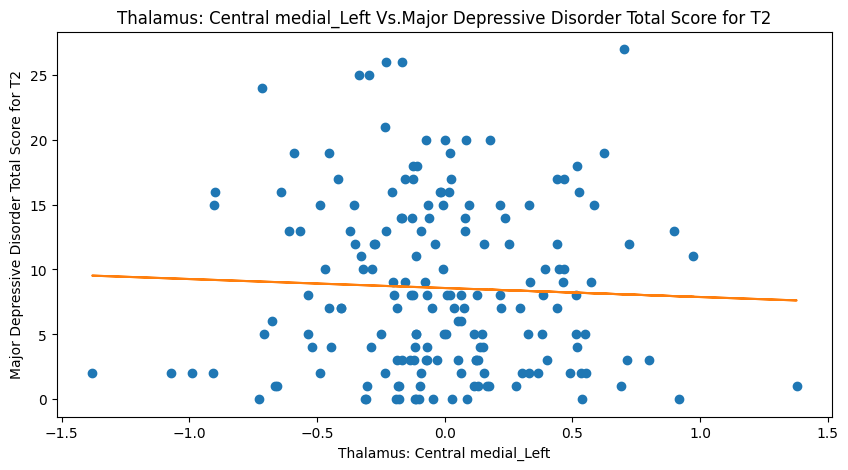

The Pearson's Correlation Co-efficient between Thalamus: Central lateral_Left and Major Depressive Disorder Total Score for T2= -0.03684431487845377 .


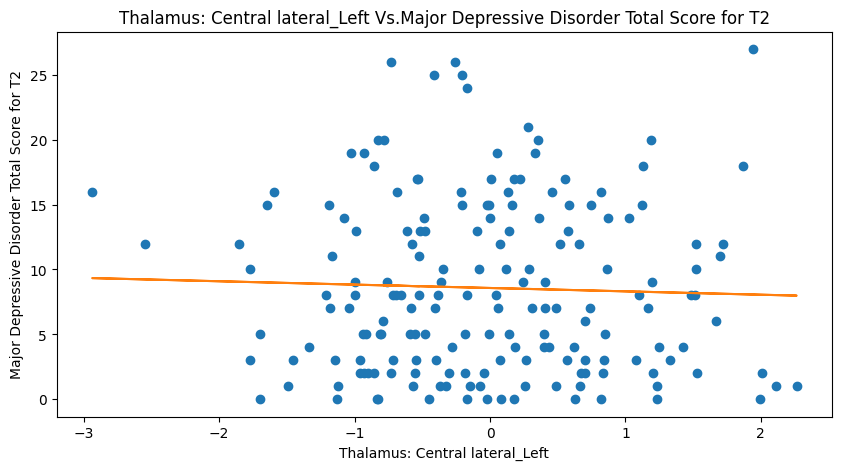

The Pearson's Correlation Co-efficient between Thalamus: Centralmedian_Left and Major Depressive Disorder Total Score for T2= -0.05495216690144087 .


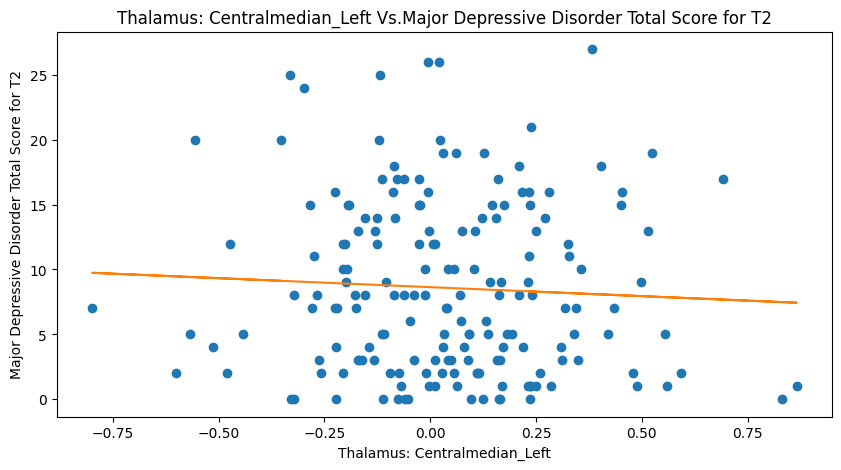

The Pearson's Correlation Co-efficient between Thalamus: Laterodorsal_Left and Major Depressive Disorder Total Score for T2= -0.05825379058716168 .


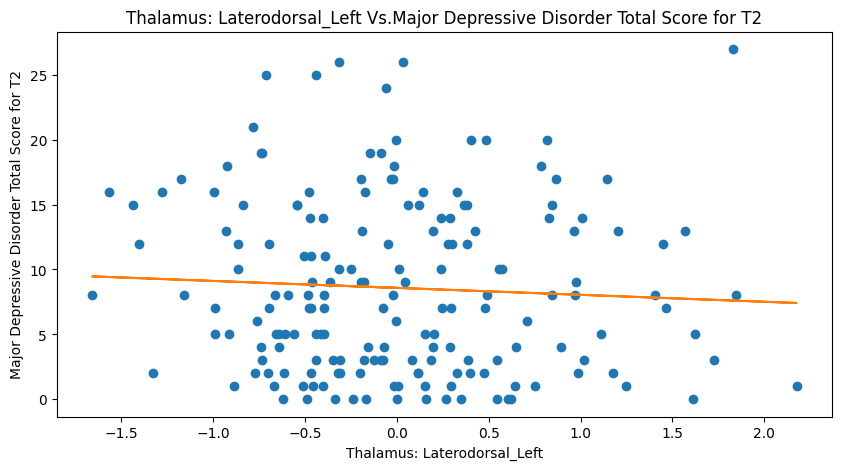

The Pearson's Correlation Co-efficient between Thalamus: Lateral Geniculate_Left and Major Depressive Disorder Total Score for T2= -0.14726787047375164 .


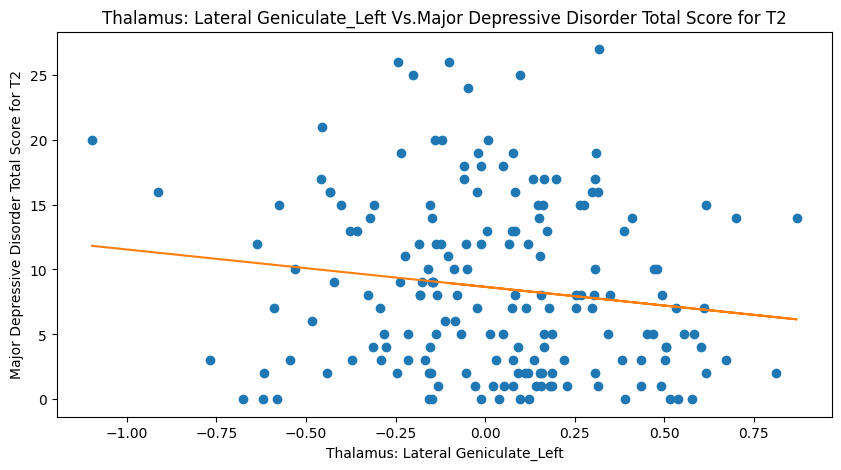

The Pearson's Correlation Co-efficient between Thalamus: Lateral Posterior_Left and Major Depressive Disorder Total Score for T2= -0.12578198839831525 .


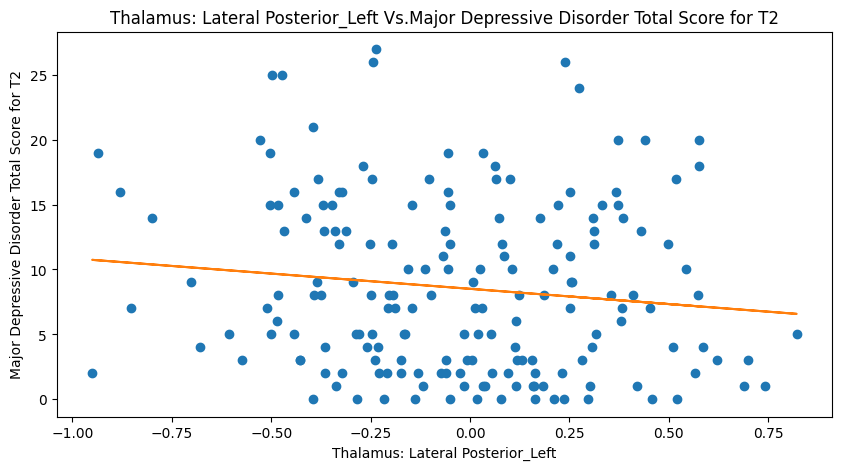

The Pearson's Correlation Co-efficient between Thalamus: Limitans Suprageniculate_Left and Major Depressive Disorder Total Score for T2= 0.053290066849540595 .


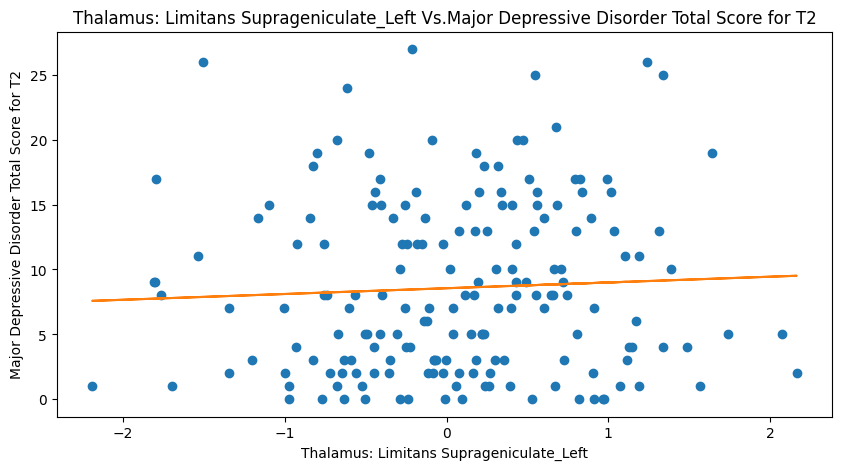

The Pearson's Correlation Co-efficient between Thalamus: Mediodorsolateral parvocellular_Left and Major Depressive Disorder Total Score for T2= -0.006357396168065524 .


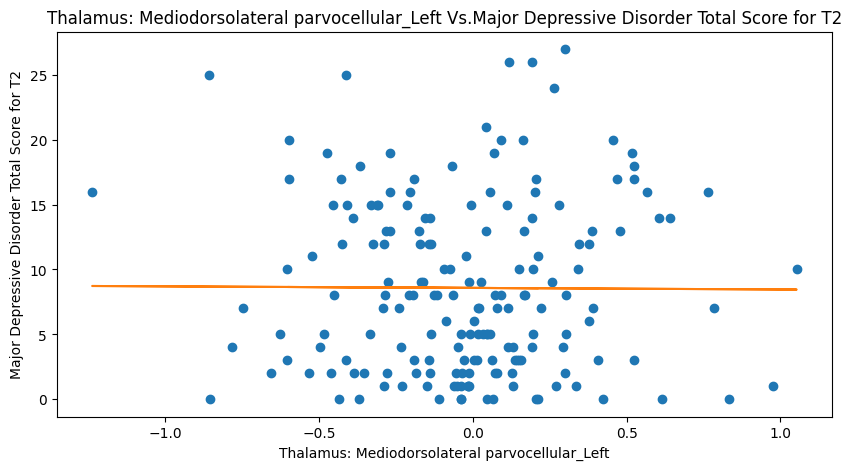

The Pearson's Correlation Co-efficient between Thalamus: Mediodorsomedial magnocellular_Left and Major Depressive Disorder Total Score for T2= -0.05854036986047045 .


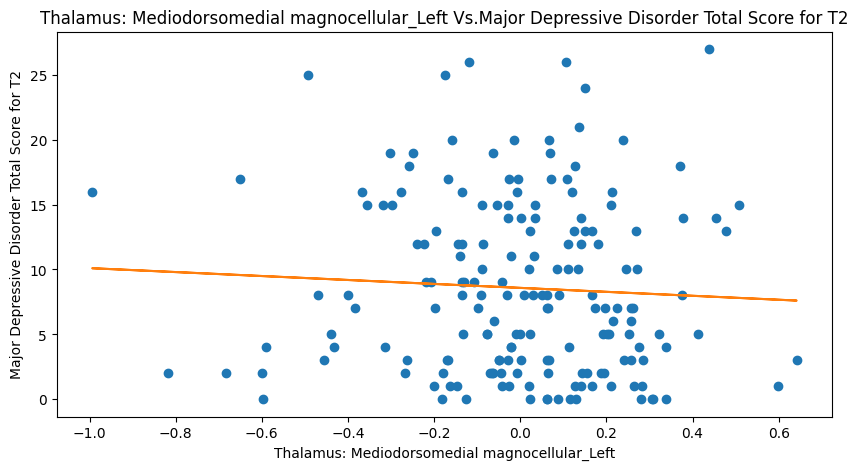

The Pearson's Correlation Co-efficient between Thalamus: Medial Geniculate_Left and Major Depressive Disorder Total Score for T2= -0.07835370091872251 .


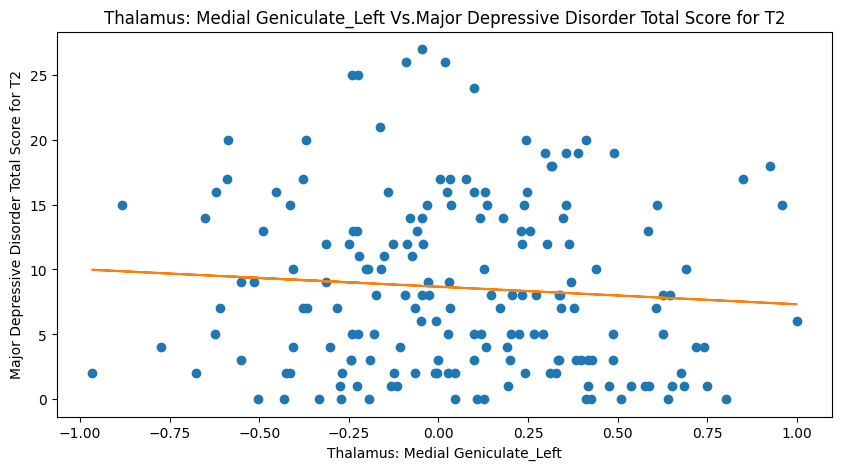

The Pearson's Correlation Co-efficient between Thalamus: Parafascicular_Left and Major Depressive Disorder Total Score for T2= 0.19725026025427556 .


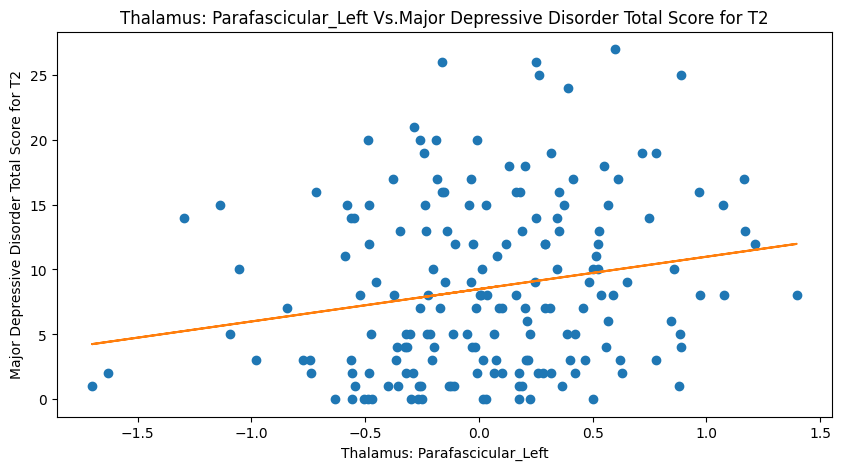

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar anterior_Left and Major Depressive Disorder Total Score for T2= -0.03238169924366228 .


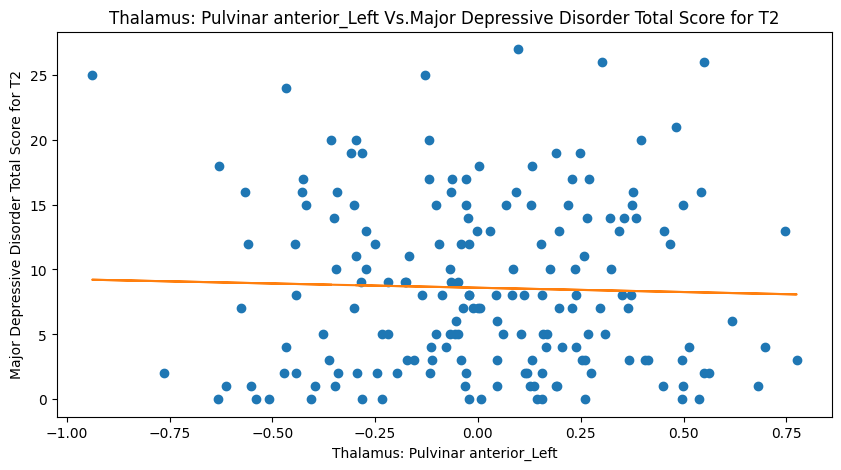

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar inferior_Left and Major Depressive Disorder Total Score for T2= -0.08501429870045654 .


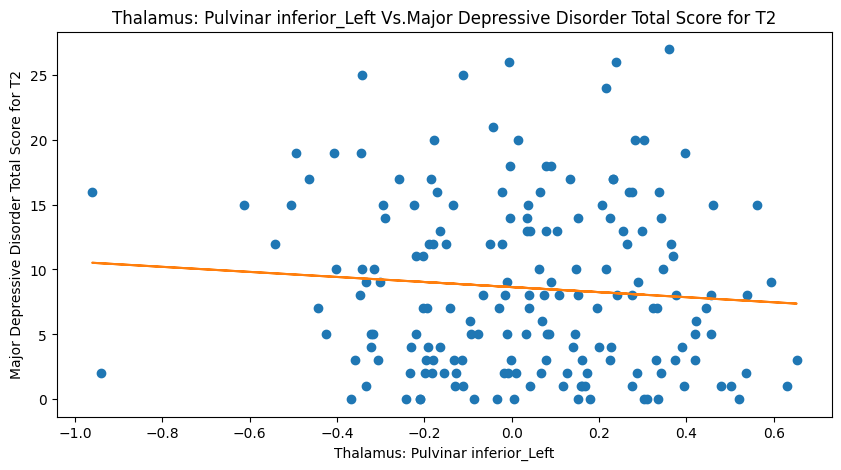

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar lateral_Left and Major Depressive Disorder Total Score for T2= 0.024857242975716235 .


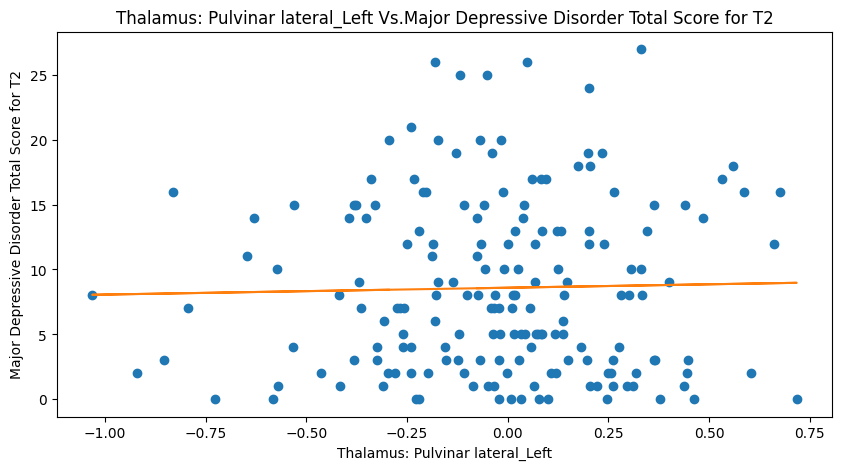

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar medial_Left and Major Depressive Disorder Total Score for T2= -0.008242021245182573 .


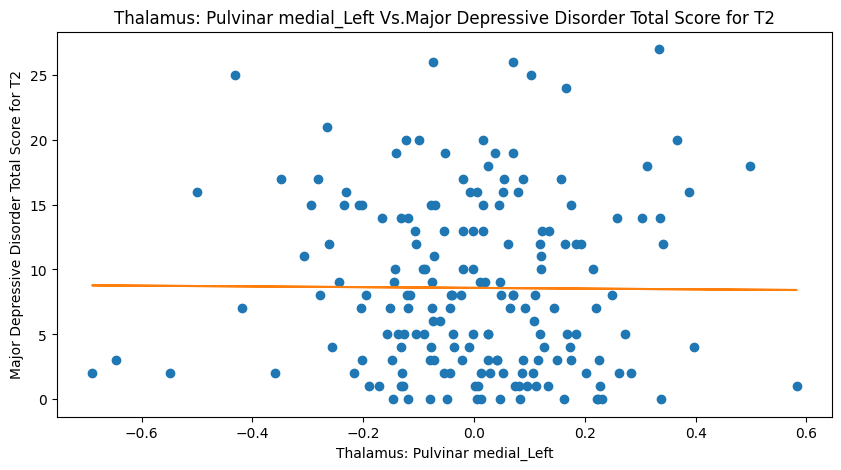

The Pearson's Correlation Co-efficient between Thalamus: Ventral Anterior_Left and Major Depressive Disorder Total Score for T2= -0.0782912702995601 .


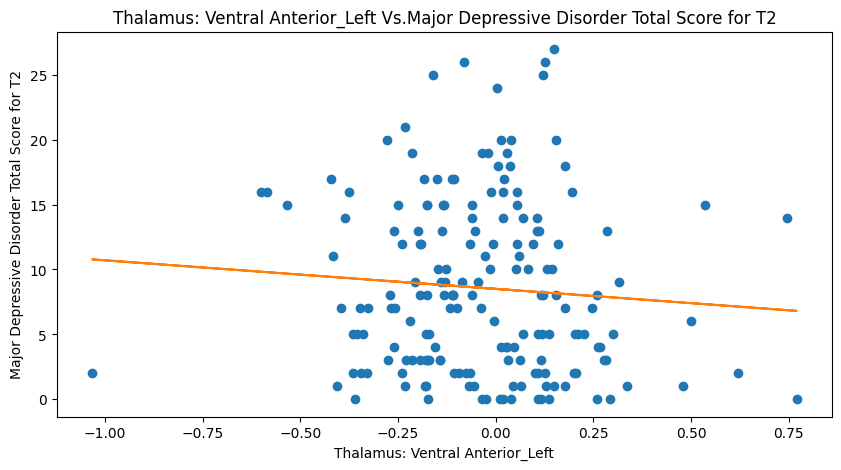

The Pearson's Correlation Co-efficient between Thalamus: Ventral Lateral Anterior_Left and Major Depressive Disorder Total Score for T2= 0.032841228853909804 .


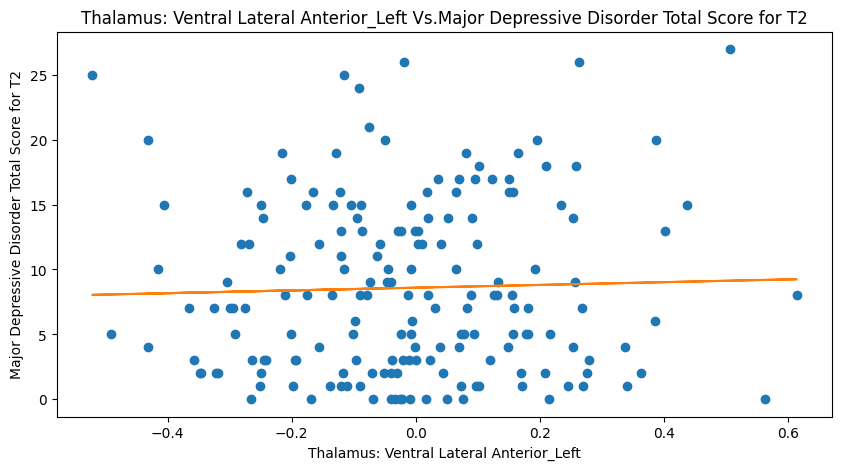

The Pearson's Correlation Co-efficient between Thalamus: Ventral Lateral Posterior_Left and Major Depressive Disorder Total Score for T2= -0.08001119975728974 .


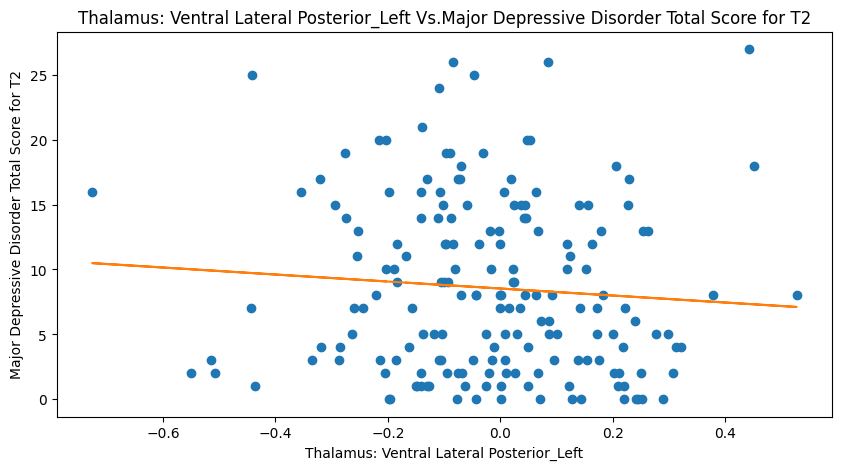

The Pearson's Correlation Co-efficient between Thalamus: Ventral posterolateral_Left and Major Depressive Disorder Total Score for T2= -0.008098859759432489 .


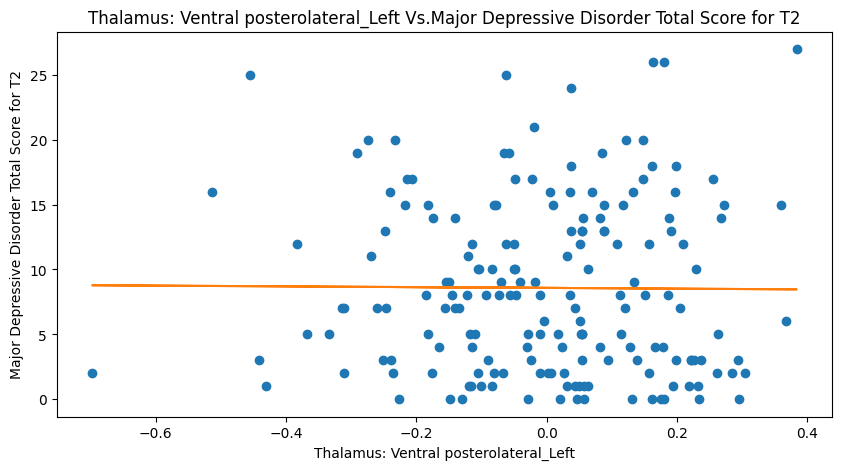

The Pearson's Correlation Co-efficient between Putamen_Left and Major Depressive Disorder Total Score for T2= 0.03455946608066994 .


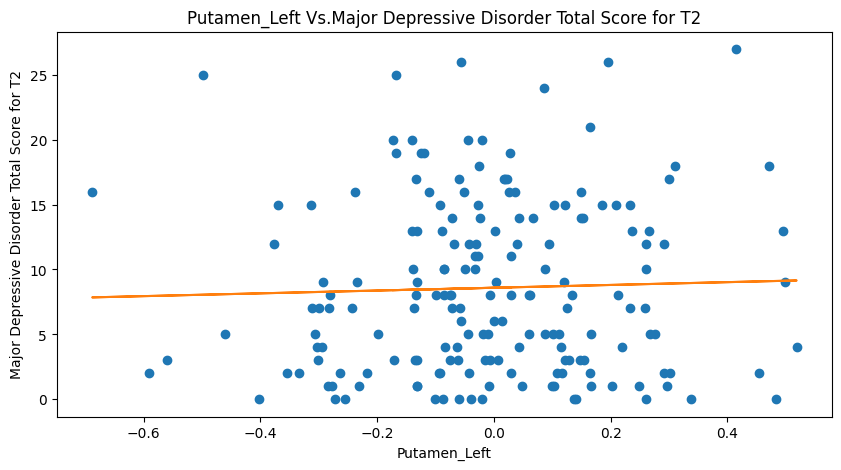

The Pearson's Correlation Co-efficient between Caudate_Left and Major Depressive Disorder Total Score for T2= -0.01568743010398406 .


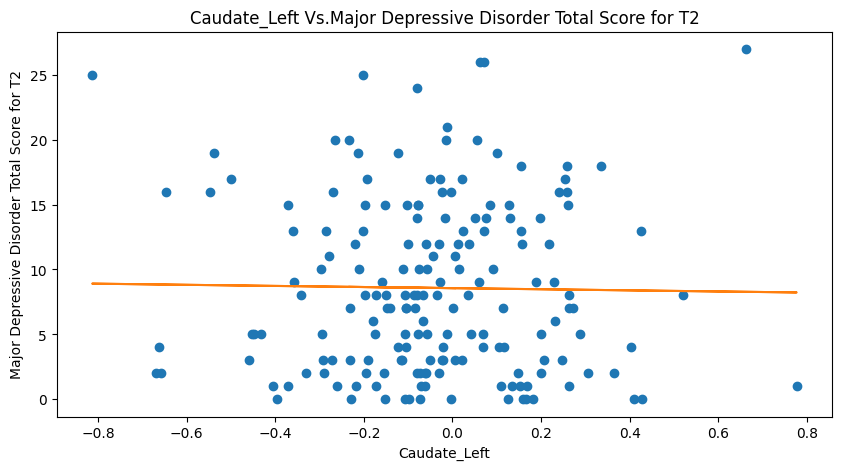

The Pearson's Correlation Co-efficient between Nucleus Accumbens_Left and Major Depressive Disorder Total Score for T2= -0.015128174496757091 .


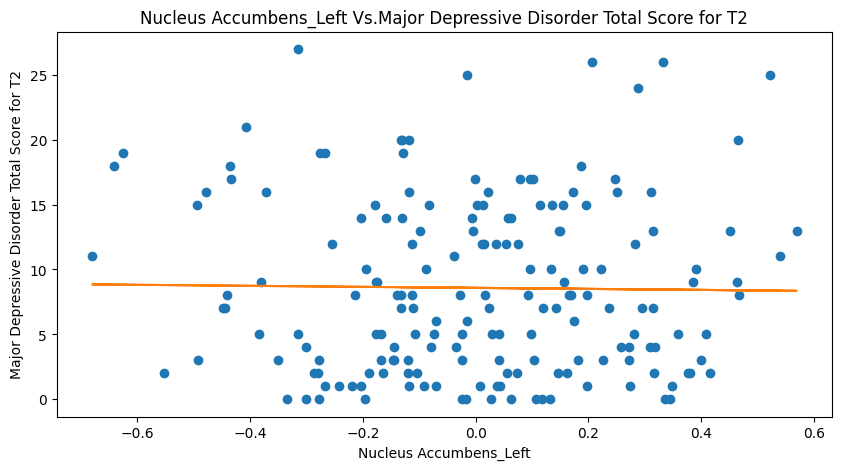

The Pearson's Correlation Co-efficient between Amygdala_Left and Major Depressive Disorder Total Score for T2= -0.12963876699784338 .


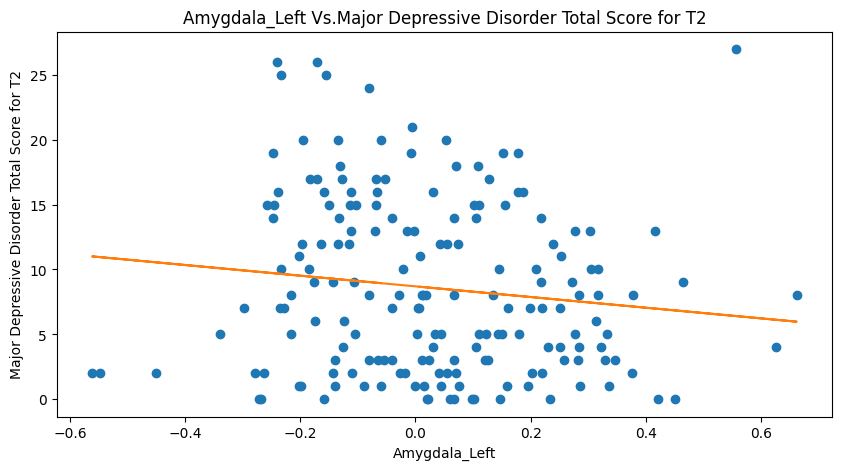

The Pearson's Correlation Co-efficient between Substantia nigra pars compacta_Left and Major Depressive Disorder Total Score for T2= -0.04852649024106498 .


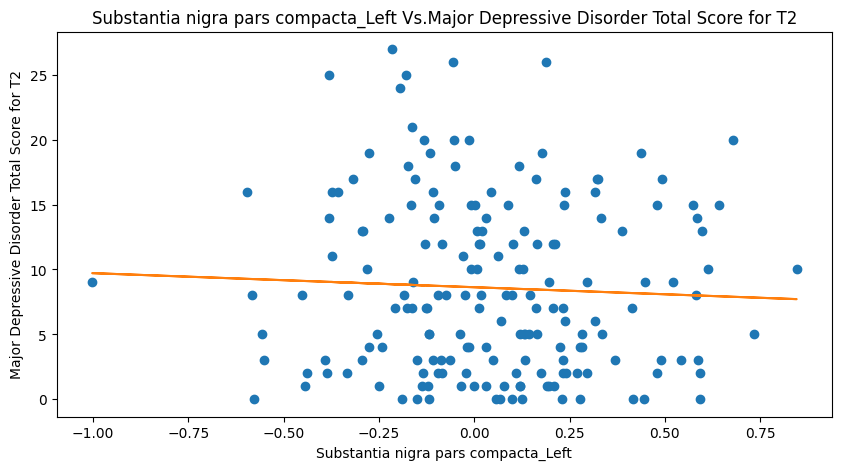

The Pearson's Correlation Co-efficient between Ventral tegmental area_Left and Major Depressive Disorder Total Score for T2= 0.05855943298422616 .


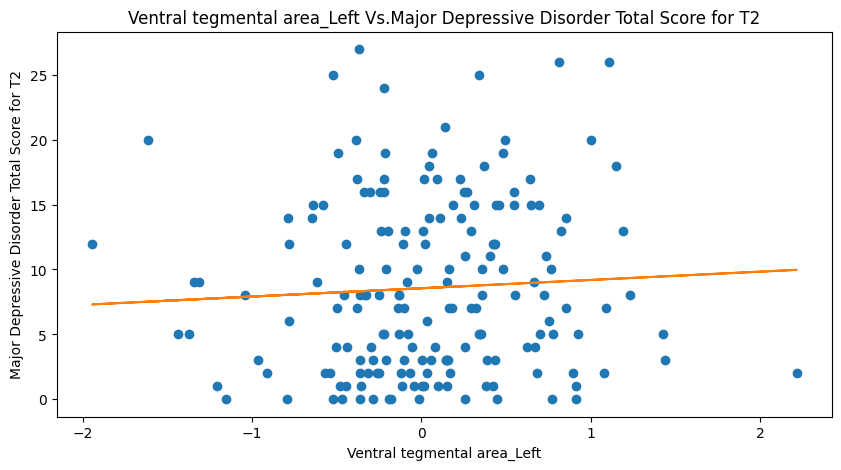

The Pearson's Correlation Co-efficient between Mammillary bodies_Left and Major Depressive Disorder Total Score for T2= -0.006435078312994268 .


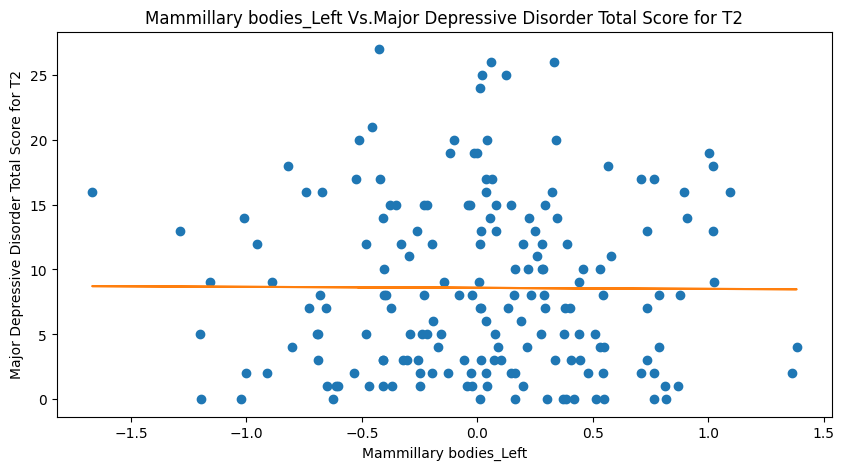

The Pearson's Correlation Co-efficient between Septal nuclei_Left and Major Depressive Disorder Total Score for T2= -0.1433141602286424 .


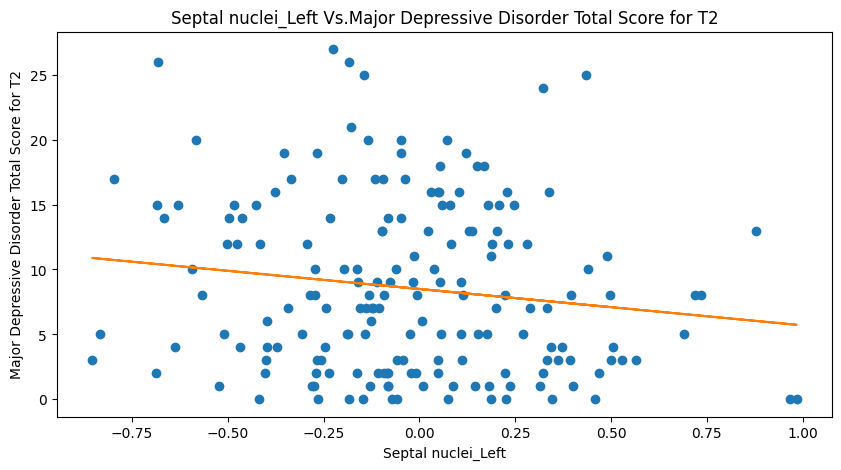

The Pearson's Correlation Co-efficient between Nucleus basalis_Left and Major Depressive Disorder Total Score for T2= -0.17034878845808935 .


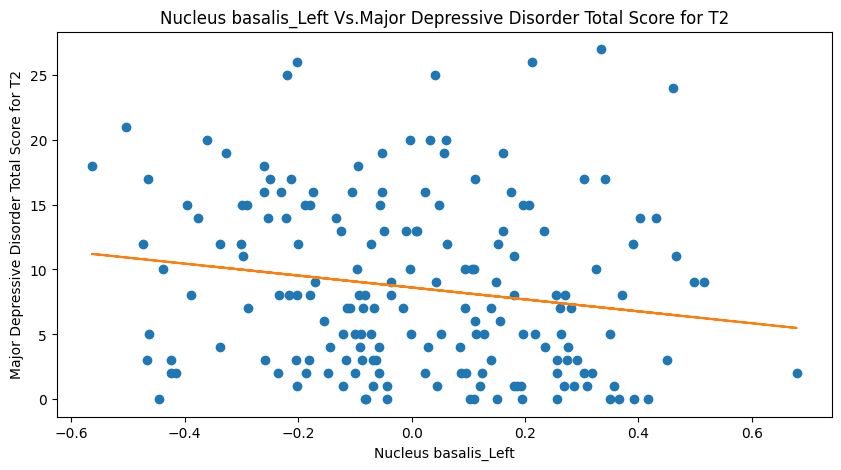

The Pearson's Correlation Co-efficient between Thalamus: Anteroventral Nucleus_Right and Major Depressive Disorder Total Score for T2= 0.03229012173203 .


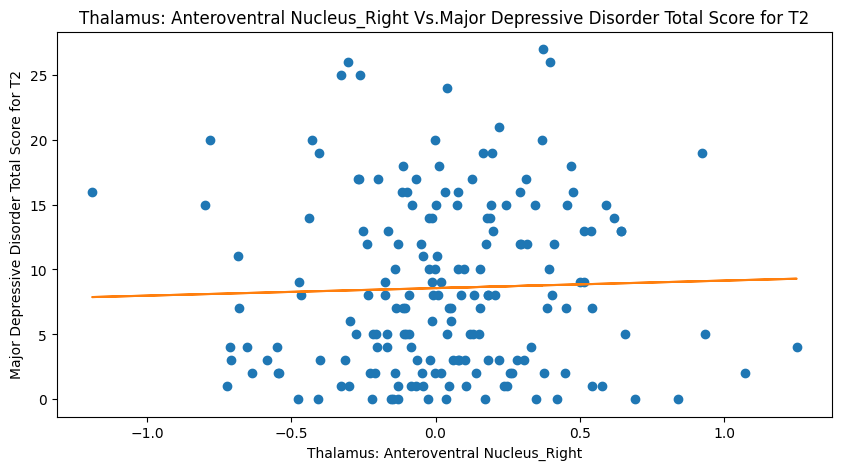

The Pearson's Correlation Co-efficient between Thalamus: Central medial_Right and Major Depressive Disorder Total Score for T2= 0.006008081851873836 .


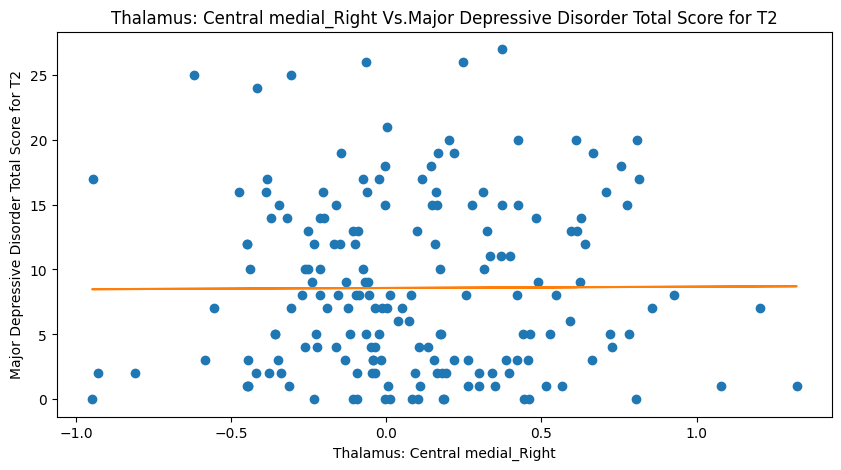

The Pearson's Correlation Co-efficient between Thalamus: Central lateral_Right and Major Depressive Disorder Total Score for T2= 0.07755893401066026 .


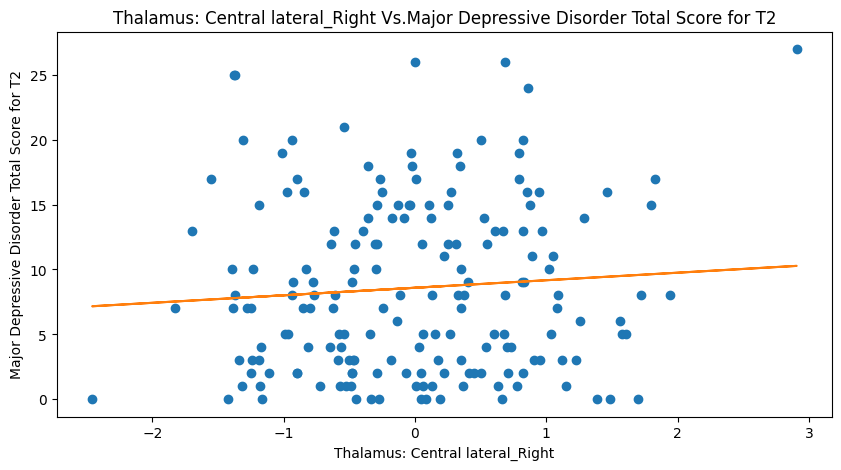

The Pearson's Correlation Co-efficient between Thalamus: Centralmedian_Right and Major Depressive Disorder Total Score for T2= -0.014503004371798946 .


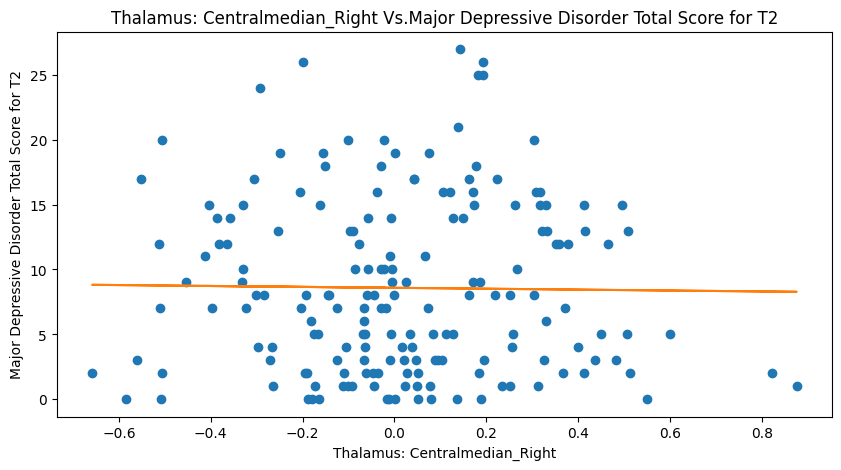

The Pearson's Correlation Co-efficient between Thalamus: Laterodorsal_Right and Major Depressive Disorder Total Score for T2= 0.0774654557185607 .


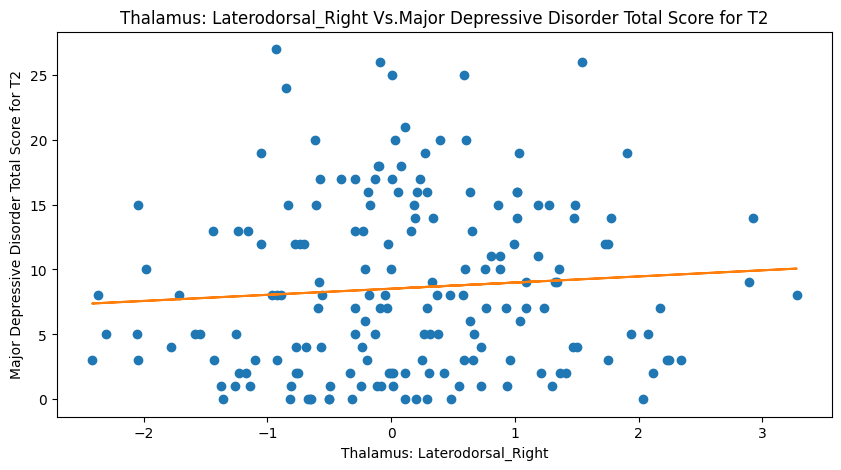

The Pearson's Correlation Co-efficient between Thalamus: Lateral Geniculate_Right and Major Depressive Disorder Total Score for T2= -0.05129406943754079 .


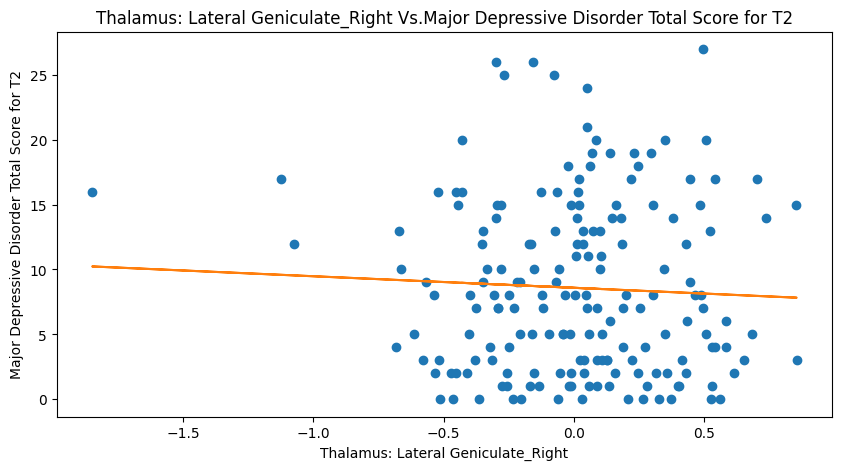

The Pearson's Correlation Co-efficient between Thalamus: Lateral Posterior_Right and Major Depressive Disorder Total Score for T2= -0.009541854750995981 .


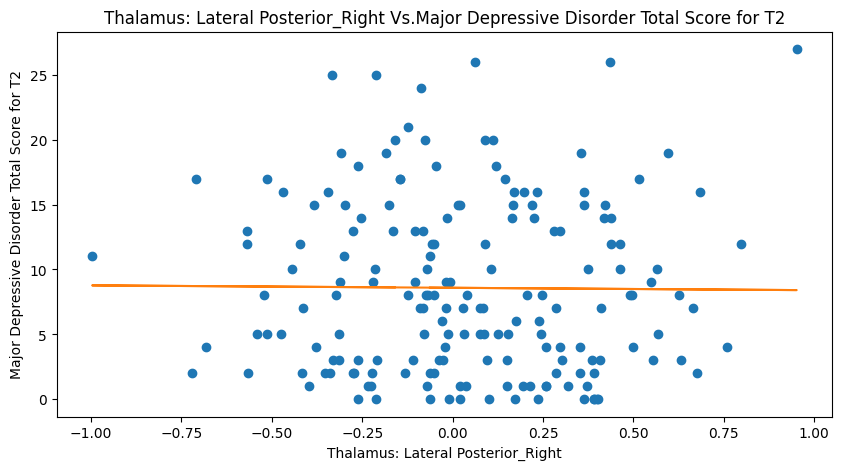

The Pearson's Correlation Co-efficient between Thalamus: Limitans Suprageniculate_Right and Major Depressive Disorder Total Score for T2= 0.005492041999483143 .


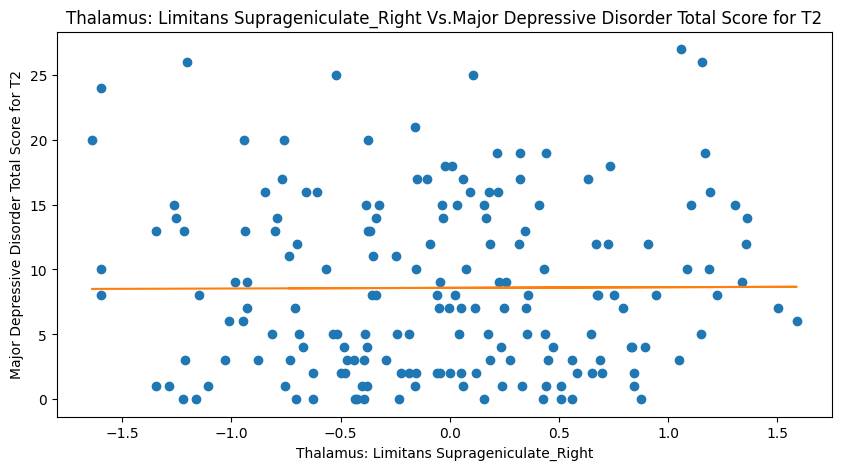

The Pearson's Correlation Co-efficient between Thalamus: Mediodorsolateral parvocellular_Right and Major Depressive Disorder Total Score for T2= -0.009354537106011147 .


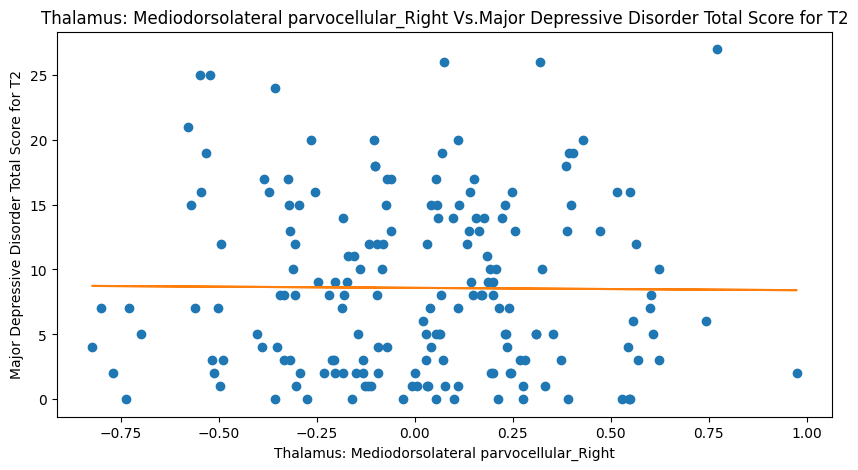

The Pearson's Correlation Co-efficient between Thalamus: Mediodorsomedial magnocellular_Right and Major Depressive Disorder Total Score for T2= -0.05672194020550019 .


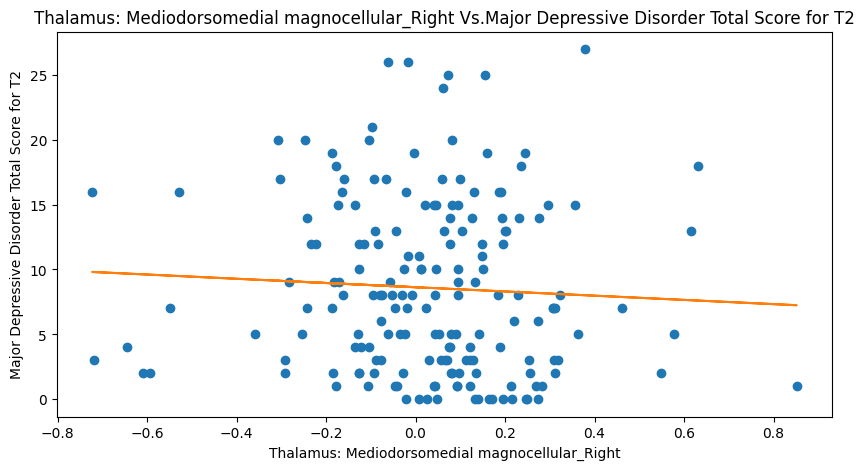

The Pearson's Correlation Co-efficient between Thalamus: Medial Geniculate_Right and Major Depressive Disorder Total Score for T2= 0.15298642842065682 .


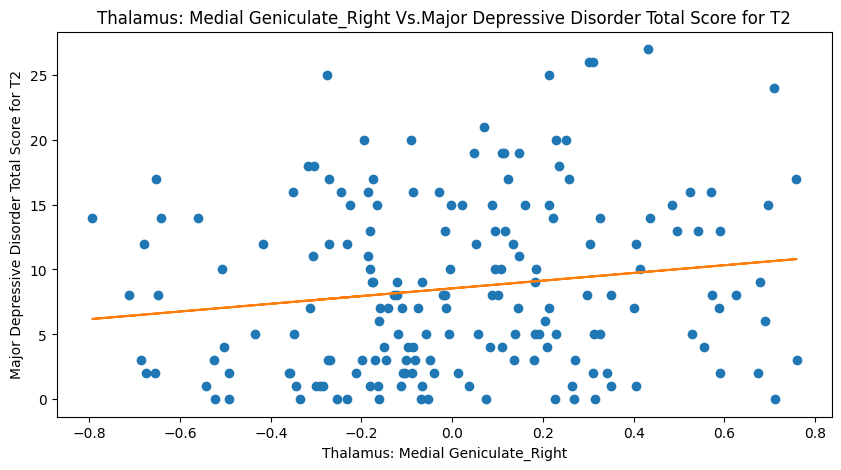

The Pearson's Correlation Co-efficient between Thalamus: Parafascicular_Right and Major Depressive Disorder Total Score for T2= 0.026585398031537956 .


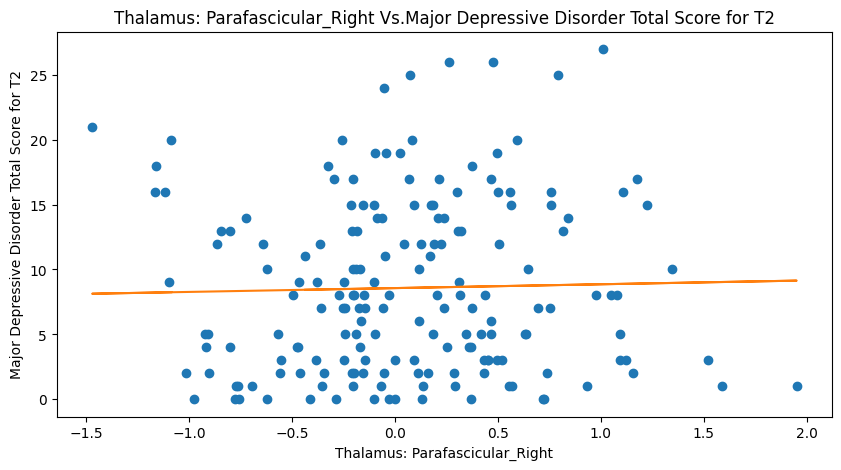

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar anterior_Right and Major Depressive Disorder Total Score for T2= -0.08416684533440048 .


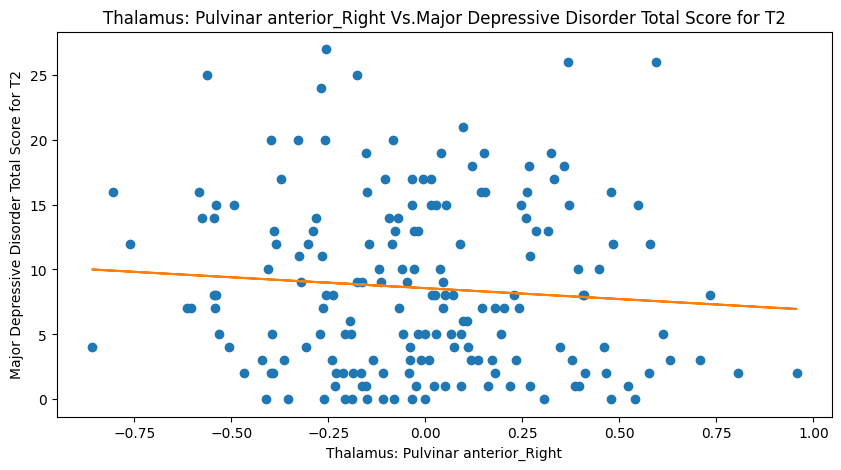

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar inferior_Right and Major Depressive Disorder Total Score for T2= 0.0016503927891779327 .


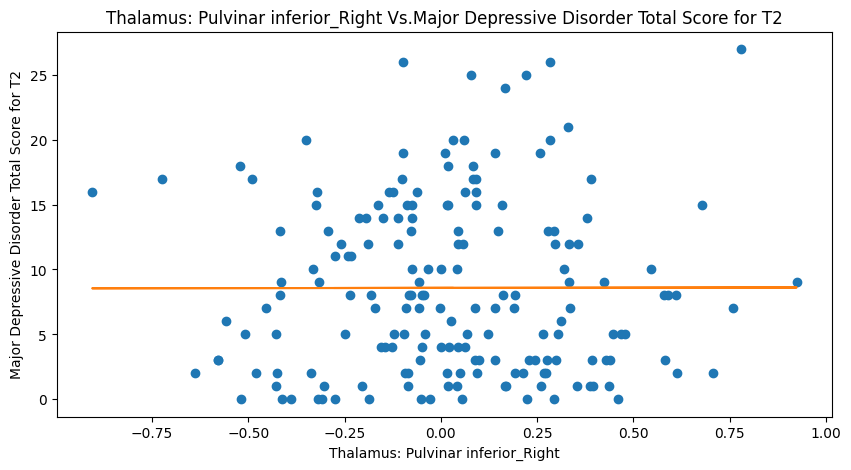

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar lateral_Right and Major Depressive Disorder Total Score for T2= -0.06277291342784386 .


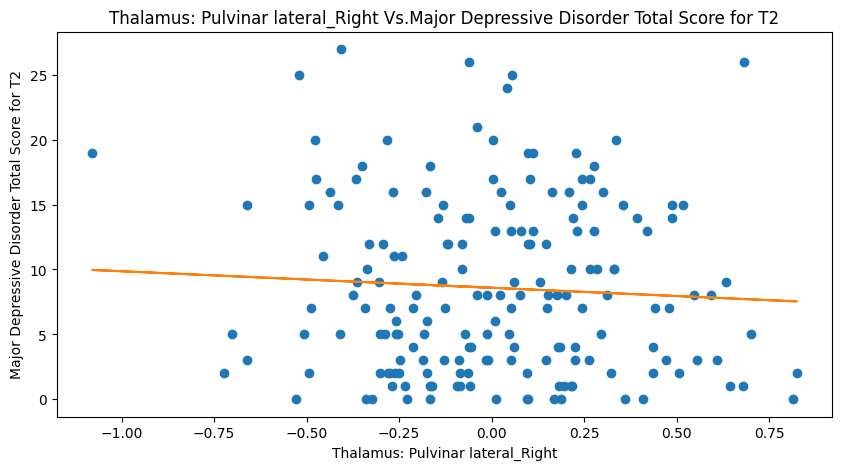

The Pearson's Correlation Co-efficient between Thalamus: Pulvinar medial_Right and Major Depressive Disorder Total Score for T2= -0.012459055543166446 .


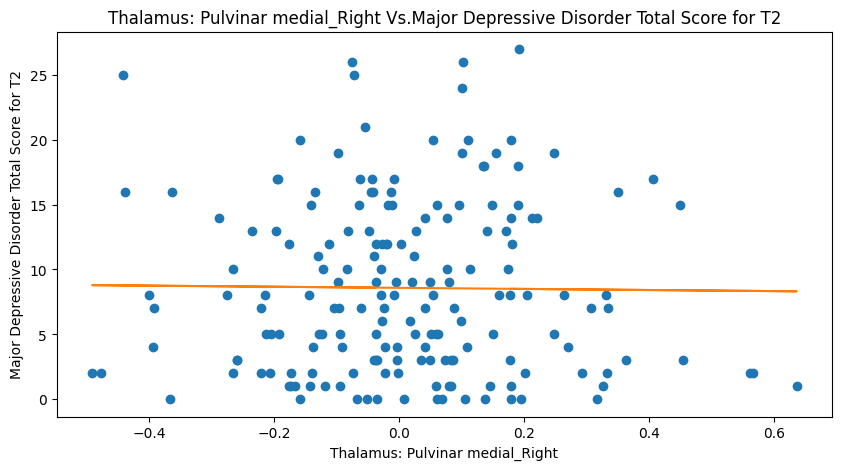

The Pearson's Correlation Co-efficient between Thalamus: Ventral Anterior_Right and Major Depressive Disorder Total Score for T2= 0.010386472121990842 .


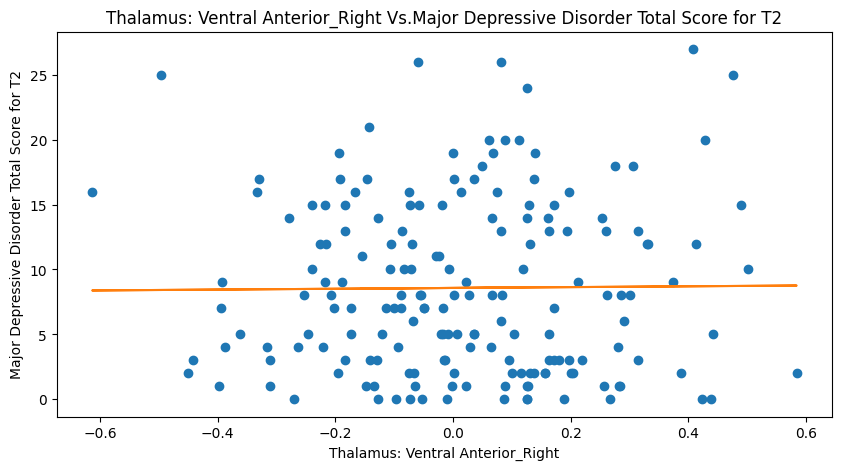

The Pearson's Correlation Co-efficient between Thalamus: Ventral Lateral Anterior_Right and Major Depressive Disorder Total Score for T2= 0.033609353262701404 .


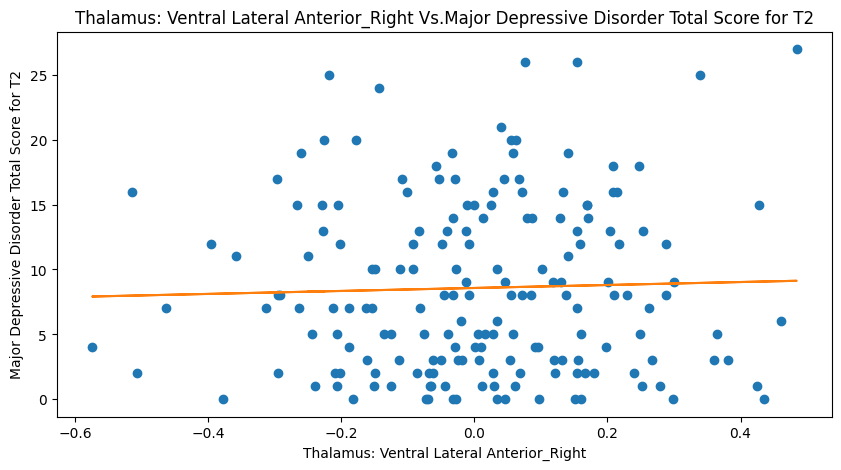

The Pearson's Correlation Co-efficient between Thalamus: Ventral Lateral Posterior_Right and Major Depressive Disorder Total Score for T2= -0.02002775679540428 .


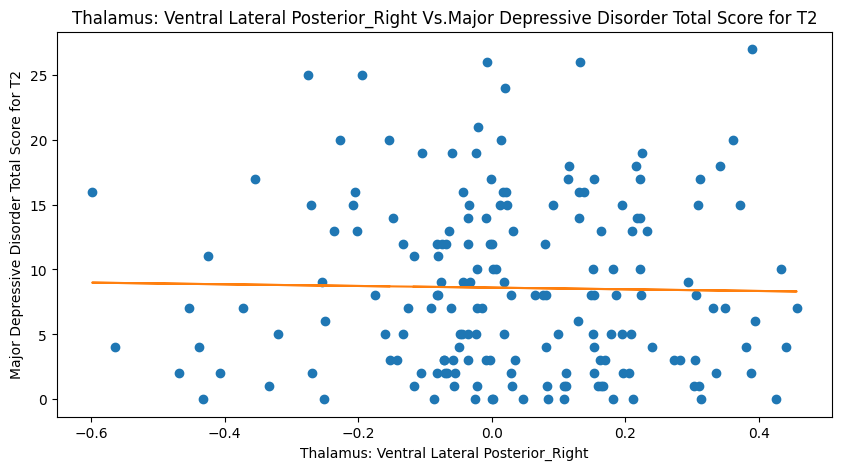

The Pearson's Correlation Co-efficient between Thalamus: Ventral posterolateral_Right and Major Depressive Disorder Total Score for T2= -0.06977690937309314 .


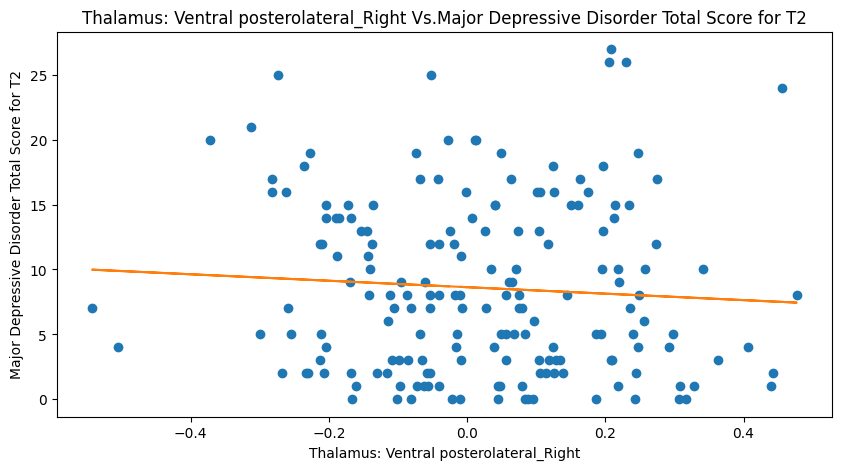

The Pearson's Correlation Co-efficient between Putamen_Right and Major Depressive Disorder Total Score for T2= -0.007360873188172856 .


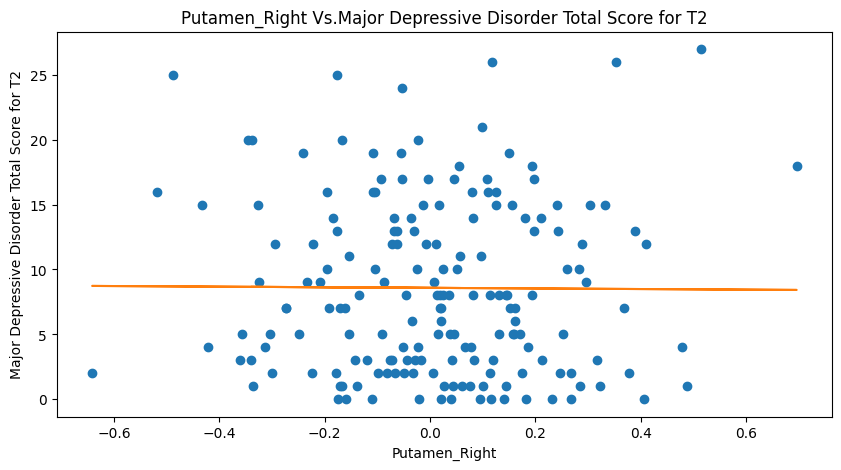

The Pearson's Correlation Co-efficient between Caudate_Right and Major Depressive Disorder Total Score for T2= 0.019332618708717983 .


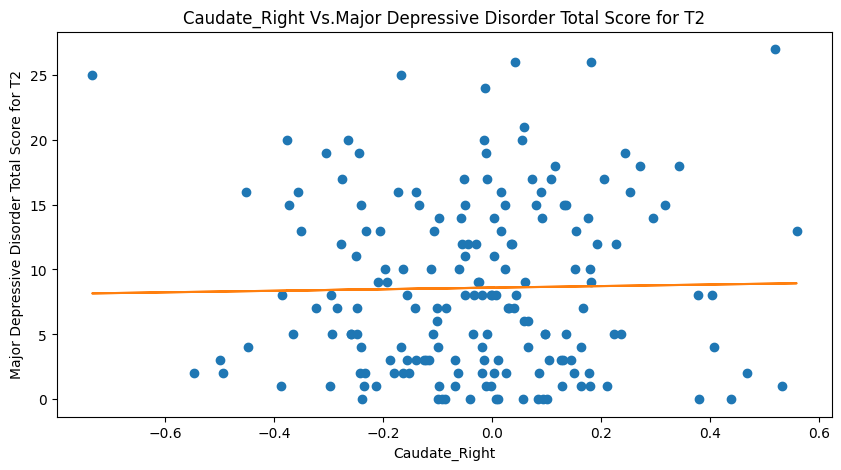

The Pearson's Correlation Co-efficient between Nucleus Accumbens_Right and Major Depressive Disorder Total Score for T2= -0.11613637768080101 .


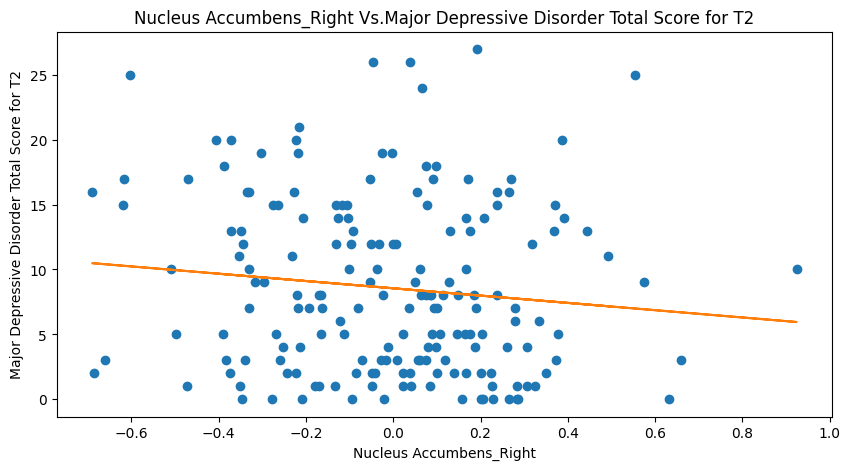

The Pearson's Correlation Co-efficient between Amygdala_Right and Major Depressive Disorder Total Score for T2= -0.14008842866933172 .


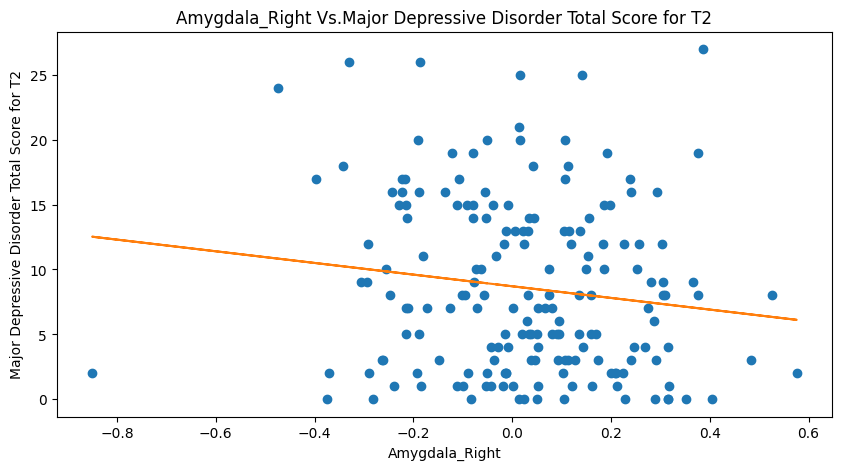

The Pearson's Correlation Co-efficient between Substantia nigra pars compacta_Right and Major Depressive Disorder Total Score for T2= 0.034734188967218714 .


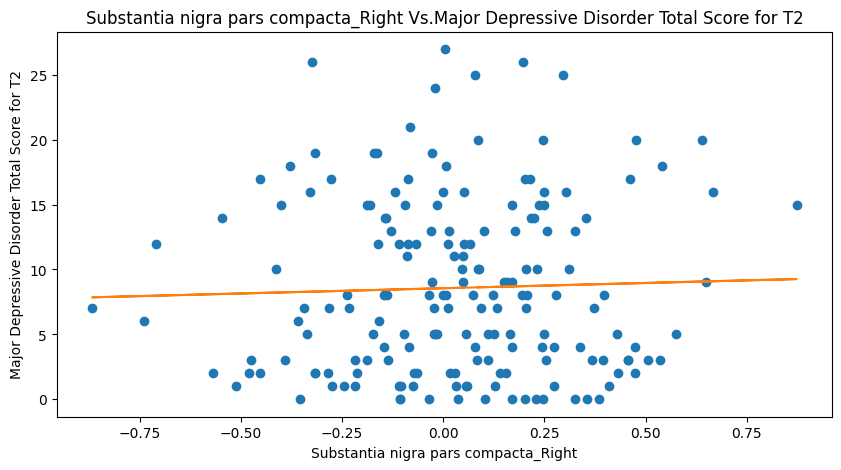

The Pearson's Correlation Co-efficient between Ventral tegmental area_Right and Major Depressive Disorder Total Score for T2= 0.09301333380622769 .


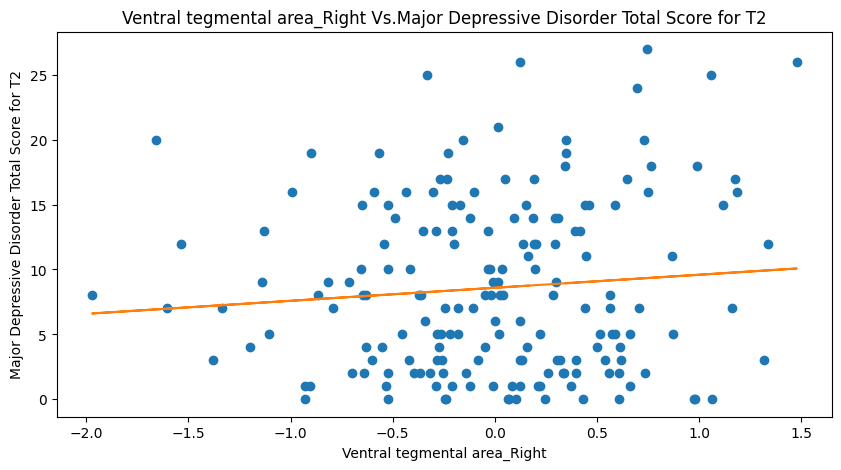

The Pearson's Correlation Co-efficient between Mammillary bodies_Right and Major Depressive Disorder Total Score for T2= -0.0571111159556998 .


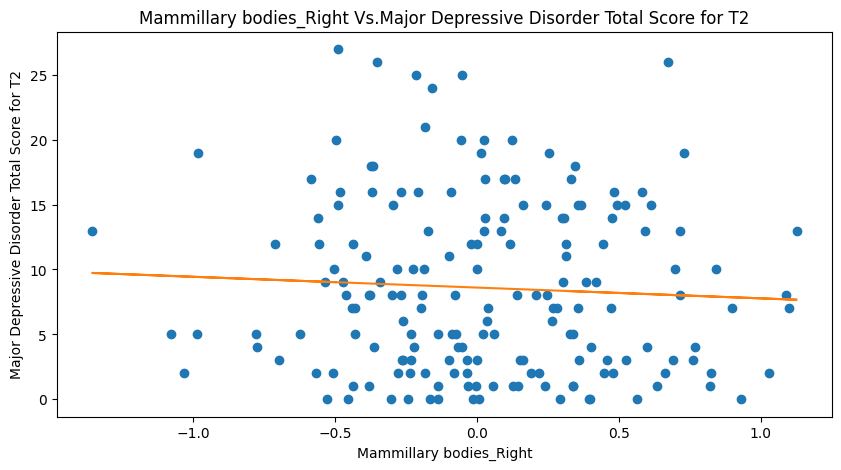

The Pearson's Correlation Co-efficient between Septal nuclei_Right and Major Depressive Disorder Total Score for T2= -0.1146663132580759 .


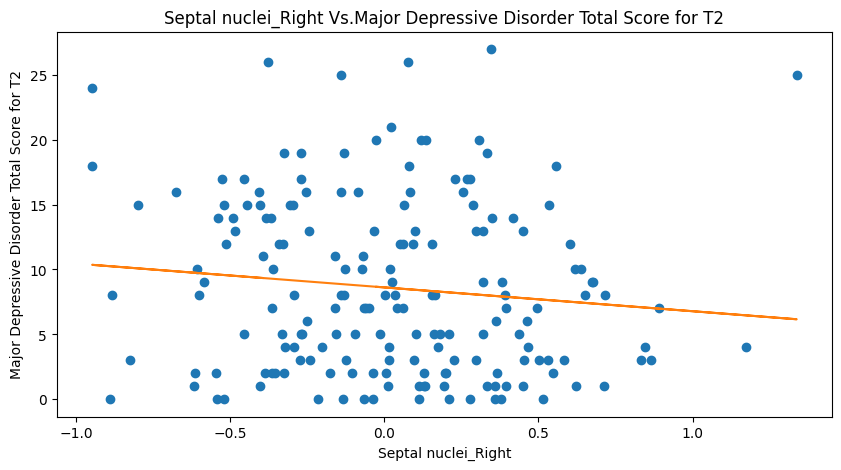

The Pearson's Correlation Co-efficient between Nucleus basalis_Right and Major Depressive Disorder Total Score for T2= -0.038405639745746754 .


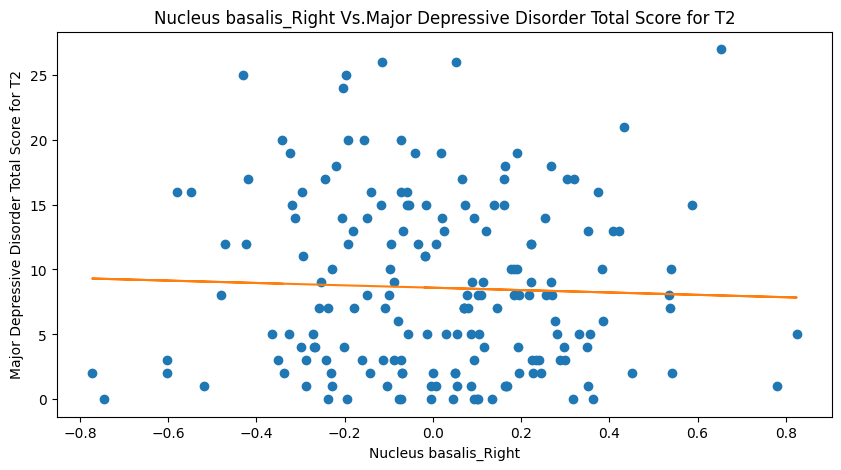

The point-biserial correlation coefficient between Sex and Major Depressive Disorder Total Score for T2= 0.33953778162232534 .
The mean and standard deviation of Major Depressive Disorder Total Score for T2 for female participants are 5.523809523809524 and 4.921146926767166 respectively.
The mean and standard deviation of Major Depressive Disorder Total Score for T2 for male participants are 10.252173913043478 and 6.888987403676619 respectively.


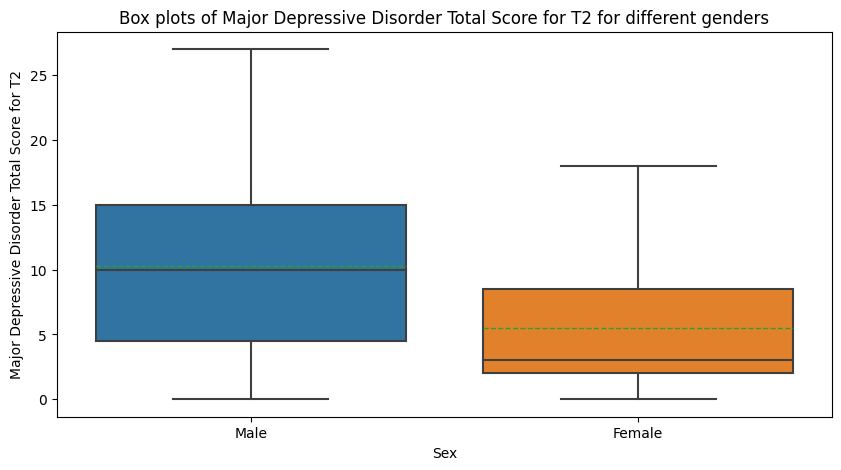

In [197]:
plots()

In [52]:
def Comparison(dataset, predicting): #Demographic+ Clinical Models (without PCA) vs. Other/ Current Model
    
    #R2 and RMSE of Demographic+Clinical Models (without PCA)
    
    Comparison_Label = "Demographic + Clinical Models (without PCA) vs. Entered model"
    
    print("\033[1;30;48m\033[2J \033[1;32;48m",   Comparison_Label   ,"\033[0m")
    
    R2_Demographic_Clinical = []
    RMSE_Demographic_Clinical = []
    
    input_columns = np.array([2, 3, 1])
    
    #Collating Features (Predictors)
    col = dataset.columns[input_columns]

    features = []

    for i in range(len(col)):
        
        features.append(col[i])
        
    #Defining target 
    
    if predicting == 1:
        
        df_target = np.array(dataset['Major Depression Total Score for T2'])
        
    else:
        
        df_target = np.array(dataset['Total Anxiety Score for T2'])
    
    #Defining Predictors
    df_data = np.array(dataset.loc[:,features].values)
    df_data_demographic_clinical = df_data
    
    #Train-Test Split
    
    for r in range(1,1001):
        
        train_data, test_data, train_lbl, test_lbl = train_test_split(df_data, df_target, test_size=1/5, random_state=r)
    
        #Feature Scaling
        train_data = StandardScaler().fit_transform(train_data)

        test_data = StandardScaler().fit_transform(test_data)
        
        #Lasso Regression: Determining best alpha
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        lr_cv = LassoCV(cv=kf,max_iter=20000, tol=0.0001)

        # Fit the model to the training data
        lr_cv.fit(train_data, train_lbl)

        # Get the best alpha and coefficients
        best_alpha = lr_cv.alpha_
        coefficients_best = lr_cv.coef_

        # Create a Lasso model with the best alpha
        lr = Lasso(alpha=best_alpha)
        
        #Final Validation: R squared and RMSE
        lr_fit = lr.fit(train_data, train_lbl)

        R2_r = lr_fit.score(test_data, test_lbl)
        R2_Demographic_Clinical.append(R2_r)
        
        pred = lr_fit.predict(test_data)
        mse = mean_squared_error(test_lbl, pred) 
        rmse_r = np.sqrt(mean_squared_error(test_lbl,pred))
        RMSE_Demographic_Clinical.append(rmse_r)
        
    #R2 and RMSE of Entered Model
    
    if_str = input("ENTER 'YES' TO INCLUDE STRUCTURAL PRECDICTORS AND 'NO' OTHERWISE.")
    print("\n")
    
    if if_str == 'YES':
        
        input_str = input("Enter 20 for 'Estimated Total Intra-Cranial Volume'.\n Enter 21 for 'Left-Thalamus-Proper Volume'.\n Enter 22 for 'Right-Thalamus-Proper Volume'.\n Enter 23 for 'Left-Putamen Volume'.\n Enter 24 for 'Right-Putamen Volume'.\n Enter 25 for 'Left-Caudate Volume'.\n Enter 26 for 'Right-Caudate Volume'.\n Enter 27 for 'Left-Accumbens-area Volume'.\n Enter 28 for 'Right-Accumbens-area Volume'.\n Enter 29 for 'Left-Amygdala Volume'.\n Enter 30 for 'Right-Amygdala Volume'.\n")
        
        input_list_str = input_str.split(",")
        input_columns_str = [int(x) for x in input_list_str]
        input_columns_str = np.array(input_columns_str)
    
        df_data_structural = np.array(dataset.iloc[:,input_columns_str].values) #structural features
    
    print("\n")
    print("INPUTS FOR FUNCTIONAL MRI DATA:")
    print("\n")
    func_str = input("Enter N to exclude functional MRI data or \n  Enter C to include cortical functional MRI data or \n Enter S to include subcortical functional MRI data or \n Enter B to include both cortical and subcortical data.")
    
    #functional features
    if func_str == 'C':
        
        df_data_functional = np.array(dataset.iloc[:,range(31,99)].values) #cortical features
        func_columns = np.array(range(31,99))
        
    elif func_str == 'S':
        
        df_data_functional = np.array(dataset.iloc[:,range(99,157)].values) #subcortical features
        func_columns = np.array(range(99,157))
        
    elif func_str == 'B':
        
        df_data_functional = np.array(dataset.iloc[:,range(31,157)].values) #cortical and subcortical features
        func_columns = np.array(range(31,157))
        
    if if_str == 'YES':
        
        df_data = np.concatenate((df_data_demographic_clinical , df_data_structural), axis = 1)
        
    else:
        
        df_data = df_data_demographic_clinical
    
    if func_str != 'N': #if functional predictors are entered
        
        df_data = np.concatenate((df_data, df_data_functional), axis = 1)
        
    R2_entered = []
    RMSE_entered = []

    for r in range(1,1001):
        
        #Test-Train Split after merging Clinical_Demographic, Structural, Functional data
        train_data, test_data, train_lbl, test_lbl = train_test_split(df_data, df_target, test_size=1/5, random_state=r)

        #Separating Clinical_Demographic, Structural, Functional data for scaling and PCA
        train_data_demographic_clinical = train_data[:, 0:df_data_demographic_clinical.shape[1]]
        test_data_demographic_clinical = test_data[:, 0:df_data_demographic_clinical.shape[1]]
        
        if if_str == 'YES':

            train_data_structural = train_data[:, df_data_demographic_clinical.shape[1]:df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]]
            test_data_structural = test_data[:, df_data_demographic_clinical.shape[1]:df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]]

        if func_str != 'N' and if_str == 'YES': #if functional predictors are entered
            
            train_data_functional = train_data[:, df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]:]
            test_data_functional = test_data[:, df_data_demographic_clinical.shape[1]+df_data_structural.shape[1]:]
            
        else:
            
            train_data_functional = train_data[:, df_data_demographic_clinical.shape[1]:]
            test_data_functional = test_data[:, df_data_demographic_clinical.shape[1]:]

        #Feature Scaling
        train_data_demographic_clinical = StandardScaler().fit_transform(train_data_demographic_clinical)
        test_data_demographic_clinical = StandardScaler().fit_transform(test_data_demographic_clinical)
        
        if if_str == 'YES': #if structural predictors are entered
        
            train_data_structural = StandardScaler().fit_transform(train_data_structural)
            test_data_structural = StandardScaler().fit_transform(test_data_structural)

        if func_str != 'N': #if functional predictors are entered

            train_data_functional = StandardScaler().fit_transform(train_data_functional)
            test_data_functional = StandardScaler().fit_transform(test_data_functional)
            
            if if_str == 'YES':

                #Merging structural and functional test and train data before PCA  
                train_data_structural_functional = np.concatenate((train_data_structural, train_data_functional), axis = 1)
                test_data_structural_functional = np.concatenate((test_data_structural, test_data_functional), axis = 1)

            else:

                train_data_structural_functional = train_data_functional
                test_data_structural_functional = test_data_functional

        else:

            train_data_structural_functional = train_data_structural
            test_data_structural_functional = test_data_structural
    
        #Merging Clinical, Demographic, and Structural data to get final train and test data
        train_data = np.concatenate((train_data_demographic_clinical , train_data_structural_functional), axis = 1)
        test_data = np.concatenate((test_data_demographic_clinical , test_data_structural_functional), axis = 1)

        #Cross-validation to determine best alpha
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        lr_cv = LassoCV(cv=kf,max_iter=20000, tol=0.0001)

        # Fit the model to the training data
        lr_cv.fit(train_data, train_lbl)

        # Get the best alpha and coefficients
        best_alpha = lr_cv.alpha_
        coefficients_best = lr_cv.coef_

        # Create a Lasso model with the best alpha
        lr = Lasso(alpha=best_alpha)
        
        #Final Validation: R squared
        lr_fit = lr.fit(train_data, train_lbl)
        lr_fit.score(test_data, test_lbl)

        R2_r_entered = lr_fit.score(test_data, test_lbl)
        R2_entered.append(R2_r_entered)
        
        pred = lr_fit.predict(test_data)
        mse = mean_squared_error(test_lbl, pred) 
        rmse_r_entered = np.sqrt(mean_squared_error(test_lbl,pred))
        RMSE_entered.append(rmse_r_entered)
        
    #R2 difference:

    R2_diff = [R2_entered[i] - R2_Demographic_Clinical[i] for i in range(len(R2_Demographic_Clinical))]

    #RMSE difference:

    RMSE_diff = [RMSE_entered[i] - RMSE_Demographic_Clinical[i] for i in range(len(RMSE_Demographic_Clinical))]
    
    #R2 diff histogram
    
    fig, axs = plt.subplots(2, 1, figsize=(15, 15))
    
    n, bins, patches = axs[0].hist(x=R2_diff, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    axs[0].grid(axis='y', alpha=0.75)
    axs[0].set_xlabel('Differences in R Squared',fontsize=16)
    axs[0].set_ylabel('Frequency',fontsize=16)
    axs[0].set_title('Histogram of differences in R Squared')
    
    # Calculate and display the mean and standard deviation
    mean_R2_diff = np.mean(R2_diff)
    std_dev_R2_diff = np.std(R2_diff)
    
    print("\n")
    
    print(f"Mean of differences in R2: {mean_R2_diff}\nStd Dev of differences in R2: {std_dev_R2_diff}")
    
    
    print("\n")
    
    n, bins, patches = axs[1].hist(x=RMSE_diff, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
    axs[1].grid(axis='y', alpha=0.75)
    axs[1].set_xlabel('Differences in RMSE',fontsize=16)
    axs[1].set_ylabel('Frequency',fontsize=16)
    axs[1].set_title('Histogram of differences in RMSE')
    
    # Calculate and display the mean and standard deviation
    mean_RMSE_diff = np.mean(RMSE_diff)
    std_dev_RMSE_diff = np.std(RMSE_diff)
    
    print(f"Mean of differences in RMSE: {mean_RMSE_diff}\nStd Dev of differences in RMSE: {std_dev_RMSE_diff}")
    print("\n")
    
    
    plt.show()
    
    # create a combined violin plot of R2 of the two models
    sns.violinplot(data=[R2_Demographic_Clinical,R2_entered])

    # set plot title and axis labels
    plt.title("Comparison of R2 of the model with that of Clinical+Demographic Model")
    plt.xlabel("Models")
    plt.ylabel("R2 of models")
    
    plt.subplots_adjust(right=0.8)

    plt.legend(['Clinical+Demographic_Model', 'Entered_Model'], loc="upper right") #bbox_to_anchor=(1.04,1)
    # show the plot
    plt.show()
    
    # create a combined violin plot of RMSE of the two models
    sns.violinplot(data=[RMSE_Demographic_Clinical,RMSE_entered])

    # set plot title and axis labels
    plt.title("Comparison of RMSE of the model with that of Clinical+Demographic Model")
    plt.xlabel("Models")
    plt.ylabel("RMSE of models")
    
    plt.subplots_adjust(right=0.8)

    plt.legend(['Clinical+Demographic_Model', 'Entered_Model'],loc="upper right") #bbox_to_anchor=(1.04,1),
    # show the plot
    plt.show()

    return R2_Demographic_Clinical, RMSE_Demographic_Clinical, R2_entered, RMSE_entered, R2_diff, RMSE_diff
        

        

  Demographic + Clinical Models (without PCA) vs. Entered model 
ENTER 'YES' TO INCLUDE STRUCTURAL PRECDICTORS AND 'NO' OTHERWISE.YES


Enter 20 for 'Estimated Total Intra-Cranial Volume'.
 Enter 21 for 'Left-Thalamus-Proper Volume'.
 Enter 22 for 'Right-Thalamus-Proper Volume'.
 Enter 23 for 'Left-Putamen Volume'.
 Enter 24 for 'Right-Putamen Volume'.
 Enter 25 for 'Left-Caudate Volume'.
 Enter 26 for 'Right-Caudate Volume'.
 Enter 27 for 'Left-Accumbens-area Volume'.
 Enter 28 for 'Right-Accumbens-area Volume'.
 Enter 29 for 'Left-Amygdala Volume'.
 Enter 30 for 'Right-Amygdala Volume'.
20,21,22,23,24,25,26,27,28,29,30


INPUTS FOR FUNCTIONAL MRI DATA:


Enter N to exclude functional MRI data or 
  Enter C to include cortical functional MRI data or 
 Enter S to include subcortical functional MRI data or 
 Enter B to include both cortical and subcortical data.N


Mean of differences in R2: -0.012425594472882464
Std Dev of differences in R2: 0.026914990738580294


Mean of differences i

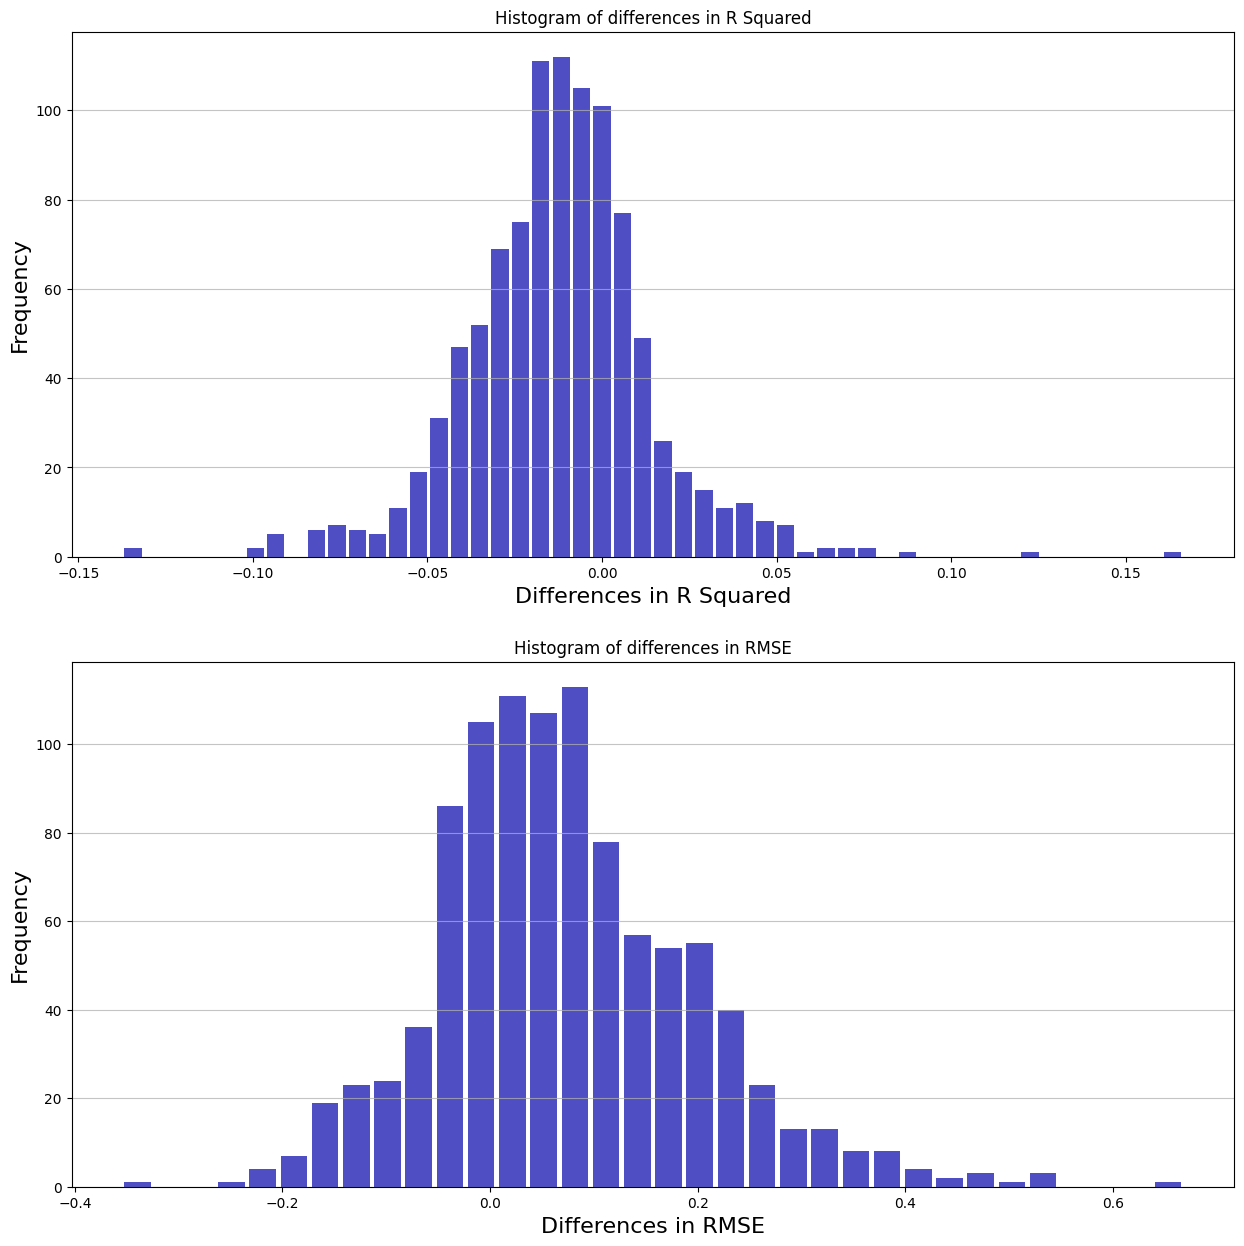

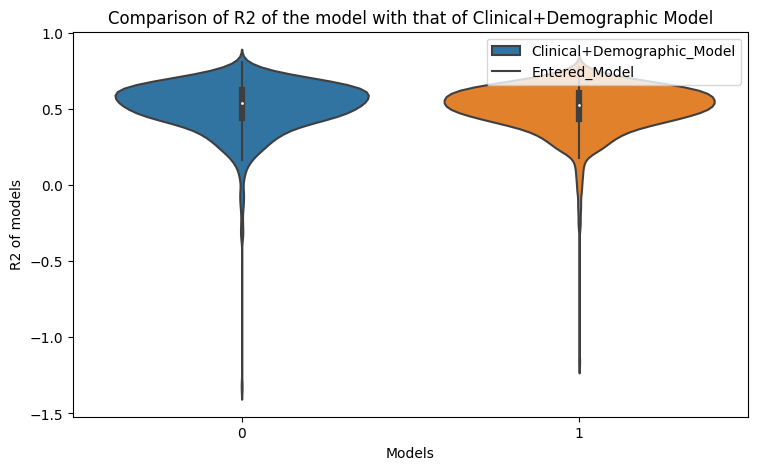

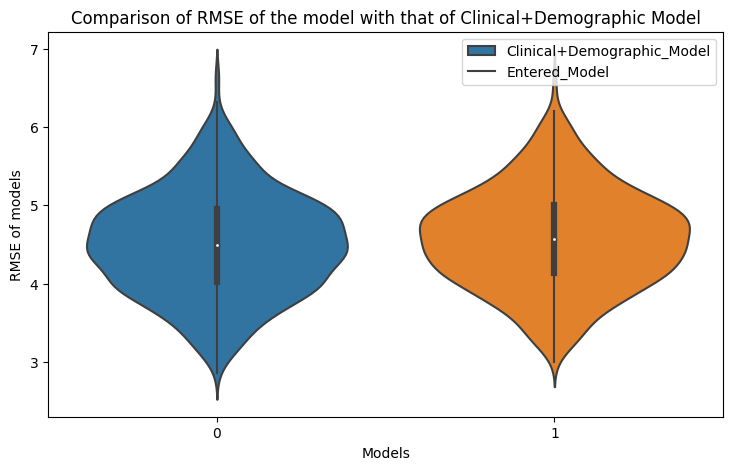

In [43]:

R2_Demographic_Clinical, RMSE_Demographic_Clinical, R2_entered, RMSE_entered, R2_diff, RMSE_diff = Comparison(Demographic_Clinical_Structural_Functional_T2, predicting)


  Demographic + Clinical Models (without PCA) vs. Entered model 
ENTER 'YES' TO INCLUDE STRUCTURAL PRECDICTORS AND 'NO' OTHERWISE.YES


Enter 20 for 'Estimated Total Intra-Cranial Volume'.
 Enter 21 for 'Left-Thalamus-Proper Volume'.
 Enter 22 for 'Right-Thalamus-Proper Volume'.
 Enter 23 for 'Left-Putamen Volume'.
 Enter 24 for 'Right-Putamen Volume'.
 Enter 25 for 'Left-Caudate Volume'.
 Enter 26 for 'Right-Caudate Volume'.
 Enter 27 for 'Left-Accumbens-area Volume'.
 Enter 28 for 'Right-Accumbens-area Volume'.
 Enter 29 for 'Left-Amygdala Volume'.
 Enter 30 for 'Right-Amygdala Volume'.
20,21,22,23,24,25,26,27,28,29,30


INPUTS FOR FUNCTIONAL MRI DATA:


Enter N to exclude functional MRI data or 
  Enter C to include cortical functional MRI data or 
 Enter S to include subcortical functional MRI data or 
 Enter B to include both cortical and subcortical data.N


Mean of differences in R2: -0.012425594472882464
Std Dev of differences in R2: 0.026914990738580294


Mean of differences i

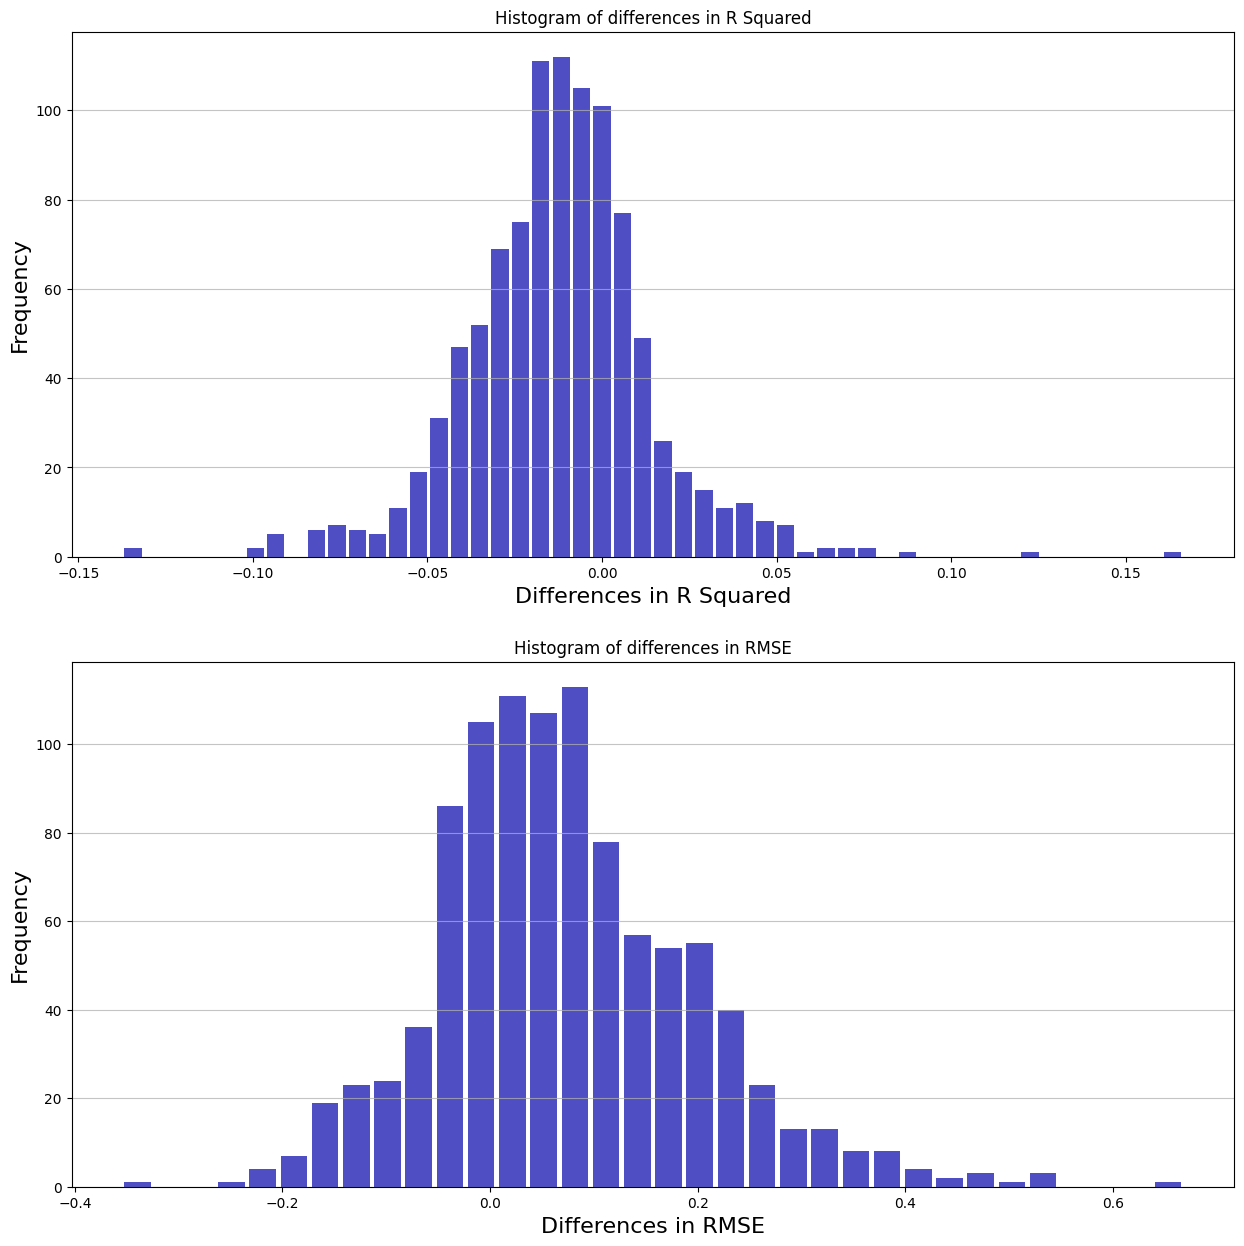

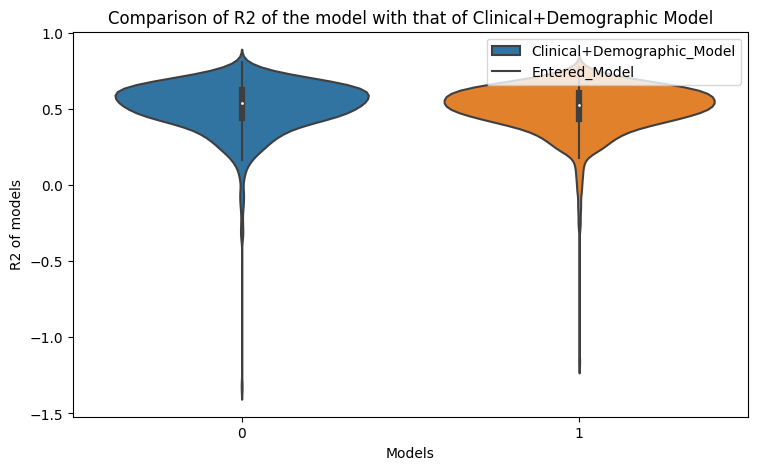

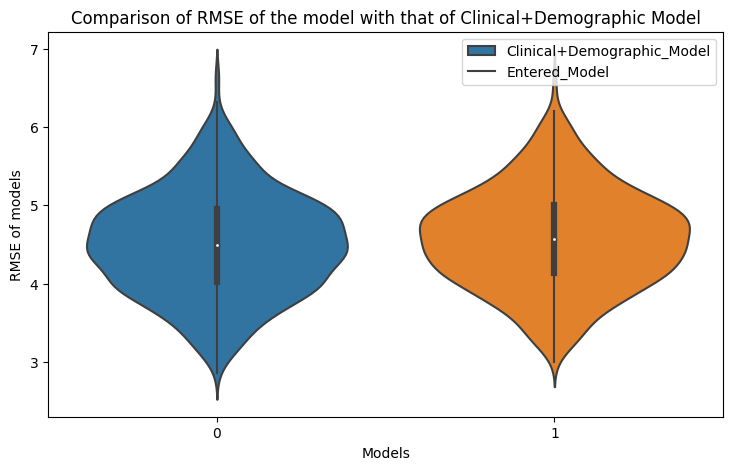

In [44]:
R2_Demographic_Clinical, RMSE_Demographic_Clinical, R2_entered, RMSE_entered, R2_diff, RMSE_diff = Comparison(Demographic_Clinical_Structural_Functional_T2, predicting)

  Demographic + Clinical Models (without PCA) vs. Entered model 
ENTER 'YES' TO INCLUDE STRUCTURAL PRECDICTORS AND 'NO' OTHERWISE.NO




INPUTS FOR FUNCTIONAL MRI DATA:


Enter N to exclude functional MRI data or 
  Enter C to include cortical functional MRI data or 
 Enter S to include subcortical functional MRI data or 
 Enter B to include both cortical and subcortical data.B


Mean of differences in R2: -0.030701349624084773
Std Dev of differences in R2: 0.04455050617145764


Mean of differences in RMSE: 0.17005807100290884
Std Dev of differences in RMSE: 0.2131903501724261




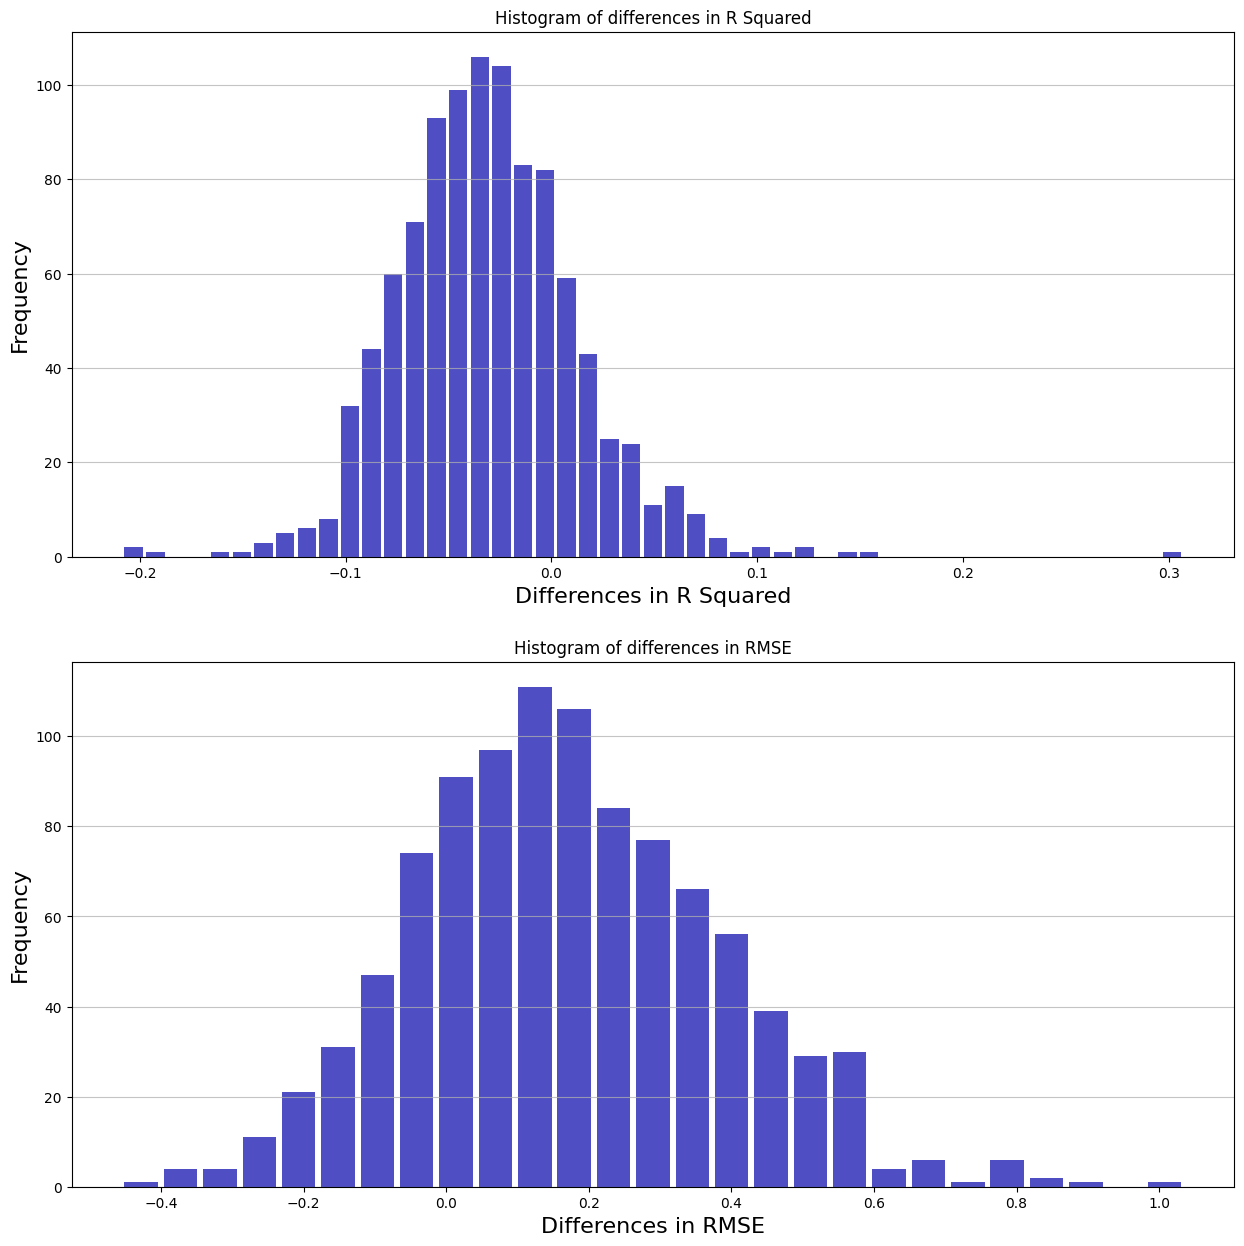

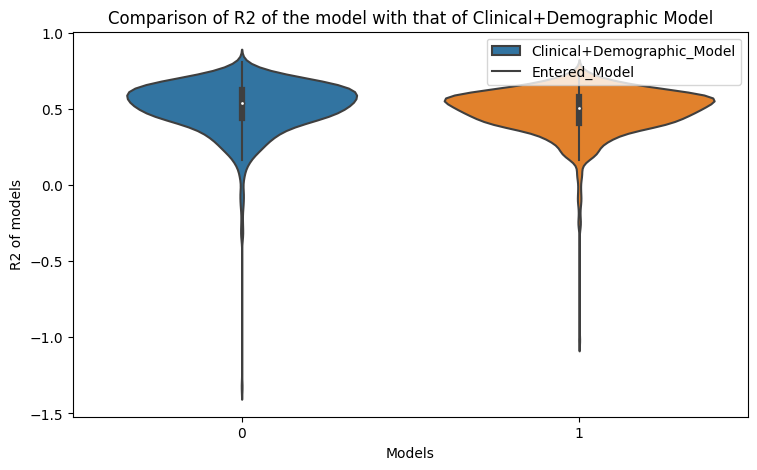

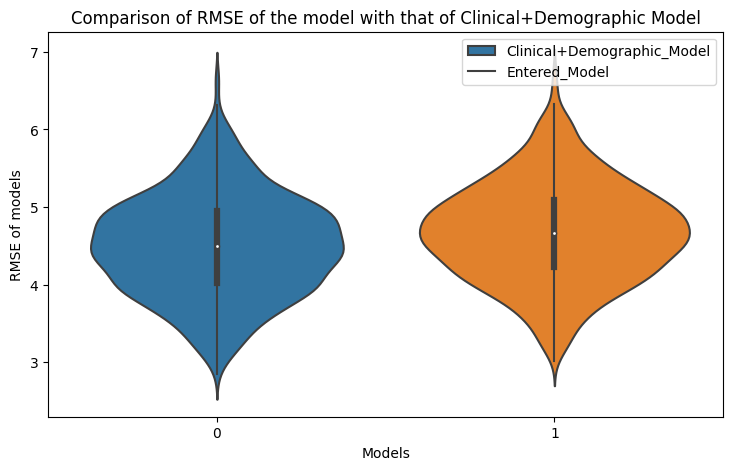

In [53]:
R2_Demographic_Clinical, RMSE_Demographic_Clinical, R2_entered, RMSE_entered, R2_diff, RMSE_diff = Comparison(Demographic_Clinical_Structural_Functional_T2, predicting)